# **HACKATHON AOK BW | AIDAHO**

## ***I. DATA PROCESSING***
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

## **1. Reading and Cleaning data**
**************************************************************************************************************************************************

In [1]:
pip freeze > package_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from prometheus_client import Summary
from tabulate import tabulate
import os

## 1.1 Loading and cleaning summary dataset

In [2]:
# Setup path for loading data
current_path = os.getcwd()
os.chdir(current_path)
print("Working directory set to:", current_path)
# Read Parquet file using PyArrow
summary_df = pd.read_parquet('summary.parquet', engine='pyarrow')

Working directory set to: C:\Users\ad.huyen\OneDrive\IBE_Hohenheim_Uni\Winter_2425\D_AppliedDSLab\AOK\Summitted


### 1.1.1 Create dummy ambulance variable which =1 if hospital_icd != blank, otherwise =0

In [3]:
summary_df.info()

# Create the new column 'ambulance'
summary_df['ambulance'] = summary_df['hospital_icd'].apply(lambda x: 0 if x.strip() == '' else 1)

# Display the first few rows to verify
print(summary_df.head())
summary_df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   hospital_icd     301621 non-null  object
 2   gender           301621 non-null  object
 3   age              301621 non-null  Int64 
 4   care_level       301621 non-null  Int64 
 5   id_nursing_home  301621 non-null  int64 
dtypes: Int64(2), int64(2), object(2)
memory usage: 16.7+ MB
               id_case hospital_icd gender  age  care_level  \
0  7923304136941695484                   f   80           4   
1 -4386311604643402502                   f  100           3   
2  7166251325851230449                   f   90           5   
3  1946181716444567454                   f   90           2   
4 -5438876074327774034                   f   90           3   

       id_nursing_home  ambulance  
0 -1139442538691087144          0  
1 -580191

id_case            age     care_level  id_nursing_home  \
count  3.016210e+05  301621.000000  301621.000000     3.016210e+05   
mean   1.225569e+16      83.957781       3.510037    -1.711818e+17   
std    5.320585e+18       9.465788       0.956803     5.293031e+18   
min   -9.223366e+18      60.000000       1.000000    -9.210274e+18   
25%   -4.590127e+18      80.000000       3.000000    -4.733741e+18   
50%    2.850479e+16      80.000000       4.000000    -3.498255e+17   
75%    4.609043e+18      90.000000       4.000000     4.325180e+18   
max    9.223367e+18     110.000000       5.000000     9.216584e+18   

           ambulance  
count  301621.000000  
mean        0.034583  
std         0.182722  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

### 1.1.2 Mapping icd names and their chapters to hospital_icd variable

In [4]:
import pandas as pd

# Step 1: Load the CSV file as a DataFrame
# Replace 'icd10_head_code.csv' with your actual file path
mapping_df = pd.read_csv('icd10_head_code.csv')

# Step 2: Create dictionaries for mapping
# Mapping for hospital_icd to name
hospital_icd_to_name = mapping_df.set_index('head_code')['name'].to_dict()

# Mapping for hospital_icd to chapter
hospital_icd_to_chapter = mapping_df.set_index('head_code')['chapter'].to_dict()

# Mapping for hospital_icd to chapter
hospital_icd_to_chapter_name = mapping_df.set_index('head_code')['chapter_name'].to_dict()

# Step 3: Merge the dictionaries with summary_df
# Assuming 'summary_df' contains the 'hospital_icd' column
summary_df['icd_name'] = summary_df['hospital_icd'].map(hospital_icd_to_name)
summary_df['icd_chapter'] = summary_df['hospital_icd'].map(hospital_icd_to_chapter)
summary_df['icd_chap_name'] = summary_df['hospital_icd'].map(hospital_icd_to_chapter_name)

# Step 4: Verify the result
print("Updated Summary DataFrame with ICD Name and Chapter:")
print(summary_df.head())
summary_df.info()
print(summary_df['hospital_icd'].unique())
print(summary_df['icd_chapter'].unique())
print(summary_df['icd_chap_name'].unique())

# Optional: Save the updated DataFrame to a CSV file
#summary_df.to_csv('updated_summary_with_icd.csv', index=False)


Updated Summary DataFrame with ICD Name and Chapter:
               id_case hospital_icd gender  age  care_level  \
0  7923304136941695484                   f   80           4   
1 -4386311604643402502                   f  100           3   
2  7166251325851230449                   f   90           5   
3  1946181716444567454                   f   90           2   
4 -5438876074327774034                   f   90           3   

       id_nursing_home  ambulance icd_name icd_chapter icd_chap_name  
0 -1139442538691087144          0      NaN         NaN           NaN  
1 -5801912611659177983          0      NaN         NaN           NaN  
2 -4712751983897181569          0      NaN         NaN           NaN  
3 -1262854703124578860          0      NaN         NaN           NaN  
4 -8055365392138262512          0      NaN         NaN           NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 10 columns):
 #   Column           Non-Null

### 1.1.3 Which diagnoses most often lead to hospital admissions?

In [5]:
summary_df.describe()

# Count occurrences of each unique value in 'hospital_icd'
hospital_icd_counts = summary_df['hospital_icd'].value_counts()
hospital_ambulance_counts = summary_df['ambulance'].value_counts()
# Display the result
print(hospital_icd_counts)
print(hospital_ambulance_counts)

        291190
I50       3495
rare      1789
J44       1132
E11        815
I70        754
N30        476
I10        323
D50        321
A09        316
J20        244
F33        225
K57        222
J10        191
F10        128
Name: hospital_icd, dtype: int64
0    291190
1     10431
Name: ambulance, dtype: int64


In [6]:
summary_df.describe()

# Count occurrences of each unique value in 'icd_name'
name_icd_counts = summary_df['icd_name'].value_counts()

# Count occurrences of each unique value in 'icd_chapter'
chapter_icd_counts = summary_df['icd_chapter'].value_counts()

# Count occurrences of each unique value in 'icd_chap_name'
chapter_name_counts = summary_df['icd_chap_name'].value_counts()


# Display the result
print(name_icd_counts)
print(chapter_icd_counts)
print(chapter_name_counts)


Heart failure                                                             3495
Rare Diseases                                                             1789
Other chronic obstructive pulmonary disease                               1132
Type 2 diabetes mellitus                                                   815
Atherosclerosis                                                            754
Cystitis                                                                   476
Essential (primary) hypertension                                           323
Iron deficiency anaemia                                                    321
Other gastroenteritis and colitis of infectious and unspecified origin     316
Acute bronchitis                                                           244
Recurrent depressive disorder                                              225
Diverticular disease of intestine                                          222
Influenza due to identified seasonal influenza virus

### 1.1.4 Are there differences between different nursing homes?

In [7]:
# Create the summary table
summary_table = (
    summary_df.groupby(['id_nursing_home', 'ambulance'])['id_case']
    .count()
    .reset_index()
    .rename(columns={'id_case': 'case_count'})
)

# Pivot the table to make 'ambulance' values columns
pivot_table = summary_table.pivot_table(
    index='id_nursing_home', 
    columns='ambulance', 
    values='case_count', 
    fill_value=0
)

# Rename columns for clarity (0: Non-ambulance, 1: Ambulance)
pivot_table.columns = ['non_ambulance_cases', 'ambulance_cases']

# Add a total case_count column
pivot_table['total_case_count'] = pivot_table.sum(axis=1)

# Calculate the percentage of ambulance cases
pivot_table['ambulance_case_percentage'] = (pivot_table['ambulance_cases'] / pivot_table['total_case_count']) * 100

# Sort by total_case_count in ascending order
pivot_table = pivot_table.sort_values(by='ambulance_cases', ascending=False)

# Reset the index for better readability
pivot_table = pivot_table.reset_index()

# Display the final table
print(pivot_table)
pivot_table.describe()

          id_nursing_home  non_ambulance_cases  ambulance_cases  \
0     -728877929484633805                  431               60   
1    -5801912611659177983                 1989               57   
2     -846800908345412857                  533               56   
3    -7438202194401547240                  370               44   
4     -525069457375227276                  327               43   
...                   ...                  ...              ...   
3589   937571845368796590                   13                0   
3590   932137885194387039                    1                0   
3591 -6809654439530700198                   86                0   
3592 -6792959039053194325                    6                0   
3593  9216583944345314986                   24                0   

      total_case_count  ambulance_case_percentage  
0                  491                  12.219959  
1                 2046                   2.785924  
2                  589                 

id_nursing_home  non_ambulance_cases  ambulance_cases  \
count     3.594000e+03          3594.000000      3594.000000   
mean     -1.152536e+16            81.021146         2.902337   
std       5.341962e+18           118.089552         4.852822   
min      -9.210274e+18             0.000000         0.000000   
25%      -4.733060e+18             4.000000         0.000000   
50%       8.166238e+16            10.000000         1.000000   
75%       4.555746e+18           138.000000         4.000000   
max       9.216584e+18          1989.000000        60.000000   

       total_case_count  ambulance_case_percentage  
count       3594.000000                3594.000000  
mean          83.923484                  10.048918  
std          121.661176                  25.699341  
min            1.000000                   0.000000  
25%            5.000000                   0.000000  
50%           11.000000                   0.821359  
75%          142.000000                   4.166667  
max         2046.000000                 100.000000

In [8]:
# Group the summary table with additional calculations
summary_table2 = (
    summary_df.groupby(['id_nursing_home', 'ambulance'])
    .agg(
        case_count=('id_case', 'count'),
        sum_female=('gender', lambda x: (x == 'f').sum()),
        mean_age=('age', 'mean'),
        mean_care_level=('care_level', 'mean')
    )
    .reset_index()
)

# Pivot the table to make 'ambulance' values columns
pivot_table2 = summary_table2.pivot_table(
    index='id_nursing_home', 
    columns='ambulance', 
    values=['case_count', 'sum_female', 'mean_age', 'mean_care_level'], 
    fill_value=0
)

# Display the final table
print(pivot_table2)
pivot_table2.describe()

                     case_count       mean_age            mean_care_level  \
ambulance                     0   1          0          1               0   
id_nursing_home                                                             
-9210274116072207264        208   5  86.730769       78.0        3.480769   
-9205283150249745664        667  22  84.347826  82.727273        3.742129   
-9201979875083794768          7   0       80.0        0.0        3.857143   
-9198618969881118180          1   0      100.0        0.0             4.0   
-9198491151774942993          3   0       80.0        0.0             3.0   
...                         ...  ..        ...        ...             ...   
 9182894034301911841         75   1       86.0       90.0            3.48   
 9185586483970272253         11   1       80.0       80.0             2.0   
 9198747583826049468          5   0       90.0        0.0             3.6   
 9214037759593362286        299  16  85.585284     81.875        3.719064   

case_count                  mean_age              mean_care_level  \
ambulance            0            1            0            1               0   
count      3594.000000  3594.000000  3594.000000  3594.000000     3594.000000   
mean         81.021146     2.902337    78.075248    42.723751        3.248700   
std         118.089552     4.852822    21.441399    41.792685        1.074686   
min           0.000000     0.000000     0.000000     0.000000        0.000000   
25%           4.000000     0.000000    80.000000     0.000000        3.000000   
50%          10.000000     1.000000    84.053694    67.321429        3.444444   
75%         138.000000     4.000000    87.500000    83.636364        3.833785   
max        1989.000000    60.000000   102.000000   100.000000        5.000000   

                         sum_female               
ambulance            1            0            1  
count      3594.000000  3594.000000  3594.000000  
mean          1.739996    57.833612     1.826377  
std           1.747286    86.293908     3.246770  
min           0.000000     0.000000     0.000000  
25%           0.000000     1.000000     0.000000  
50%           2.000000     7.000000     0.000000  
75%           3.363636    99.000000     2.000000  
max           5.000000  1693.000000    52.000000

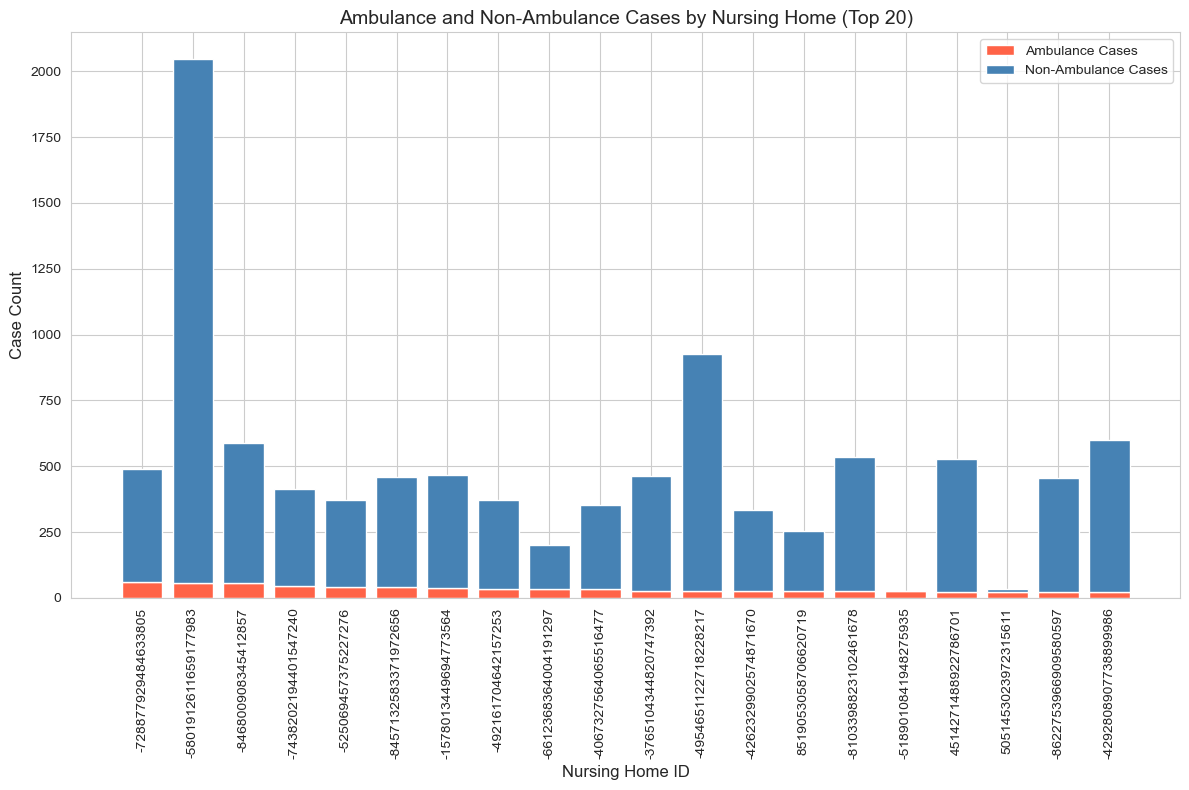

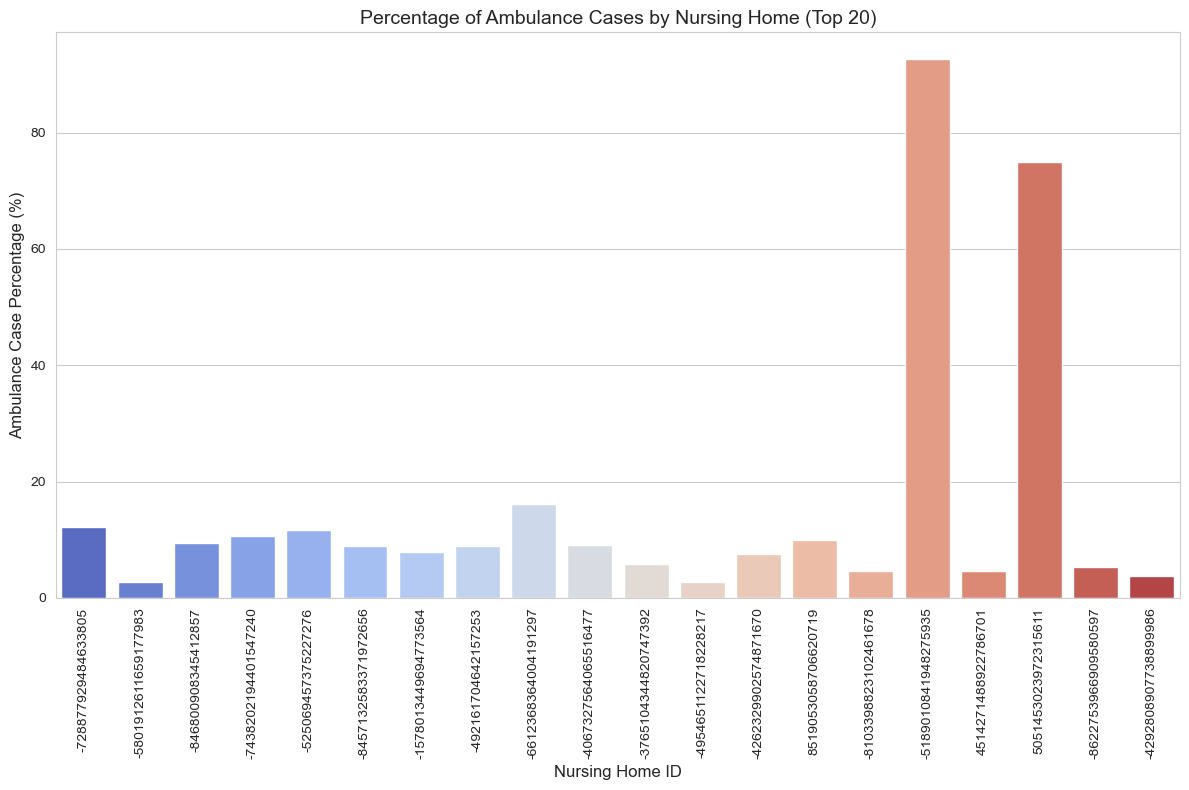

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data to display top nursing homes with the most ambulance cases
top_nursing_homes = pivot_table.head(20)  # Top 20 nursing homes

# Bar Chart for Ambulance and Non-Ambulance Cases
plt.figure(figsize=(12, 8))
x_labels = top_nursing_homes['id_nursing_home'].astype(str)  # Convert IDs to strings for readability
plt.bar(x_labels, top_nursing_homes['ambulance_cases'], label='Ambulance Cases', color='tomato')
plt.bar(x_labels, top_nursing_homes['non_ambulance_cases'], bottom=top_nursing_homes['ambulance_cases'], 
        label='Non-Ambulance Cases', color='steelblue')

# Customize the bar chart
plt.title('Ambulance and Non-Ambulance Cases by Nursing Home (Top 20)', fontsize=14)
plt.xlabel('Nursing Home ID', fontsize=12)
plt.ylabel('Case Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

# Percentage Chart for Ambulance Cases
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_nursing_homes['id_nursing_home'].astype(str), 
    y=top_nursing_homes['ambulance_case_percentage'], 
    palette='coolwarm'
)

# Customize the percentage chart
plt.title('Percentage of Ambulance Cases by Nursing Home (Top 20)', fontsize=14)
plt.xlabel('Nursing Home ID', fontsize=12)
plt.ylabel('Ambulance Case Percentage (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


### Plot the distribution of ambulance cases and % ambulance case over total case by Nursing homes

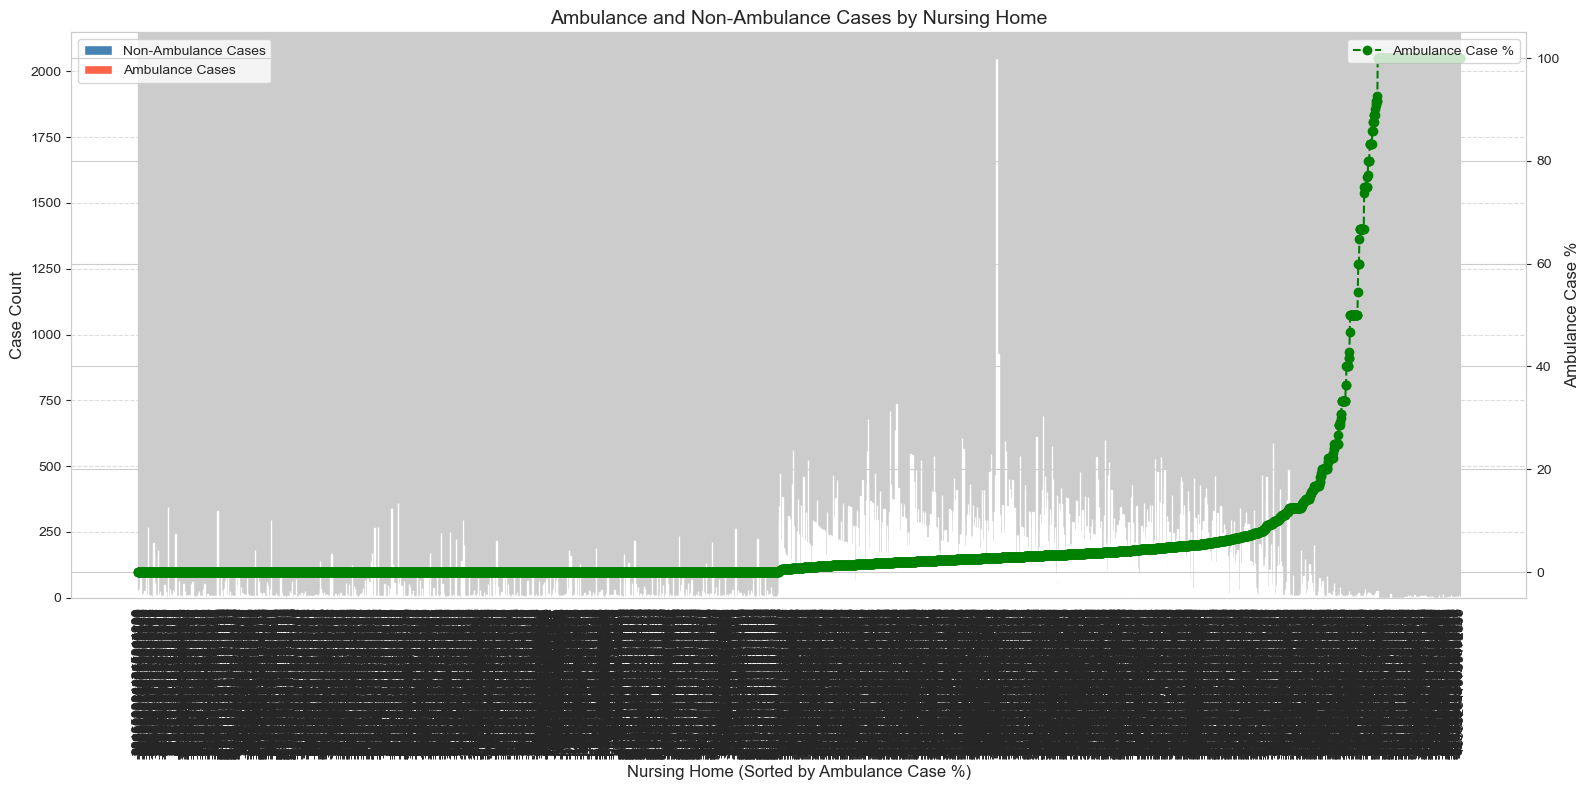

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by ambulance_case_percentage in ascending order
sorted_pivot_table = pivot_table.sort_values(by='ambulance_case_percentage', ascending=True)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Stacked Bar Chart for Non-Ambulance and Ambulance Cases
bar_width = 0.8  # Width of the bars
x_positions = np.arange(len(sorted_pivot_table))  # X positions for bars

ax1.bar(
    x_positions, 
    sorted_pivot_table['non_ambulance_cases'], 
    width=bar_width, 
    label='Non-Ambulance Cases', 
    color='steelblue'
)
ax1.bar(
    x_positions, 
    sorted_pivot_table['ambulance_cases'], 
    width=bar_width, 
    bottom=sorted_pivot_table['non_ambulance_cases'], 
    label='Ambulance Cases', 
    color='tomato'
)

# Customize the primary y-axis
ax1.set_xlabel('Nursing Home (Sorted by Ambulance Case %)', fontsize=12)
ax1.set_ylabel('Case Count', fontsize=12)
ax1.set_title('Ambulance and Non-Ambulance Cases by Nursing Home', fontsize=14)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(sorted_pivot_table['id_nursing_home'].astype(str), rotation=90, fontsize=10)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the ambulance_case_percentage line
ax2 = ax1.twinx()
ax2.plot(
    x_positions, 
    sorted_pivot_table['ambulance_case_percentage'], 
    color='green', 
    marker='o', 
    label='Ambulance Case %', 
    linestyle='--'
)
ax2.set_ylabel('Ambulance Case %', fontsize=12)
ax2.legend(loc='upper right')

# Add grid and adjust layout
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()


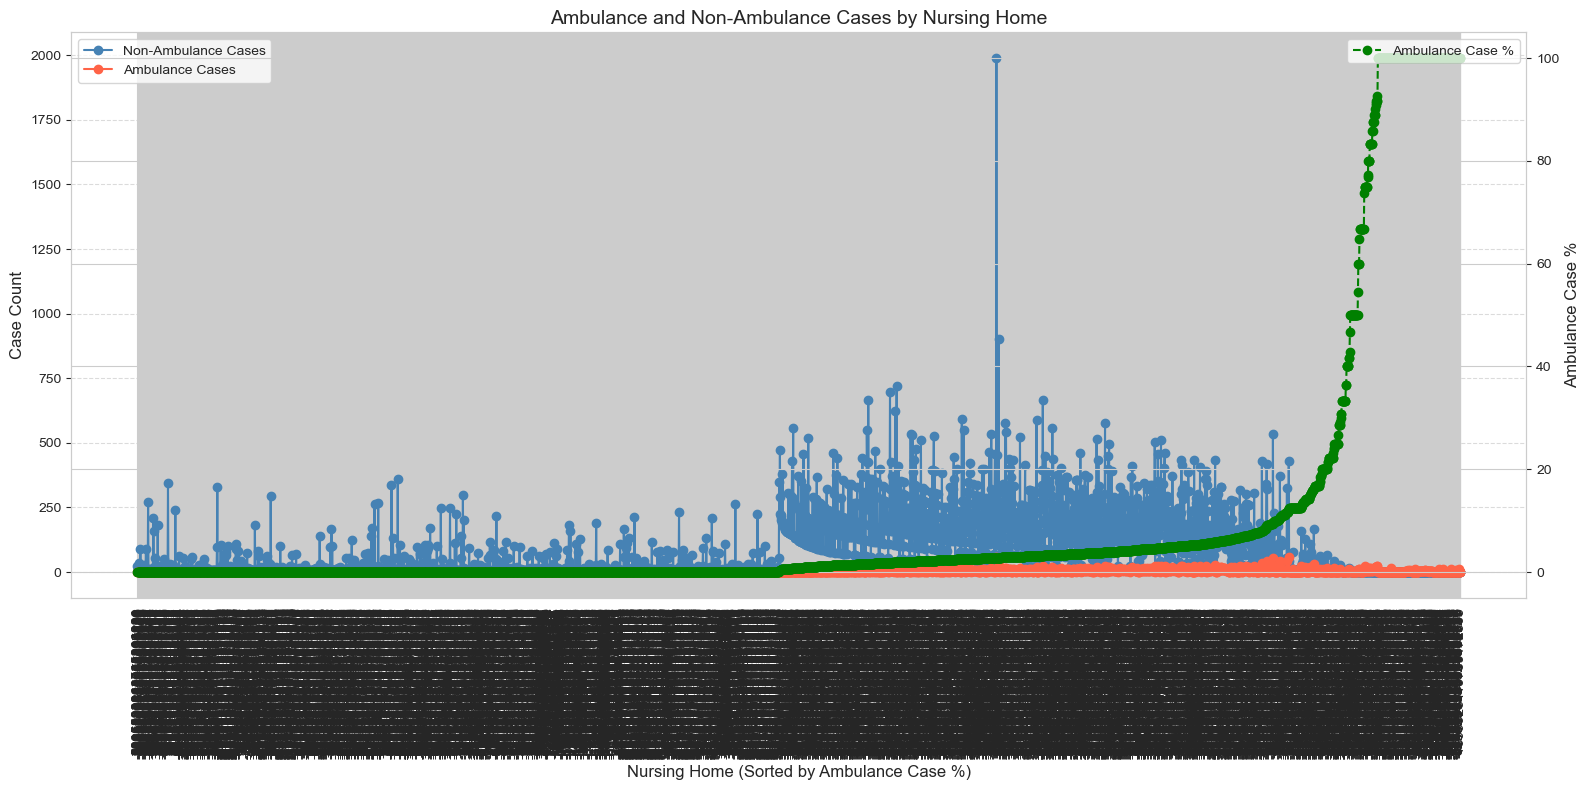

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by ambulance_case_percentage in ascending order
sorted_pivot_table = pivot_table.sort_values(by='ambulance_case_percentage', ascending=True)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Line Plot for Non-Ambulance and Ambulance Cases
x_positions = np.arange(len(sorted_pivot_table))  # X positions for lines
ax1.plot(
    x_positions, 
    sorted_pivot_table['non_ambulance_cases'], 
    label='Non-Ambulance Cases', 
    color='steelblue', 
    marker='o', 
    linestyle='-'
)
ax1.plot(
    x_positions, 
    sorted_pivot_table['ambulance_cases'], 
    label='Ambulance Cases', 
    color='tomato', 
    marker='o', 
    linestyle='-'
)

# Customize the primary y-axis
ax1.set_xlabel('Nursing Home (Sorted by Ambulance Case %)', fontsize=12)
ax1.set_ylabel('Case Count', fontsize=12)
ax1.set_title('Ambulance and Non-Ambulance Cases by Nursing Home', fontsize=14)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(sorted_pivot_table['id_nursing_home'].astype(str), rotation=90, fontsize=10)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the ambulance_case_percentage line
ax2 = ax1.twinx()
ax2.plot(
    x_positions, 
    sorted_pivot_table['ambulance_case_percentage'], 
    color='green', 
    marker='o', 
    label='Ambulance Case %', 
    linestyle='--'
)
ax2.set_ylabel('Ambulance Case %', fontsize=12)
ax2.legend(loc='upper right')

# Add grid and adjust layout
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()


In [12]:
# Count occurrences of each unique value in 'id_nursing_home'
nurshome_id_counts = summary_df['id_nursing_home'].value_counts()
print(nurshome_id_counts)

-5801912611659177983    2046
-4954651122718228217     926
-2991988691130140753     735
-1534962592855671451     708
-9205283150249745664     689
                        ... 
-8001456456265511003       1
-8883430374963234977       1
 8627271307129663587       1
-2718296124042512914       1
 2487122404383037667       1
Name: id_nursing_home, Length: 3594, dtype: int64


In [13]:
# Calculate summary statistics for each nursing home
nursing_home_stats = (
    summary_df.groupby('id_nursing_home')
    .agg(
        mean_age=('age', 'mean'),
        mean_female_percentage=('gender', lambda x: (x == 'f').mean() * 100),
        mean_care_level=('care_level', 'mean'),
        case_count=('id_case', 'count'),
        ambulance_cases=('ambulance', 'sum')
    )
    .reset_index()
)

# Calculate non-ambulance cases and percentage of ambulance cases
nursing_home_stats['non_ambulance_cases'] = nursing_home_stats['case_count'] - nursing_home_stats['ambulance_cases']
nursing_home_stats['ambulance_case_percentage'] = (nursing_home_stats['ambulance_cases'] / nursing_home_stats['case_count']) * 100

# Sort by ambulance_cases in descending order
nursing_home_stats = nursing_home_stats.sort_values(by='ambulance_cases', ascending=False)

# Reset the index for better readability
nursing_home_stats = nursing_home_stats.reset_index(drop=True)

# Display the final table
print(nursing_home_stats)


          id_nursing_home   mean_age  mean_female_percentage  mean_care_level  \
0     -728877929484633805  80.020367               45.010183         3.199593   
1    -5801912611659177983   86.43695               85.288368         3.469697   
2     -846800908345412857  80.356537               51.612903         3.786078   
3    -7438202194401547240  78.888889               64.251208         3.589372   
4     -525069457375227276  82.027027               63.243243         3.189189   
...                   ...        ...                     ...              ...   
3589   937571845368796590  94.615385               46.153846              2.0   
3590   932137885194387039       70.0              100.000000              5.0   
3591 -6809654439530700198  84.883721               81.395349         3.581395   
3592 -6792959039053194325  86.666667                0.000000              3.0   
3593  9216583944345314986  74.583333               16.666667            3.125   

      case_count  ambulance

In [14]:
nursing_home_stats.describe()

id_nursing_home     mean_age  mean_female_percentage  mean_care_level  \
count     3.594000e+03  3594.000000             3594.000000      3594.000000   
mean     -1.152536e+16    83.254022               69.331920         3.457365   
std       5.341962e+18     7.437957               33.201044         0.692617   
min      -9.210274e+18    60.000000                0.000000         1.000000   
25%      -4.733060e+18    80.000000               57.224893         3.000000   
50%       8.166238e+16    84.364307               76.990951         3.475435   
75%       4.555746e+18    87.856327              100.000000         3.874718   
max       9.216584e+18   102.000000              100.000000         5.000000   

        case_count  ambulance_cases  non_ambulance_cases  \
count  3594.000000      3594.000000          3594.000000   
mean     83.923484         2.902337            81.021146   
std     121.661176         4.852822           118.089552   
min       1.000000         0.000000             0.000000   
25%       5.000000         0.000000             4.000000   
50%      11.000000         1.000000            10.000000   
75%     142.000000         4.000000           138.000000   
max    2046.000000        60.000000          1989.000000   

       ambulance_case_percentage  
count                3594.000000  
mean                   10.048918  
std                    25.699341  
min                     0.000000  
25%                     0.000000  
50%                     0.821359  
75%                     4.166667  
max                   100.000000

                           id_nursing_home  mean_age  mean_female_percentage  \
id_nursing_home                   1.000000  0.010556               -0.000707   
mean_age                          0.010556  1.000000                0.370954   
mean_female_percentage           -0.000707  0.370954                1.000000   
mean_care_level                  -0.000605  0.037438                0.067165   
case_count                       -0.020622  0.065286                0.036507   
ambulance_cases                  -0.028388  0.034665                0.001077   
non_ambulance_cases              -0.020079  0.065837                0.037567   
ambulance_case_percentage         0.004538 -0.051142               -0.067061   

                           mean_care_level  case_count  ambulance_cases  \
id_nursing_home                  -0.000605   -0.020622        -0.028388   
mean_age                          0.037438    0.065286         0.034665   
mean_female_percentage            0.067165    0.036507

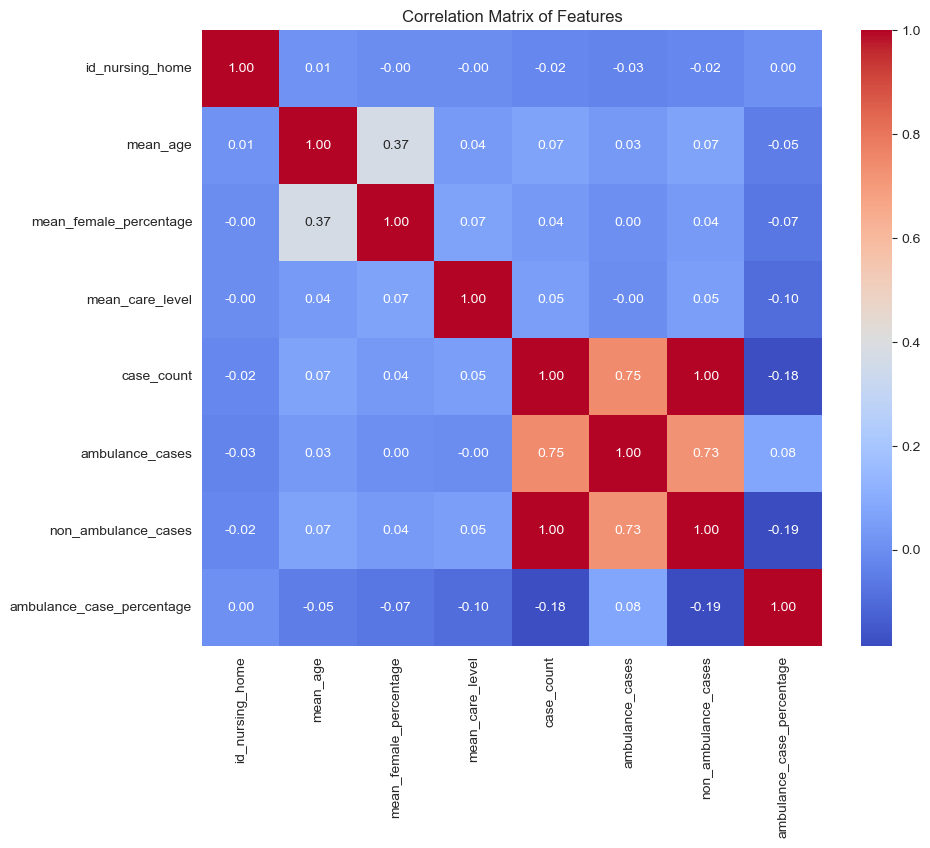

In [15]:
#correlation matrix 
correlation_matrix = nursing_home_stats.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [16]:
summary_df.info()
summary_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   hospital_icd     301621 non-null  object
 2   gender           301621 non-null  object
 3   age              301621 non-null  Int64 
 4   care_level       301621 non-null  Int64 
 5   id_nursing_home  301621 non-null  int64 
 6   ambulance        301621 non-null  int64 
 7   icd_name         10431 non-null   object
 8   icd_chapter      10431 non-null   object
 9   icd_chap_name    10431 non-null   object
dtypes: Int64(2), int64(3), object(5)
memory usage: 25.9+ MB


id_case            age     care_level  id_nursing_home  \
count  3.016210e+05  301621.000000  301621.000000     3.016210e+05   
mean   1.225569e+16      83.957781       3.510037    -1.711818e+17   
std    5.320585e+18       9.465788       0.956803     5.293031e+18   
min   -9.223366e+18      60.000000       1.000000    -9.210274e+18   
25%   -4.590127e+18      80.000000       3.000000    -4.733741e+18   
50%    2.850479e+16      80.000000       4.000000    -3.498255e+17   
75%    4.609043e+18      90.000000       4.000000     4.325180e+18   
max    9.223367e+18     110.000000       5.000000     9.216584e+18   

           ambulance  
count  301621.000000  
mean        0.034583  
std         0.182722  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## 1.2 Loading and cleaning drug history dataset 


### 1.2.1 Loading dataset

In [17]:
import pandas as pd
# Read Parquet file using PyArrow
drugs_df = pd.read_parquet('drugs.parquet', engine='pyarrow')

# Display the first few rows
print(drugs_df.head())
drugs_df.describe()
drugs_df.info()#drugs history data of case_id

                id_case            q_before:drug
94  2012971112302231375              Q2:Melperon
94  2012971112302231375             Q2:Torasemid
94  2012971112302231375                  Q2:rare
94  2012971112302231375  Q3:Levothyroxin-Natrium
94  2012971112302231375              Q3:Melperon
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141999 entries, 94 to 3365646
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_case        141999 non-null  int64 
 1   q_before:drug  141999 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [18]:
# Merge drug history to summary table
merged_summary_df = pd.merge(summary_df, drugs_df, on='id_case', how='left')

print(merged_summary_df.head())
merged_summary_df.describe()
merged_summary_df.info()

               id_case hospital_icd gender  age  care_level  \
0  7923304136941695484                   f   80           4   
1 -4386311604643402502                   f  100           3   
2  7166251325851230449                   f   90           5   
3  1946181716444567454                   f   90           2   
4 -5438876074327774034                   f   90           3   

       id_nursing_home  ambulance icd_name icd_chapter icd_chap_name  \
0 -1139442538691087144          0      NaN         NaN           NaN   
1 -5801912611659177983          0      NaN         NaN           NaN   
2 -4712751983897181569          0      NaN         NaN           NaN   
3 -1262854703124578860          0      NaN         NaN           NaN   
4 -8055365392138262512          0      NaN         NaN           NaN   

  q_before:drug  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 433151 entries, 0 to 433150
Da

### 1.2.2 Split q_before:drug into Quarter and Drugs

In [19]:
# separate drugs and quarter columns
drugs_df['Quarter'] = drugs_df['q_before:drug'].str.split(':').str[0]
drugs_df['Drugs'] = drugs_df['q_before:drug'].str.split(':').str[1]
print(drugs_df.head())
drugs_df.describe()
drugs_df.info()

unique_drugs = drugs_df['Drugs'].unique()
print(unique_drugs)
unique_quater = drugs_df['Quarter'].unique()
print(unique_quater)

                id_case            q_before:drug Quarter                 Drugs
94  2012971112302231375              Q2:Melperon      Q2              Melperon
94  2012971112302231375             Q2:Torasemid      Q2             Torasemid
94  2012971112302231375                  Q2:rare      Q2                  rare
94  2012971112302231375  Q3:Levothyroxin-Natrium      Q3  Levothyroxin-Natrium
94  2012971112302231375              Q3:Melperon      Q3              Melperon
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141999 entries, 94 to 3365646
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_case        141999 non-null  int64 
 1   q_before:drug  141999 non-null  object
 2   Quarter        141999 non-null  object
 3   Drugs          141999 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB
['Melperon' 'Torasemid' 'rare' 'Levothyroxin-Natrium' 'Metamizol-Natrium'
 'Pantoprazol' 'Acetylsali

In [20]:
# Create separate columns for Q1, Q2, Q3, and Q4
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for q in quarters:
    drugs_df[q] = drugs_df.apply(lambda row: row['Drugs'] if row['Quarter'] == q else '', axis=1)
    print(drugs_df.head())
drugs_df.info()

                id_case            q_before:drug Quarter  \
94  2012971112302231375              Q2:Melperon      Q2   
94  2012971112302231375             Q2:Torasemid      Q2   
94  2012971112302231375                  Q2:rare      Q2   
94  2012971112302231375  Q3:Levothyroxin-Natrium      Q3   
94  2012971112302231375              Q3:Melperon      Q3   

                   Drugs Q1  
94              Melperon     
94             Torasemid     
94                  rare     
94  Levothyroxin-Natrium     
94              Melperon     
                id_case            q_before:drug Quarter  \
94  2012971112302231375              Q2:Melperon      Q2   
94  2012971112302231375             Q2:Torasemid      Q2   
94  2012971112302231375                  Q2:rare      Q2   
94  2012971112302231375  Q3:Levothyroxin-Natrium      Q3   
94  2012971112302231375              Q3:Melperon      Q3   

                   Drugs Q1         Q2  
94              Melperon      Melperon  
94             T

### 1.2.2 Combine all drugs in the same quarter into one cell, separated by commas

In [21]:
# Combine all drugs in the same quarter into one cell, separated by commas
combined_df = (
    drugs_df
    .groupby(['id_case', 'Quarter'])['Drugs']
    .apply(lambda x: ', '.join(x))
    .reset_index()
)

# Pivot the dataframe to separate quarters into columns
drugs_combine_df = combined_df.pivot(index='id_case', columns='Quarter', values='Drugs')

# Reset the index and fill NaN values with empty strings
drugs_combine_df = drugs_combine_df.reset_index().fillna('')

# Display the resulting DataFrame
print(drugs_combine_df.head())
drugs_combine_df.info()


Quarter              id_case  \
0       -9222561620628027899   
1       -9220996301635083507   
2       -9220011210998780923   
3       -9219611111880485689   
4       -9217405056578383897   

Quarter                                                 Q1  \
0        Amlodipin, Levothyroxin-Natrium, Metoprolol, P...   
1                                                            
2        Amlodipin, Candesartan, Metamizol-Natrium, Pip...   
3        Amlodipin, Apixaban, Metamizol-Natrium, Metopr...   
4                                                     rare   

Quarter                                                 Q2  \
0        Amlodipin, Candesartan, Levothyroxin-Natrium, ...   
1                                                Torasemid   
2        Amlodipin, Candesartan, Metamizol-Natrium, Mir...   
3        Acetylsalicylsäure, Amlodipin, Apixaban, Metam...   
4                                  Metamizol-Natrium, rare   

Quarter                                                 Q3  \

### *Create 4 dummy variables to show whether patient had drugs history in last QX or not

In [22]:
drugs_combine_df.info()
# Replace blanks or NaNs in 'Q1' with 0 in 'Q1_drug'
drugs_combine_df['Q1_drug'] = drugs_combine_df['Q1'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
drugs_combine_df['Q2_drug'] = drugs_combine_df['Q2'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
drugs_combine_df['Q3_drug'] = drugs_combine_df['Q3'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
drugs_combine_df['Q4_drug'] = drugs_combine_df['Q4'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)

print(drugs_combine_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_case  10469 non-null  int64 
 1   Q1       10469 non-null  object
 2   Q2       10469 non-null  object
 3   Q3       10469 non-null  object
 4   Q4       10469 non-null  object
dtypes: int64(1), object(4)
memory usage: 409.1+ KB
Quarter              id_case  \
0       -9222561620628027899   
1       -9220996301635083507   
2       -9220011210998780923   
3       -9219611111880485689   
4       -9217405056578383897   

Quarter                                                 Q1  \
0        Amlodipin, Levothyroxin-Natrium, Metoprolol, P...   
1                                                            
2        Amlodipin, Candesartan, Metamizol-Natrium, Pip...   
3        Amlodipin, Apixaban, Metamizol-Natrium, Metopr...   
4                                                     rare   

Quarter        

### 1.2.3 Create 20 drug variables which count the frequency of this drug in last 4 quarter (Q1-Q4)

In [23]:
import pandas as pd

# Example drugs_combine_df (your data here)
# drugs_combine_df = pd.read_csv("your_data.csv")  # If loading from a CSV

# List of 19 known drugs
known_drugs = [
    "Acetylsalicylsäure", "Amlodipin", "Apixaban", "Atorvastatin",
    "Bisoprolol", "Candesartan", "Levothyroxin-Natrium", "Melperon",
    "Metamizol-Natrium", "Metoprolol", "Mirtazapin", "Pantoprazol",
    "Pipamperon", "Quetiapin", "Ramipril", "Risperidon", "Simvastatin",
    "Tilidin und Naloxon", "Torasemid", "rare"
]

# Initialize a new DataFrame to hold the results
expanded_df = drugs_combine_df.copy()

# Add a column for each drug, initialized with zeros
for drug in known_drugs:
    expanded_df[drug] = 0

# Process each quarter column (Q1, Q2, Q3, Q4)
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    # Fill missing values with empty strings to handle NaNs
    expanded_df[quarter].fillna("", inplace=True)
    
    # Count occurrences of each drug in the quarter column
    for index, row in expanded_df.iterrows():
        drugs = [drug.strip() for drug in row[quarter].split(',') if drug.strip()]
        for drug in drugs:
            if drug in known_drugs:  # Only count known drugs
                expanded_df.at[index, drug] += 1

# Display the updated DataFrame
print(expanded_df.head())
expanded_df.info()

Quarter              id_case  \
0       -9222561620628027899   
1       -9220996301635083507   
2       -9220011210998780923   
3       -9219611111880485689   
4       -9217405056578383897   

Quarter                                                 Q1  \
0        Amlodipin, Levothyroxin-Natrium, Metoprolol, P...   
1                                                            
2        Amlodipin, Candesartan, Metamizol-Natrium, Pip...   
3        Amlodipin, Apixaban, Metamizol-Natrium, Metopr...   
4                                                     rare   

Quarter                                                 Q2  \
0        Amlodipin, Candesartan, Levothyroxin-Natrium, ...   
1                                                Torasemid   
2        Amlodipin, Candesartan, Metamizol-Natrium, Mir...   
3        Acetylsalicylsäure, Amlodipin, Apixaban, Metam...   
4                                  Metamizol-Natrium, rare   

Quarter                                                 Q3  \

### Check 1 specific observation to confirm above code worked

In [24]:
check_drug_obs = drugs_df[drugs_df['id_case'] == -9222561620628027899]
check_combine_obs = drugs_combine_df[drugs_combine_df['id_case'] == -9222561620628027899]
check_summa_obs = summary_df[summary_df['id_case'] == -9222561620628027899]
print(check_drug_obs)
print(check_combine_obs)
print(check_summa_obs)

                     id_case            q_before:drug Quarter  \
1132736 -9222561620628027899             Q1:Amlodipin      Q1   
1132736 -9222561620628027899  Q1:Levothyroxin-Natrium      Q1   
1132736 -9222561620628027899            Q1:Metoprolol      Q1   
1132736 -9222561620628027899           Q1:Pantoprazol      Q1   
1132736 -9222561620628027899           Q1:Simvastatin      Q1   
1132736 -9222561620628027899                  Q1:rare      Q1   
1132736 -9222561620628027899             Q2:Amlodipin      Q2   
1132736 -9222561620628027899           Q2:Candesartan      Q2   
1132736 -9222561620628027899  Q2:Levothyroxin-Natrium      Q2   
1132736 -9222561620628027899     Q2:Metamizol-Natrium      Q2   
1132736 -9222561620628027899            Q2:Metoprolol      Q2   
1132736 -9222561620628027899           Q2:Pantoprazol      Q2   
1132736 -9222561620628027899           Q2:Simvastatin      Q2   
1132736 -9222561620628027899                  Q2:rare      Q2   
1132736 -9222561620628027

### 1.2.5 Merge 1:1 the summary_df into drugs_df to get other variable from summary table

In [25]:
import pandas as pd    
# Merge ambulance variable to drug history from summary table
expanded_drugs_df = pd.merge(expanded_df, summary_df, on='id_case', how='left')

In [26]:
expanded_drugs_df.info()
expanded_drugs_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 10468
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_case               10469 non-null  int64 
 1   Q1                    10469 non-null  object
 2   Q2                    10469 non-null  object
 3   Q3                    10469 non-null  object
 4   Q4                    10469 non-null  object
 5   Q1_drug               10469 non-null  int64 
 6   Q2_drug               10469 non-null  int64 
 7   Q3_drug               10469 non-null  int64 
 8   Q4_drug               10469 non-null  int64 
 9   Acetylsalicylsäure    10469 non-null  int64 
 10  Amlodipin             10469 non-null  int64 
 11  Apixaban              10469 non-null  int64 
 12  Atorvastatin          10469 non-null  int64 
 13  Bisoprolol            10469 non-null  int64 
 14  Candesartan           10469 non-null  int64 
 15  Levothyroxin-Natrium  10469 non-null

id_case       Q1_drug       Q2_drug       Q3_drug       Q4_drug  \
count  1.046900e+04  10469.000000  10469.000000  10469.000000  10469.000000   
mean   3.642363e+16      0.907441      0.830738      0.610087      0.738753   
std    5.339553e+18      0.289827      0.375001      0.487754      0.439335   
min   -9.222562e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.572663e+18      1.000000      1.000000      0.000000      0.000000   
50%    1.103294e+17      1.000000      1.000000      1.000000      1.000000   
75%    4.651394e+18      1.000000      1.000000      1.000000      1.000000   
max    9.223178e+18      1.000000      1.000000      1.000000      1.000000   

       Acetylsalicylsäure     Amlodipin      Apixaban  Atorvastatin  \
count        10469.000000  10469.000000  10469.000000  10469.000000   
mean             0.429458      0.526602      0.417614      0.323527   
std              0.958997      1.106648      0.983538      0.879392   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      0.000000      0.000000      0.000000   
max              4.000000      4.000000      4.000000      4.000000   

         Bisoprolol  ...      Ramipril    Risperidon   Simvastatin  \
count  10469.000000  ...  10469.000000  10469.000000  10469.000000   
mean       0.516000  ...      0.738944      0.323431      0.401949   
std        1.093218  ...      1.254169      0.898501      0.973601   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      1.000000      0.000000      0.000000   
max        4.000000  ...      4.000000      4.000000      4.000000   

       Tilidin und Naloxon     Torasemid          rare           age  \
count         10469.000000  10469.000000  10469.000000  10469.000000   
mean              0.365651      1.354475      3.002484     81.751839   
std               0.925599      1.447117      1.078409     10.198972   
min               0.000000      0.000000      0.000000     60.000000   
25%               0.000000      0.000000      2.000000     80.000000   
50%               0.000000      1.000000      3.000000     80.000000   
75%               0.000000      3.000000      4.000000     90.000000   
max               4.000000      4.000000      4.000000    110.000000   

         care_level  id_nursing_home     ambulance  
count  10469.000000     1.046900e+04  10469.000000  
mean       3.411119    -2.952692e+17      0.851371  
std        0.911573     5.330470e+18      0.355740  
min        1.000000    -9.210274e+18      0.000000  
25%        3.000000    -4.861549e+18      1.000000  
50%        3.000000    -6.555919e+17      1.000000  
75%        4.000000     4.190763e+18      1.000000  
max        5.000000     9.214038e+18      1.000000  

[8 rows x 29 columns]

### 1.2.6 Adding the missing drug history cases from summary_df into drugs_df, missing value of numeric variables were imputed by 0 and categorical variable by 'NA'

In [27]:
import pandas as pd

# Find the `id_case` values that are in summary_df but not in expanded_drugs_df
missing_cases = set(summary_df['id_case']) - set(expanded_drugs_df['id_case'])

# Extract rows corresponding to these missing cases from summary_df
missing_rows = summary_df[summary_df['id_case'].isin(missing_cases)].copy()

# Add the columns from expanded_drugs_df that are not in missing_rows, filled with NA
for col in expanded_drugs_df.columns:
    if col not in missing_rows.columns:
        missing_rows[col] = pd.NA

# Reorder columns to match expanded_drugs_df
missing_rows = missing_rows[expanded_drugs_df.columns]

# Combine the original expanded_drugs_df with the missing rows
expanded_drugs_df = pd.concat([expanded_drugs_df, missing_rows], ignore_index=True)

# Verify the result
print(expanded_drugs_df.info())
print(expanded_drugs_df.head())
expanded_drugs_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   Q1                    10469 non-null   object
 2   Q2                    10469 non-null   object
 3   Q3                    10469 non-null   object
 4   Q4                    10469 non-null   object
 5   Q1_drug               10469 non-null   object
 6   Q2_drug               10469 non-null   object
 7   Q3_drug               10469 non-null   object
 8   Q4_drug               10469 non-null   object
 9   Acetylsalicylsäure    10469 non-null   object
 10  Amlodipin             10469 non-null   object
 11  Apixaban              10469 non-null   object
 12  Atorvastatin          10469 non-null   object
 13  Bisoprolol            10469 non-null   object
 14  Candesartan           10469 non-null   object
 15  Levothyroxin-Natr

id_case            age     care_level  id_nursing_home  \
count  3.016210e+05  301621.000000  301621.000000     3.016210e+05   
mean   1.225569e+16      83.957781       3.510037    -1.711818e+17   
std    5.320585e+18       9.465788       0.956803     5.293031e+18   
min   -9.223366e+18      60.000000       1.000000    -9.210274e+18   
25%   -4.590127e+18      80.000000       3.000000    -4.733741e+18   
50%    2.850479e+16      80.000000       4.000000    -3.498255e+17   
75%    4.609043e+18      90.000000       4.000000     4.325180e+18   
max    9.223367e+18     110.000000       5.000000     9.216584e+18   

           ambulance  
count  301621.000000  
mean        0.034583  
std         0.182722  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [28]:
expanded_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   Q1                    10469 non-null   object
 2   Q2                    10469 non-null   object
 3   Q3                    10469 non-null   object
 4   Q4                    10469 non-null   object
 5   Q1_drug               10469 non-null   object
 6   Q2_drug               10469 non-null   object
 7   Q3_drug               10469 non-null   object
 8   Q4_drug               10469 non-null   object
 9   Acetylsalicylsäure    10469 non-null   object
 10  Amlodipin             10469 non-null   object
 11  Apixaban              10469 non-null   object
 12  Atorvastatin          10469 non-null   object
 13  Bisoprolol            10469 non-null   object
 14  Candesartan           10469 non-null   object
 15  Levothyroxin-Natr

### Converse numeric variables to datatype int64, converse gender into 1 & 0, drop irrelevant variables

In [29]:
# List of columns to convert
columns_to_convert = [
    "Acetylsalicylsäure", "Amlodipin", "Apixaban", "Atorvastatin", "Bisoprolol",
    "Candesartan", "Levothyroxin-Natrium", "Melperon", "Metamizol-Natrium", "Metoprolol",
    "Mirtazapin", "Pantoprazol", "Pipamperon", "Quetiapin", "Ramipril", "Risperidon",
    "Simvastatin", "Tilidin und Naloxon", "Torasemid", "rare", "Q1_drug", "Q2_drug", "Q3_drug", "Q4_drug"
]

# Convert columns to int64 and fill missing values with 0
for col in columns_to_convert:
    expanded_drugs_df[col] = pd.to_numeric(expanded_drugs_df[col], errors='coerce').fillna(0).astype('int64')

# Verify the data types
print(expanded_drugs_df[columns_to_convert].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Acetylsalicylsäure    301621 non-null  int64
 1   Amlodipin             301621 non-null  int64
 2   Apixaban              301621 non-null  int64
 3   Atorvastatin          301621 non-null  int64
 4   Bisoprolol            301621 non-null  int64
 5   Candesartan           301621 non-null  int64
 6   Levothyroxin-Natrium  301621 non-null  int64
 7   Melperon              301621 non-null  int64
 8   Metamizol-Natrium     301621 non-null  int64
 9   Metoprolol            301621 non-null  int64
 10  Mirtazapin            301621 non-null  int64
 11  Pantoprazol           301621 non-null  int64
 12  Pipamperon            301621 non-null  int64
 13  Quetiapin             301621 non-null  int64
 14  Ramipril              301621 non-null  int64
 15  Risperidon            301621 non-n

In [31]:
expanded_drugs_df['gender'] = expanded_drugs_df['gender'].replace({'f': 1, 'm': 0})

In [32]:
expanded_drugs_df.describe()
expanded_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   Q1                    10469 non-null   object
 2   Q2                    10469 non-null   object
 3   Q3                    10469 non-null   object
 4   Q4                    10469 non-null   object
 5   Q1_drug               301621 non-null  int64 
 6   Q2_drug               301621 non-null  int64 
 7   Q3_drug               301621 non-null  int64 
 8   Q4_drug               301621 non-null  int64 
 9   Acetylsalicylsäure    301621 non-null  int64 
 10  Amlodipin             301621 non-null  int64 
 11  Apixaban              301621 non-null  int64 
 12  Atorvastatin          301621 non-null  int64 
 13  Bisoprolol            301621 non-null  int64 
 14  Candesartan           301621 non-null  int64 
 15  Levothyroxin-Natr

### QX contain combination of drugs in this quarter in text >> replayed by summy variables
### hospital_icd is unknown at the point of time when calling ambulance decision-making >> not helpful to predict unnecessary ambulance_cases

In [33]:
# Drop QX combined drugs and hospital_icd due to multicollinearity with icd_name
columns_to_exclude = ['Q1', 'Q2', 'Q3', 'Q4','hospital_icd','icd_name', 'icd_chapter','icd_chap_name','id_nursing_home']
expanded_drugs_df = expanded_drugs_df.drop(columns=columns_to_exclude)
expanded_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id_case               301621 non-null  int64
 1   Q1_drug               301621 non-null  int64
 2   Q2_drug               301621 non-null  int64
 3   Q3_drug               301621 non-null  int64
 4   Q4_drug               301621 non-null  int64
 5   Acetylsalicylsäure    301621 non-null  int64
 6   Amlodipin             301621 non-null  int64
 7   Apixaban              301621 non-null  int64
 8   Atorvastatin          301621 non-null  int64
 9   Bisoprolol            301621 non-null  int64
 10  Candesartan           301621 non-null  int64
 11  Levothyroxin-Natrium  301621 non-null  int64
 12  Melperon              301621 non-null  int64
 13  Metamizol-Natrium     301621 non-null  int64
 14  Metoprolol            301621 non-null  int64
 15  Mirtazapin            301621 non-n

In [34]:
# Rename the column 'rare' to 'rare_icd' in expanded_icd_df
expanded_drugs_df = expanded_drugs_df.rename(columns={'rare': 'rare_drugs'})

# Display the updated DataFrame to verify the change
print(expanded_drugs_df.head())
print(expanded_drugs_df.info())

               id_case  Q1_drug  Q2_drug  Q3_drug  Q4_drug  \
0 -9222561620628027899        1        1        1        1   
1 -9220996301635083507        0        1        1        0   
2 -9220011210998780923        1        1        0        1   
3 -9219611111880485689        1        1        1        1   
4 -9217405056578383897        1        1        1        1   

   Acetylsalicylsäure  Amlodipin  Apixaban  Atorvastatin  Bisoprolol  ...  \
0                   0          3         0             0           0  ...   
1                   0          0         0             0           0  ...   
2                   0          2         0             0           0  ...   
3                   1          4         4             0           0  ...   
4                   0          0         0             0           1  ...   

   Ramipril  Risperidon  Simvastatin  Tilidin und Naloxon  Torasemid  \
0         0           0            4                    0          0   
1         0         

## 1.3 Loading and cleaning diagnose history dataset


### 1.3.1 Loading dataset

In [35]:
# Read Parquet file using PyArrow
diagnose_df = pd.read_parquet('diagnoses.parquet', engine='pyarrow')

# Display the first few rows
print(diagnose_df.head())
diagnose_df.describe()
diagnose_df.info() #drugs history data of case_id

                id_case q_before:icd
94  2012971112302231375       Q2:E03
94  2012971112302231375       Q2:E11
94  2012971112302231375       Q2:I10
94  2012971112302231375       Q2:N18
94  2012971112302231375       Q2:R32
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376055 entries, 94 to 3365646
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_case       376055 non-null  int64 
 1   q_before:icd  376055 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6+ MB


### *Create a fully merged dataset where drug history and icd history are combined with summary_df

In [36]:
# Merge icd history to summary table
merged_summary_df = pd.merge(merged_summary_df, diagnose_df, on='id_case', how='left')

print(merged_summary_df.head())
merged_summary_df.describe()
merged_summary_df.info()

               id_case hospital_icd gender  age  care_level  \
0  7923304136941695484                   f   80           4   
1 -4386311604643402502                   f  100           3   
2  7166251325851230449                   f   90           5   
3  1946181716444567454                   f   90           2   
4 -5438876074327774034                   f   90           3   

       id_nursing_home  ambulance icd_name icd_chapter icd_chap_name  \
0 -1139442538691087144          0      NaN         NaN           NaN   
1 -5801912611659177983          0      NaN         NaN           NaN   
2 -4712751983897181569          0      NaN         NaN           NaN   
3 -1262854703124578860          0      NaN         NaN           NaN   
4 -8055365392138262512          0      NaN         NaN           NaN   

  q_before:drug q_before:icd  
0           NaN          NaN  
1           NaN          NaN  
2           NaN          NaN  
3           NaN          NaN  
4           NaN          NaN  
<c

### 1.3.2 separate diagnoses and quarter columns

In [37]:
# separate diagnoses and quarter columns
diagnose_df['Quarter'] = diagnose_df['q_before:icd'].str.split(':').str[0]
diagnose_df['icd'] = diagnose_df['q_before:icd'].str.split(':').str[1]
print(diagnose_df.head())
diagnose_df.describe()
diagnose_df.info()

unique_icd = diagnose_df['icd'].unique()
print(unique_icd)
unique_quater = diagnose_df['Quarter'].unique()
print(unique_quater)

                id_case q_before:icd Quarter  icd
94  2012971112302231375       Q2:E03      Q2  E03
94  2012971112302231375       Q2:E11      Q2  E11
94  2012971112302231375       Q2:I10      Q2  I10
94  2012971112302231375       Q2:N18      Q2  N18
94  2012971112302231375       Q2:R32      Q2  R32
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376055 entries, 94 to 3365646
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_case       376055 non-null  int64 
 1   q_before:icd  376055 non-null  object
 2   Quarter       376055 non-null  object
 3   icd           376055 non-null  object
dtypes: int64(1), object(3)
memory usage: 14.3+ MB
['E03' 'E11' 'I10' 'N18' 'R32' 'R54' 'Z01' 'Z74' 'rare' 'R52' 'Z25' 'E14'
 'I25' 'I70' 'I50' 'I11' 'M54' 'R26' 'Z96' 'E66' 'N39' 'E78' 'F03' 'I48'
 'M17' 'F32' 'I83' 'M81' 'R29' 'I69' 'F01' 'F00' 'G30' 'F33' 'F45' 'M47'
 'Z92' 'M16' 'F06']
['Q2' 'Q3' 'Q4' 'Q1']


### Mapping icd name and chapter

In [38]:
import pandas as pd

# Step 1: Load the CSV file as a DataFrame
# Replace 'icd10_head_code.csv' with your actual file path
mapping_df = pd.read_csv('icd10_head_code.csv')

# Step 2: Create dictionaries for mapping
# Mapping for hospital_icd to name
hospital_icd_to_name = mapping_df.set_index('head_code')['name'].to_dict()

# Mapping for hospital_icd to chapter
hospital_icd_to_chapter = mapping_df.set_index('head_code')['chapter'].to_dict()

# Mapping for hospital_icd to chapter
hospital_icd_to_chapter_name = mapping_df.set_index('head_code')['chapter_name'].to_dict()

# Step 3: Merge the dictionaries with summary_df
# Assuming 'summary_df' contains the 'hospital_icd' column
diagnose_df['icd_name'] = diagnose_df['icd'].map(hospital_icd_to_name)
diagnose_df['icd_chapter'] = diagnose_df['icd'].map(hospital_icd_to_chapter)
diagnose_df['icd_chap_name'] = diagnose_df['icd'].map(hospital_icd_to_chapter_name)

# Step 4: Verify the result
print(diagnose_df.head())
diagnose_df.info()
print(diagnose_df['icd_name'].unique())
print(diagnose_df['icd_chapter'].unique())
print(diagnose_df['icd_chap_name'].unique())

# Optional: Save the updated DataFrame to a CSV file
#diagnose_df.to_csv('updated_diagnose_df_with_icd.csv', index=False)

                id_case q_before:icd Quarter  icd  \
94  2012971112302231375       Q2:E03      Q2  E03   
94  2012971112302231375       Q2:E11      Q2  E11   
94  2012971112302231375       Q2:I10      Q2  I10   
94  2012971112302231375       Q2:N18      Q2  N18   
94  2012971112302231375       Q2:R32      Q2  R32   

                            icd_name    icd_chapter  \
94              Other hypothyroidism     Chapter IV   
94          Type 2 diabetes mellitus     Chapter IV   
94  Essential (primary) hypertension     Chapter IX   
94            Chronic kidney disease    Chapter XIV   
94  Unspecified urinary incontinence  Chapter XVIII   

                                        icd_chap_name  
94      Endocrine, nutritional and metabolic diseases  
94      Endocrine, nutritional and metabolic diseases  
94                 Diseases of the circulatory system  
94               Diseases of the genitourinary system  
94  Symptoms, signs and abnormal clinical and labo...  
<class 'pandas

### How many patients had diagnosis in each Chapter by each X quarter before (X = 1-4)

In [39]:
# Group by Drug and Quarter, then count unique id_case
summary_icd_df = (
    diagnose_df.groupby(['icd_chapter', 'Quarter'])['id_case']
    .nunique()  # Count unique id_case for each drug per quarter
    .unstack(fill_value=0)  # Reshape to have quarters as columns
)

# Step 2.2: Rename columns for clarity
summary_icd_df = summary_icd_df.rename_axis(None, axis=0).reset_index().rename(columns={"icd": "Unique_Drug"})

# Step 2.3: Ensure Q1, Q2, Q3, Q4 are in the result, filling missing columns if any
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    if q not in summary_icd_df.columns:
        summary_icd_df[q] = 0

# Display the final DataFrame
print(summary_icd_df)

Quarter          index     Q1     Q2    Q3     Q4
0           Chapter IV   6718   6953  5536   7843
1           Chapter IX   9103   9336  7413  10247
2            Chapter V   6684   6621  5278   7056
3           Chapter VI   1163   1096   859   1098
4         Chapter XIII   4880   5160  4070   6032
5          Chapter XIV   4278   4222  3251   4625
6        Chapter XVIII   7996   7810  6193   8422
7          Chapter XXI   6147   5968  4943   6643
8        Rare Diseases  11166  11334  9069  12291


### 1.3.3 Combine all icd in the same quarter into one cell, separated by commas

In [40]:
# Combine all icd in the same quarter into one cell, separated by commas
combined_df2 = (
    diagnose_df
    .groupby(['id_case', 'Quarter'])['icd']
    .apply(lambda x: ', '.join(x))
    .reset_index()
)

# Pivot the dataframe to separate quarters into columns
diagnose_combine_df = combined_df2.pivot(index='id_case', columns='Quarter', values='icd')

# Reset the index and fill NaN values with empty strings
diagnose_combine_df = diagnose_combine_df.reset_index().fillna('')

# Display the resulting DataFrame
print(diagnose_combine_df.head())
diagnose_combine_df.info()


Quarter              id_case  \
0       -9223268341593767710   
1       -9222561620628027899   
2       -9220996301635083507   
3       -9220011210998780923   
4       -9219611111880485689   

Quarter                                                 Q1  \
0        E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1        E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2                                                            
3                            E03, I50, I70, N18, R29, rare   
4        E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

Quarter                                                 Q2  \
0        E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1        E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                                 E11, I48, N18, R29, rare   
3             E03, F01, I10, I50, I70, N18, N39, R29, rare   
4        E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

Quarter                                                 Q3  \

In [41]:
# Combine all icd and icd_chapter in the same quarter into one cell, separated by commas
combined_df2 = (
    diagnose_df
    .groupby(['id_case', 'Quarter'])
    .agg({
        'icd': lambda x: ', '.join(x),
        'icd_chapter': lambda x: ', '.join(x)
    })
    .reset_index()
)

# Pivot the dataframe to separate quarters into columns for icd and icd_chapter
diagnose_combine_df = combined_df2.pivot(index='id_case', columns='Quarter', values=['icd', 'icd_chapter'])

# Flatten the MultiIndex columns for better readability
diagnose_combine_df.columns = ['_'.join(col).strip() for col in diagnose_combine_df.columns.values]

# Reset the index and fill NaN values with empty strings
diagnose_combine_df = diagnose_combine_df.reset_index().fillna('')

# Display the resulting DataFrame
print("Combined ICD and ICD Chapter DataFrame:")
print(diagnose_combine_df.head())
diagnose_combine_df.info()

Combined ICD and ICD Chapter DataFrame:
               id_case                                             icd_Q1  \
0 -9223268341593767710  E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1 -9222561620628027899  E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2 -9220996301635083507                                                      
3 -9220011210998780923                      E03, I50, I70, N18, R29, rare   
4 -9219611111880485689  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q2  \
0  E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                           E11, I48, N18, R29, rare   
3       E03, F01, I10, I50, I70, N18, N39, R29, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q3  \
0                                                      
1  E11, E14, E78, F01, F06, F45, I10, I11, I50, 

### 1.3.4 Create 39 new variable by icd value and chapters which count the frequency of icd that patient got in past 4 quarters

In [42]:
import pandas as pd


# Define the list of ICD codes
icd_codes = [
    "E03", "E11", "E14", "E66", "E78", "F00", "F01", "F03", "F06", "F32", "F33", "F45", 
    "G30", "I10", "I11", "I25", "I48", "I50", "I69", "I70", "I83", "M16", "M17", "M47", 
    "M54", "M81", "N18", "N39", "R26", "R29", "R32", "R52", "R54", "Z01", "Z25", "Z74", 
    "Z92", "Z96", "rare"
]

# Initialize frequency columns for each ICD code
for icd in icd_codes:
    diagnose_combine_df[icd] = 0

# Calculate frequency for each ICD code in Q1 to Q4
for quarter in ['icd_Q1', 'icd_Q2', 'icd_Q3', 'icd_Q4']:
    diagnose_combine_df[quarter].fillna('', inplace=True)  # Handle NaN values
    diagnose_combine_df[quarter] = diagnose_combine_df[quarter].str.split(', ')
    for icd in icd_codes:
        diagnose_combine_df[icd] += diagnose_combine_df[quarter].apply(lambda x: x.count(icd) if isinstance(x, list) else 0)

# Drop the expanded lists in Q1 to Q4 if not needed
diagnose_combine_df['icd_Q1'] = diagnose_combine_df['icd_Q1'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
diagnose_combine_df['icd_Q2'] = diagnose_combine_df['icd_Q2'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
diagnose_combine_df['icd_Q3'] = diagnose_combine_df['icd_Q3'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
diagnose_combine_df['icd_Q4'] = diagnose_combine_df['icd_Q4'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Display the resulting DataFrame
print(diagnose_combine_df.head())

               id_case                                             icd_Q1  \
0 -9223268341593767710  E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1 -9222561620628027899  E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2 -9220996301635083507                                                      
3 -9220011210998780923                      E03, I50, I70, N18, R29, rare   
4 -9219611111880485689  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q2  \
0  E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                           E11, I48, N18, R29, rare   
3       E03, F01, I10, I50, I70, N18, N39, R29, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q3  \
0                                                      
1  E11, E14, E78, F01, F06, F45, I10, I11, I50, N...   
2            E11, E14, I48, N18,

### Create 9 new variable by icd chapters which count the frequency of icd that patient got in past 4 quarters

In [43]:
import pandas as pd

# Define the list of target chapters
chapters = ['Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
            'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI']

# Initialize frequency columns for each chapter
for chapter in chapters:
    diagnose_combine_df[chapter] = 0

# Calculate frequency for each chapter in icd_chapter_Q1 to icd_chapter_Q4
for quarter in ['icd_chapter_Q1', 'icd_chapter_Q2', 'icd_chapter_Q3', 'icd_chapter_Q4']:
    diagnose_combine_df[quarter].fillna('', inplace=True)  # Handle NaN values
    diagnose_combine_df[quarter] = diagnose_combine_df[quarter].str.split(', ')  # Split into lists
    
    # Update chapter counts, ensuring unique values in each cell are counted only once
    for chapter in chapters:
        diagnose_combine_df[chapter] += diagnose_combine_df[quarter].apply(lambda x: int(chapter in set(x)) if isinstance(x, list) else 0)

# Drop the expanded lists in icd_chapter_Q1 to icd_chapter_Q4 if not needed
for quarter in ['icd_chapter_Q1', 'icd_chapter_Q2', 'icd_chapter_Q3', 'icd_chapter_Q4']:
    diagnose_combine_df[quarter] = diagnose_combine_df[quarter].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Display the resulting DataFrame
print("Updated DataFrame with Chapter Frequency Columns:")
print(diagnose_combine_df.head())
diagnose_combine_df.describe()

Updated DataFrame with Chapter Frequency Columns:
               id_case                                             icd_Q1  \
0 -9223268341593767710  E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1 -9222561620628027899  E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2 -9220996301635083507                                                      
3 -9220011210998780923                      E03, I50, I70, N18, R29, rare   
4 -9219611111880485689  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q2  \
0  E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                           E11, I48, N18, R29, rare   
3       E03, F01, I10, I50, I70, N18, N39, R29, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q3  \
0                                                      
1  E11, E14, E78, F01, F06, F45, I10, 

id_case           E03           E11           E14           E66  \
count  1.257600e+04  12576.000000  12576.000000  12576.000000  12576.000000   
mean   5.982432e+16      0.395992      1.367366      0.626749      0.511609   
std    5.329732e+18      1.068916      1.695574      1.252844      1.185878   
min   -9.223268e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.494524e+18      0.000000      0.000000      0.000000      0.000000   
50%    1.028865e+17      0.000000      0.000000      0.000000      0.000000   
75%    4.656626e+18      0.000000      3.000000      0.000000      0.000000   
max    9.223178e+18      4.000000      4.000000      4.000000      4.000000   

                E78           F00           F01           F03           F06  \
count  12576.000000  12576.000000  12576.000000  12576.000000  12576.000000   
mean       1.082856      0.314647      0.343511      0.723441      0.341524   
std        1.562678      0.940113      0.977196      1.324974      0.982639   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      1.000000      0.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

       ...          rare    Chapter IV    Chapter IX   Chapter XIV  \
count  ...  12576.000000  12576.000000  12576.000000  12576.000000   
mean   ...      3.487595      2.150922      2.870468      1.302163   
std    ...      0.720617      1.703220      1.410666      1.575301   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      3.000000      0.000000      2.000000      0.000000   
50%    ...      4.000000      3.000000      3.000000      0.000000   
75%    ...      4.000000      4.000000      4.000000      3.000000   
max    ...      4.000000      4.000000      4.000000      4.000000   

       Chapter XVIII   Chapter XXI  Rare Diseases  Chapter XIII     Chapter V  \
count   12576.000000  12576.000000   12576.000000  12576.000000  12576.000000   
mean        2.418973      1.884622       3.487595      1.601622      2.038725   
std         1.546147      1.462414       0.720617      1.681477      1.676599   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         1.000000      1.000000       3.000000      0.000000      0.000000   
50%         3.000000      2.000000       4.000000      1.000000      2.000000   
75%         4.000000      3.000000       4.000000      3.000000      4.000000   
max         4.000000      4.000000       4.000000      4.000000      4.000000   

         Chapter VI  
count  12576.000000  
mean       0.335242  
std        0.973633  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 49 columns]

In [44]:
import pandas as pd

# Define the list of ICD codes
icd_codes = [
    "E03", "E11", "E14", "E66", "E78", "F00", "F01", "F03", "F06", "F32", "F33", "F45", 
    "G30", "I10", "I11", "I25", "I48", "I50", "I69", "I70", "I83", "M16", "M17", "M47", 
    "M54", "M81", "N18", "N39", "R26", "R29", "R32", "R52", "R54", "Z01", "Z25", "Z74", 
    "Z92", "Z96", "rare"
]

# Define the list of chapters
chapters = ['Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
            'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI']

# Initialize frequency columns for each ICD code and chapter
for icd in icd_codes:
    diagnose_combine_df[icd] = 0

for chapter in chapters:
    diagnose_combine_df[chapter] = 0

# Calculate frequency for each ICD code and chapter in Q1 to Q4
for quarter in ['icd_Q1', 'icd_Q2', 'icd_Q3', 'icd_Q4']:
    # Handle NaN values and split cells into lists
    diagnose_combine_df[quarter].fillna('', inplace=True)
    diagnose_combine_df[quarter] = diagnose_combine_df[quarter].str.split(', ')
    
    # Calculate ICD frequencies
    for icd in icd_codes:
        diagnose_combine_df[icd] += diagnose_combine_df[quarter].apply(lambda x: x.count(icd) if isinstance(x, list) else 0)

for quarter in ['icd_chapter_Q1', 'icd_chapter_Q2', 'icd_chapter_Q3', 'icd_chapter_Q4']:
    # Handle NaN values and split cells into lists
    diagnose_combine_df[quarter].fillna('', inplace=True)
    diagnose_combine_df[quarter] = diagnose_combine_df[quarter].str.split(', ')
    
    # Calculate chapter frequencies (unique counts per cell)
    for chapter in chapters:
        diagnose_combine_df[chapter] += diagnose_combine_df[quarter].apply(lambda x: int(chapter in set(x)) if isinstance(x, list) else 0)

# Combine list back into strings if needed
for col in ['icd_Q1', 'icd_Q2', 'icd_Q3', 'icd_Q4', 'icd_chapter_Q1', 'icd_chapter_Q2', 'icd_chapter_Q3', 'icd_chapter_Q4']:
    diagnose_combine_df[col] = diagnose_combine_df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Display the resulting DataFrame
print("Updated DataFrame with ICD and Chapter Frequency Columns:")
print(diagnose_combine_df.head())


Updated DataFrame with ICD and Chapter Frequency Columns:
               id_case                                             icd_Q1  \
0 -9223268341593767710  E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1 -9222561620628027899  E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2 -9220996301635083507                                                      
3 -9220011210998780923                      E03, I50, I70, N18, R29, rare   
4 -9219611111880485689  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q2  \
0  E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                           E11, I48, N18, R29, rare   
3       E03, F01, I10, I50, I70, N18, N39, R29, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q3  \
0                                                      
1  E11, E14, E78, F01, F06, F4

In [45]:
check_diagnose_obs = diagnose_df[diagnose_df['id_case'] == -9222561620628027899]
check_combine_obs = diagnose_combine_df[diagnose_combine_df['id_case'] == -9222561620628027899]
check_summa_obs = summary_df[summary_df['id_case'] == -9222561620628027899]
print(check_diagnose_obs)
print(check_combine_obs)
print(check_summa_obs)

                     id_case q_before:icd Quarter   icd  \
1132736 -9222561620628027899       Q1:E11      Q1   E11   
1132736 -9222561620628027899       Q1:E14      Q1   E14   
1132736 -9222561620628027899       Q1:E78      Q1   E78   
1132736 -9222561620628027899       Q1:F01      Q1   F01   
1132736 -9222561620628027899       Q1:F06      Q1   F06   
1132736 -9222561620628027899       Q1:F45      Q1   F45   
1132736 -9222561620628027899       Q1:I10      Q1   I10   
1132736 -9222561620628027899       Q1:I11      Q1   I11   
1132736 -9222561620628027899       Q1:I50      Q1   I50   
1132736 -9222561620628027899       Q1:I83      Q1   I83   
1132736 -9222561620628027899       Q1:N18      Q1   N18   
1132736 -9222561620628027899       Q1:R29      Q1   R29   
1132736 -9222561620628027899       Q1:R32      Q1   R32   
1132736 -9222561620628027899       Q1:Z25      Q1   Z25   
1132736 -9222561620628027899       Q1:Z74      Q1   Z74   
1132736 -9222561620628027899      Q1:rare      Q1  rare 

In [46]:
check_diagnose_obs = diagnose_df[diagnose_df['id_case'] == -9223268341593767710]
check_combine_obs = diagnose_combine_df[diagnose_combine_df['id_case'] == -9223268341593767710]
check_summa_obs = summary_df[summary_df['id_case'] == -9223268341593767710]
print(check_diagnose_obs)
print(check_combine_obs)
print(check_summa_obs)

                     id_case q_before:icd Quarter   icd  \
3358666 -9223268341593767710       Q1:E11      Q1   E11   
3358666 -9223268341593767710       Q1:F00      Q1   F00   
3358666 -9223268341593767710       Q1:F03      Q1   F03   
3358666 -9223268341593767710       Q1:F32      Q1   F32   
3358666 -9223268341593767710       Q1:G30      Q1   G30   
3358666 -9223268341593767710       Q1:I10      Q1   I10   
3358666 -9223268341593767710       Q1:I11      Q1   I11   
3358666 -9223268341593767710       Q1:I25      Q1   I25   
3358666 -9223268341593767710       Q1:I50      Q1   I50   
3358666 -9223268341593767710       Q1:R32      Q1   R32   
3358666 -9223268341593767710       Q1:Z74      Q1   Z74   
3358666 -9223268341593767710      Q1:rare      Q1  rare   
3358666 -9223268341593767710       Q2:E11      Q2   E11   
3358666 -9223268341593767710       Q2:F00      Q2   F00   
3358666 -9223268341593767710       Q2:F32      Q2   F32   
3358666 -9223268341593767710       Q2:G30      Q2   G30 

In [47]:
diagnose_combine_df.describe()

id_case           E03           E11           E14           E66  \
count  1.257600e+04  12576.000000  12576.000000  12576.000000  12576.000000   
mean   5.982432e+16      0.395992      1.367366      0.626749      0.511609   
std    5.329732e+18      1.068916      1.695574      1.252844      1.185878   
min   -9.223268e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.494524e+18      0.000000      0.000000      0.000000      0.000000   
50%    1.028865e+17      0.000000      0.000000      0.000000      0.000000   
75%    4.656626e+18      0.000000      3.000000      0.000000      0.000000   
max    9.223178e+18      4.000000      4.000000      4.000000      4.000000   

                E78           F00           F01           F03           F06  \
count  12576.000000  12576.000000  12576.000000  12576.000000  12576.000000   
mean       1.082856      0.314647      0.343511      0.723441      0.341524   
std        1.562678      0.940113      0.977196      1.324974      0.982639   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      1.000000      0.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

       ...          rare    Chapter IV    Chapter IX   Chapter XIV  \
count  ...  12576.000000  12576.000000  12576.000000  12576.000000   
mean   ...      3.487595      2.150922      2.870468      1.302163   
std    ...      0.720617      1.703220      1.410666      1.575301   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      3.000000      0.000000      2.000000      0.000000   
50%    ...      4.000000      3.000000      3.000000      0.000000   
75%    ...      4.000000      4.000000      4.000000      3.000000   
max    ...      4.000000      4.000000      4.000000      4.000000   

       Chapter XVIII   Chapter XXI  Rare Diseases  Chapter XIII     Chapter V  \
count   12576.000000  12576.000000   12576.000000  12576.000000  12576.000000   
mean        2.418973      1.884622       3.487595      1.601622      2.038725   
std         1.546147      1.462414       0.720617      1.681477      1.676599   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         1.000000      1.000000       3.000000      0.000000      0.000000   
50%         3.000000      2.000000       4.000000      1.000000      2.000000   
75%         4.000000      3.000000       4.000000      3.000000      4.000000   
max         4.000000      4.000000       4.000000      4.000000      4.000000   

         Chapter VI  
count  12576.000000  
mean       0.335242  
std        0.973633  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 49 columns]

### Create 4 dummy variable to tracking whether patient had icd history in that quarter or not

In [48]:
diagnose_combine_df.info()
# Replace blanks or NaNs in 'Q1' with 0 in 'Q1_drug'
diagnose_combine_df['Q1_icd'] = diagnose_combine_df['icd_Q1'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
diagnose_combine_df['Q2_icd'] = diagnose_combine_df['icd_Q2'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
diagnose_combine_df['Q3_icd'] = diagnose_combine_df['icd_Q3'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)
diagnose_combine_df['Q4_icd'] = diagnose_combine_df['icd_Q4'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)

print(diagnose_combine_df.head())
diagnose_combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12576 entries, 0 to 12575
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_case         12576 non-null  int64 
 1   icd_Q1          12576 non-null  object
 2   icd_Q2          12576 non-null  object
 3   icd_Q3          12576 non-null  object
 4   icd_Q4          12576 non-null  object
 5   icd_chapter_Q1  12576 non-null  object
 6   icd_chapter_Q2  12576 non-null  object
 7   icd_chapter_Q3  12576 non-null  object
 8   icd_chapter_Q4  12576 non-null  object
 9   E03             12576 non-null  int64 
 10  E11             12576 non-null  int64 
 11  E14             12576 non-null  int64 
 12  E66             12576 non-null  int64 
 13  E78             12576 non-null  int64 
 14  F00             12576 non-null  int64 
 15  F01             12576 non-null  int64 
 16  F03             12576 non-null  int64 
 17  F06             12576 non-null  int64 
 18  F32   

### 1.3.5 Merge 1:1 the summary_df into icd_df to get other variable from summary table

In [49]:
import pandas as pd    
# Merge ambulance variable to drug history from summary table
expanded_icd_df = pd.merge(diagnose_combine_df, summary_df, on='id_case', how='left')
expanded_icd_df.info()
expanded_icd_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12576 entries, 0 to 12575
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_case          12576 non-null  int64 
 1   icd_Q1           12576 non-null  object
 2   icd_Q2           12576 non-null  object
 3   icd_Q3           12576 non-null  object
 4   icd_Q4           12576 non-null  object
 5   icd_chapter_Q1   12576 non-null  object
 6   icd_chapter_Q2   12576 non-null  object
 7   icd_chapter_Q3   12576 non-null  object
 8   icd_chapter_Q4   12576 non-null  object
 9   E03              12576 non-null  int64 
 10  E11              12576 non-null  int64 
 11  E14              12576 non-null  int64 
 12  E66              12576 non-null  int64 
 13  E78              12576 non-null  int64 
 14  F00              12576 non-null  int64 
 15  F01              12576 non-null  int64 
 16  F03              12576 non-null  int64 
 17  F06              12576 non-null

id_case                                             icd_Q1  \
0 -9223268341593767710  E11, F00, F03, F32, G30, I10, I11, I25, I50, R...   
1 -9222561620628027899  E11, E14, E78, F01, F06, F45, I10, I11, I50, I...   
2 -9220996301635083507                                                      
3 -9220011210998780923                      E03, I50, I70, N18, R29, rare   
4 -9219611111880485689  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q2  \
0  E11, F00, F32, G30, I10, I25, I50, R32, Z74, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                           E11, I48, N18, R29, rare   
3       E03, F01, I10, I50, I70, N18, N39, R29, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q3  \
0                                                      
1  E11, E14, E78, F01, F06, F45, I10, I11, I50, N...   
2            E11, E14, I48, N18, R29, Z01, Z25, rare   
3                                                      
4  E11, E66, E78, I10, I25, I48, I50, I70, Z92, rare   

                                              icd_Q4  \
0            E11, F00, F32, G30, I10, I25, R32, rare   
1  E11, E14, E78, F01, F06, F45, I10, I50, N18, R...   
2                                     E11, I48, rare   
3            E03, I50, I70, N18, R29, Z25, Z96, rare   
4  E11, E66, E78, I10, I25, I48, I50, I70, R29, Z...   

                                      icd_chapter_Q1  \
0  Chapter IV, Chapter V, Chapter V, Chapter V, C...   
1  Chapter IV, Chapter IV, Chapter IV, Chapter V,...   
2                                                      
3  Chapter IV, Chapter IX, Chapter IX, Chapter XI...   
4  Chapter IV, Chapter IV, Chapter IV, Chapter IX...   

                                      icd_chapter_Q2  \
0  Chapter IV, Chapter V, Chapter V, Chapter VI, ...   
1  Chapter IV, Chapter IV, Chapter IV, Chapter V,...   
2  Chapter IV, Chapter IX, Chapter XIV, Chapter X...   
3  Chapter IV, Chapter V, Chapter IX, Chapter IX,...   
4  Chapter IV, Chapter IV, Chapter IV, Chapter IX...   

                                      icd_chapter_Q3  \
0                                                      
1  Chapter IV, Chapter IV, Chapter IV, Chapter V,...   
2  Chapter IV, Chapter IV, Chapter IX, Chapter XI...   
3                                                      
4  Chapter IV, Chapter IV, Chapter IV, Chapter IX...   

                                      icd_chapter_Q4  E03  ...  Q4_icd  \
0  Chapter IV, Chapter V, Chapter V, Chapter VI, ...    0  ...       1   
1  Chapter IV, Chapter IV, Chapter IV, Chapter V,...    0  ...       1   
2              Chapter IV, Chapter IX, Rare Diseases    0  ...       1   
3  Chapter IV, Chapter IX, Chapter IX, Chapter XI...    3  ...       1   
4  Chapter IV, Chapter IV, Chapter IV, Chapter IX...    0  ...       1   

   hospital_icd  gender  age  care_level      id_nursing_home  ambulance  \
0           I50       m   80           3 -5717223810826309963          1   
1           I50       f   70           4 -8211795106232082040          1   
2           I50       f   90           2 -6384235463383479613          1   
3           I70       f   90           4 -5227690969518259245          1   
4           I50       f  100           3  5636152791698122443          1   

          icd_name  icd_chapter                       icd_chap_name  
0    Heart failure   Chapter IX  Diseases of the circulatory system  
1    Heart failure   Chapter IX  Diseases of the circulatory system  
2    Heart failure   Chapter IX  Diseases of the circulatory system  
3  Atherosclerosis   Chapter IX  Diseases of the circulatory system  
4    Heart failure   Chapter IX  Diseases of the circulatory system  

[5 rows x 70 columns]

### 1.3.6 Adding the missing drug history cases from summary_df into drugs_df, missing value of numeric variables were imputed by 0 and categorical variable by 'NA'

In [50]:
import pandas as pd

# Find the `id_case` values that are in summary_df but not in expanded_drugs_df
missing_cases2 = set(summary_df['id_case']) - set(expanded_icd_df['id_case'])

# Extract rows corresponding to these missing cases from summary_df
missing_rows2 = summary_df[summary_df['id_case'].isin(missing_cases2)].copy()

# Add the columns from expanded_drugs_df that are not in missing_rows, filled with NA
for col in expanded_icd_df.columns:
    if col not in missing_rows2.columns:
        missing_rows2[col] = pd.NA

# Reorder columns to match expanded_drugs_df
missing_rows2 = missing_rows2[expanded_icd_df.columns]

# Combine the original expanded_drugs_df with the missing rows
expanded_icd_df = pd.concat([expanded_icd_df, missing_rows2], ignore_index=True)

# Verify the result
print(expanded_icd_df.info())
print(expanded_icd_df.head())
expanded_icd_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   icd_Q1           12576 non-null   object
 2   icd_Q2           12576 non-null   object
 3   icd_Q3           12576 non-null   object
 4   icd_Q4           12576 non-null   object
 5   icd_chapter_Q1   12576 non-null   object
 6   icd_chapter_Q2   12576 non-null   object
 7   icd_chapter_Q3   12576 non-null   object
 8   icd_chapter_Q4   12576 non-null   object
 9   E03              12576 non-null   object
 10  E11              12576 non-null   object
 11  E14              12576 non-null   object
 12  E66              12576 non-null   object
 13  E78              12576 non-null   object
 14  F00              12576 non-null   object
 15  F01              12576 non-null   object
 16  F03              12576 non-null   object
 17  F06       

id_case            age     care_level  id_nursing_home  \
count  3.016210e+05  301621.000000  301621.000000     3.016210e+05   
mean   1.225569e+16      83.957781       3.510037    -1.711818e+17   
std    5.320585e+18       9.465788       0.956803     5.293031e+18   
min   -9.223366e+18      60.000000       1.000000    -9.210274e+18   
25%   -4.590127e+18      80.000000       3.000000    -4.733741e+18   
50%    2.850479e+16      80.000000       4.000000    -3.498255e+17   
75%    4.609043e+18      90.000000       4.000000     4.325180e+18   
max    9.223367e+18     110.000000       5.000000     9.216584e+18   

           ambulance  
count  301621.000000  
mean        0.034583  
std         0.182722  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

### Converse numeric variables to datatype int64, converse gender into 1 & 0, drop irrelevant variables

In [51]:
expanded_icd_df['gender'] = expanded_drugs_df['gender'].replace({'f': 1, 'm': 0})

In [52]:
# List of columns to convert
columns_to_convert2 = [
    "E03", "E11", "E14", "E66", "E78", "F00", "F01", "F03", "F06", "F32", "F33", "F45", 
    "G30", "I10", "I11", "I25", "I48", "I50", "I69", "I70", "I83", "M16", "M17", "M47", 
    "M54", "M81", "N18", "N39", "R26", "R29", "R32", "R52", "R54", "Z01", "Z25", "Z74", 
    "Z92", "Z96", "rare", "Q1_icd", "Q2_icd", "Q3_icd", "Q4_icd"
]

# Convert columns to int64 and fill missing values with 0
for col in columns_to_convert2:
    expanded_icd_df[col] = pd.to_numeric(expanded_icd_df[col], errors='coerce').fillna(0).astype('int64')

# Verify the data types
print(expanded_icd_df[columns_to_convert2].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   E03     301621 non-null  int64
 1   E11     301621 non-null  int64
 2   E14     301621 non-null  int64
 3   E66     301621 non-null  int64
 4   E78     301621 non-null  int64
 5   F00     301621 non-null  int64
 6   F01     301621 non-null  int64
 7   F03     301621 non-null  int64
 8   F06     301621 non-null  int64
 9   F32     301621 non-null  int64
 10  F33     301621 non-null  int64
 11  F45     301621 non-null  int64
 12  G30     301621 non-null  int64
 13  I10     301621 non-null  int64
 14  I11     301621 non-null  int64
 15  I25     301621 non-null  int64
 16  I48     301621 non-null  int64
 17  I50     301621 non-null  int64
 18  I69     301621 non-null  int64
 19  I70     301621 non-null  int64
 20  I83     301621 non-null  int64
 21  M16     301621 non-null  int64
 22  M17     301621 non-n

In [53]:
# Drop QX combined drugs and hospital_icd due to multicolinearity with icd_name
columns_to_exclude2 = ['icd_Q1', 'icd_Q2', 'icd_Q3', 'icd_Q4','icd_chapter_Q1', 'icd_chapter_Q2', 'icd_chapter_Q3', 'icd_chapter_Q4', 'hospital_icd','icd_name', 'icd_chap_name']
expanded_icd_df = expanded_icd_df.drop(columns=columns_to_exclude2)
expanded_icd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 59 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   E03              301621 non-null  int64 
 2   E11              301621 non-null  int64 
 3   E14              301621 non-null  int64 
 4   E66              301621 non-null  int64 
 5   E78              301621 non-null  int64 
 6   F00              301621 non-null  int64 
 7   F01              301621 non-null  int64 
 8   F03              301621 non-null  int64 
 9   F06              301621 non-null  int64 
 10  F32              301621 non-null  int64 
 11  F33              301621 non-null  int64 
 12  F45              301621 non-null  int64 
 13  G30              301621 non-null  int64 
 14  I10              301621 non-null  int64 
 15  I11              301621 non-null  int64 
 16  I25              301621 non-null  int64 
 17  I48       

In [54]:
# Rename the column 'rare' to 'rare_icd' in expanded_icd_df
expanded_icd_df = expanded_icd_df.rename(columns={'rare': 'rare_icd'})

# Display the updated DataFrame to verify the change
print(expanded_icd_df.head())
print(expanded_icd_df.info())

               id_case  E03  E11  E14  E66  E78  F00  F01  F03  F06  ...  \
0 -9223268341593767710    0    3    0    0    0    3    0    1    0  ...   
1 -9222561620628027899    0    4    4    0    4    0    4    0    4  ...   
2 -9220996301635083507    0    3    1    0    0    0    0    0    0  ...   
3 -9220011210998780923    3    0    0    0    0    0    1    0    0  ...   
4 -9219611111880485689    0    4    0    4    4    0    0    0    0  ...   

   Q1_icd  Q2_icd  Q3_icd  Q4_icd  gender  age  care_level  \
0       1       1       0       1       1   80           3   
1       1       1       1       1       1   70           4   
2       0       1       1       1       1   90           2   
3       1       1       0       1       1   90           4   
4       1       1       1       1       1  100           3   

       id_nursing_home  ambulance  icd_chapter  
0 -5717223810826309963          1   Chapter IX  
1 -8211795106232082040          1   Chapter IX  
2 -6384235463383479613 

### Merge drug and icd expended into 1 full datatable

In [55]:
import pandas as pd

# Identify columns to exclude from the second DataFrame during the merge
common_columns = set(expanded_icd_df.columns).intersection(expanded_drugs_df.columns) - {'id_case'}
columns_to_exclude = list(common_columns)

# Drop the duplicate columns from the second DataFrame
expanded_drugs_df_filtered = expanded_drugs_df.drop(columns=columns_to_exclude, errors='ignore')

# Merge the DataFrames on id_case
merged_drug_icd_df = pd.merge(expanded_icd_df, expanded_drugs_df_filtered, on='id_case', how='inner')

# Display the resulting DataFrame
print("Merged DataFrame:")
print(merged_drug_icd_df.info())


Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 301620
Data columns (total 83 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   E03                   301621 non-null  int64 
 2   E11                   301621 non-null  int64 
 3   E14                   301621 non-null  int64 
 4   E66                   301621 non-null  int64 
 5   E78                   301621 non-null  int64 
 6   F00                   301621 non-null  int64 
 7   F01                   301621 non-null  int64 
 8   F03                   301621 non-null  int64 
 9   F06                   301621 non-null  int64 
 10  F32                   301621 non-null  int64 
 11  F33                   301621 non-null  int64 
 12  F45                   301621 non-null  int64 
 13  G30                   301621 non-null  int64 
 14  I10                   301621 non-null  int64 
 15 

In [56]:
# List of columns to convert
columns_to_convert2 = [
    "E03", "E11", "E14", "E66", "E78", "F00", "F01", "F03", "F06", "F32", "F33", "F45", 
    "G30", "I10", "I11", "I25", "I48", "I50", "I69", "I70", "I83", "M16", "M17", "M47", 
    "M54", "M81", "N18", "N39", "R26", "R29", "R32", "R52", "R54", "Z01", "Z25", "Z74", 
    "Z92", "Z96", "rare_icd", "Q1_icd", "Q2_icd", "Q3_icd", "Q4_icd", 'Chapter IV', 'Chapter IX', 
    'Chapter XIV', 'Chapter XVIII', 'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI',
    'gender']

# Convert columns to int64 and fill missing values with 0
for col in columns_to_convert2:
    expanded_icd_df[col] = pd.to_numeric(expanded_icd_df[col], errors='coerce').fillna(0).astype('int64')

# Verify the data types

In [57]:
merged_drug_icd_df.head()

id_case  E03  E11  E14  E66  E78  F00  F01  F03  F06  ...  \
0 -9223268341593767710    0    3    0    0    0    3    0    1    0  ...   
1 -9222561620628027899    0    4    4    0    4    0    4    0    4  ...   
2 -9220996301635083507    0    3    1    0    0    0    0    0    0  ...   
3 -9220011210998780923    3    0    0    0    0    0    1    0    0  ...   
4 -9219611111880485689    0    4    0    4    4    0    0    0    0  ...   

   Mirtazapin  Pantoprazol  Pipamperon  Quetiapin  Ramipril  Risperidon  \
0           0            0           0          0         0           0   
1           0            4           0          0         0           0   
2           0            1           0          0         0           0   
3           1            0           2          1         0           2   
4           0            0           0          0         4           0   

   Simvastatin  Tilidin und Naloxon  Torasemid  rare_drugs  
0            0                    0          0           0  
1            4                    0          0           4  
2            0                    1          2           1  
3            0                    0          1           3  
4            4                    0          0           4  

[5 rows x 83 columns]

In [58]:
print(merged_drug_icd_df[['Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd']].dtypes)
print(merged_drug_icd_df[['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']].dtypes)


Q1_icd    int64
Q2_icd    int64
Q3_icd    int64
Q4_icd    int64
dtype: object
Q1_drug    int64
Q2_drug    int64
Q3_drug    int64
Q4_drug    int64
dtype: object


In [59]:
#Create history variables for drugs and icd:
merged_drug_icd_df['icd_history'] = merged_drug_icd_df[['Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd']].sum(axis=1)
merged_drug_icd_df['drug_history'] = merged_drug_icd_df[['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']].sum(axis=1)

merged_drug_icd_df.info()
merged_drug_icd_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 301620
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   E03                   301621 non-null  int64 
 2   E11                   301621 non-null  int64 
 3   E14                   301621 non-null  int64 
 4   E66                   301621 non-null  int64 
 5   E78                   301621 non-null  int64 
 6   F00                   301621 non-null  int64 
 7   F01                   301621 non-null  int64 
 8   F03                   301621 non-null  int64 
 9   F06                   301621 non-null  int64 
 10  F32                   301621 non-null  int64 
 11  F33                   301621 non-null  int64 
 12  F45                   301621 non-null  int64 
 13  G30                   301621 non-null  int64 
 14  I10                   301621 non-null  int64 
 15  I11              

id_case            E03            E11            E14  \
count  3.016210e+05  301621.000000  301621.000000  301621.000000   
mean   1.225569e+16       0.016511       0.057012       0.026132   
std    5.320585e+18       0.232167       0.441099       0.284843   
min   -9.223366e+18       0.000000       0.000000       0.000000   
25%   -4.590127e+18       0.000000       0.000000       0.000000   
50%    2.850479e+16       0.000000       0.000000       0.000000   
75%    4.609043e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

                 E66            E78            F00            F01  \
count  301621.000000  301621.000000  301621.000000  301621.000000   
mean        0.021331       0.045149       0.013119       0.014323   
std         0.262849       0.385566       0.201998       0.211013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

                 F03            F06  ...     Pipamperon      Quetiapin  \
count  301621.000000  301621.000000  ...  301621.000000  301621.000000   
mean        0.030164       0.014240  ...       0.007380       0.010855   
std         0.306763       0.211936  ...       0.138306       0.182160   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  301621.000000  301621.000000  301621.000000        301621.000000   
mean        0.025648       0.011226       0.013951             0.012691   
std         0.269972       0.177547       0.195731             0.184968   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  301621.000000  301621.000000  301621.000000  301621.000000  
mean        0.047013       0.104214       0.146187       0.107148  
std         0.366261       0.585151       0.715300       0.596025  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 75 columns]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Nursing homes clustering

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## 1. Loading and cleaning datasets

In [60]:
#data cleaning
import pandas as pd

# Read the Parquet file into a Pandas DataFrame
summary_df2 = pd.read_parquet('summary.parquet')
# Create the new column 'ambulance'
summary_df2['ambulance'] = summary_df2['hospital_icd'].apply(lambda x: 0 if x.strip() == '' else 1)

# Print the DataFrame to see its contents
print("DataFrame:")
print(summary_df2)

# Convert the DataFrame to a NumPy array
summary_array = summary_df2.to_numpy()

# Print the NumPy array to see its contents
print("\nNumPy Array:")
print(summary_array)

DataFrame:
                     id_case hospital_icd gender  age  care_level  \
0        7923304136941695484                   f   80           4   
1       -4386311604643402502                   f  100           3   
2        7166251325851230449                   f   90           5   
3        1946181716444567454                   f   90           2   
4       -5438876074327774034                   f   90           3   
...                      ...          ...    ...  ...         ...   
4496838 -2034392531467236370         rare      f   80           3   
3371796 -6204158272209806508          N30      m   90           4   
2244053 -2997830550188399050          I50      f   90           3   
2236919  5030285676813804684         rare      f   60           3   
3365646   399877703314280870          I50      m   70           2   

             id_nursing_home  ambulance  
0       -1139442538691087144          0  
1       -5801912611659177983          0  
2       -4712751983897181569      

In [61]:
summary_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   hospital_icd     301621 non-null  object
 2   gender           301621 non-null  object
 3   age              301621 non-null  Int64 
 4   care_level       301621 non-null  Int64 
 5   id_nursing_home  301621 non-null  int64 
 6   ambulance        301621 non-null  int64 
dtypes: Int64(2), int64(3), object(2)
memory usage: 19.0+ MB


In [62]:
#data cleaning
import pandas as pd

# Read the Parquet file into a Pandas DataFrame
merged_df = summary_df2

# Print the DataFrame to see its contents
print("DataFrame:")
print(merged_df)

DataFrame:
                     id_case hospital_icd gender  age  care_level  \
0        7923304136941695484                   f   80           4   
1       -4386311604643402502                   f  100           3   
2        7166251325851230449                   f   90           5   
3        1946181716444567454                   f   90           2   
4       -5438876074327774034                   f   90           3   
...                      ...          ...    ...  ...         ...   
4496838 -2034392531467236370         rare      f   80           3   
3371796 -6204158272209806508          N30      m   90           4   
2244053 -2997830550188399050          I50      f   90           3   
2236919  5030285676813804684         rare      f   60           3   
3365646   399877703314280870          I50      m   70           2   

             id_nursing_home  ambulance  
0       -1139442538691087144          0  
1       -5801912611659177983          0  
2       -4712751983897181569      

In [63]:
#data cleaning 
#####reduced dataset for analyse 
import pandas as pd

# List of columns to keep
columns_to_keep = ['id_case', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance']

# Creating the new DataFrame with only the specified columns
reduced_df = merged_df[columns_to_keep]

# Display the new DataFrame (optional)
print(reduced_df)


                     id_case gender  age  care_level      id_nursing_home  \
0        7923304136941695484      f   80           4 -1139442538691087144   
1       -4386311604643402502      f  100           3 -5801912611659177983   
2        7166251325851230449      f   90           5 -4712751983897181569   
3        1946181716444567454      f   90           2 -1262854703124578860   
4       -5438876074327774034      f   90           3 -8055365392138262512   
...                      ...    ...  ...         ...                  ...   
4496838 -2034392531467236370      f   80           3  4423341043600178311   
3371796 -6204158272209806508      m   90           4 -3637921922123266906   
2244053 -2997830550188399050      f   90           3  8502703981167391938   
2236919  5030285676813804684      f   60           3 -4800968529196742847   
3365646   399877703314280870      m   70           2  5444444626487017022   

         ambulance  
0                0  
1                0  
2           

### Merge with historical data to get the length of drugs and icd history by id_case

In [64]:
reduced_df.info()

import pandas as pd
#import full data of drugs and icd history
full_data_drugs_icd = merged_drug_icd_df
full_data_drugs_icd.info()
# List of columns to keep
columns_to_keep1 = ['id_case', 'Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd', 'Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']

# Creating the new DataFrame with only the specified columns
QX_data_drugs_icd = full_data_drugs_icd[columns_to_keep1]

QX_data_drugs_icd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   gender           301621 non-null  object
 2   age              301621 non-null  Int64 
 3   care_level       301621 non-null  Int64 
 4   id_nursing_home  301621 non-null  int64 
 5   ambulance        301621 non-null  int64 
dtypes: Int64(2), int64(3), object(1)
memory usage: 16.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 301620
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   E03                   301621 non-null  int64 
 2   E11                   301621 non-null  int64 
 3   E14                   301621 non-null  int64 
 4   E66                   301621 non-null 

In [65]:
import pandas as pd
# Merge drug & icd history to summary table
cluster_df = pd.merge(reduced_df, QX_data_drugs_icd, on='id_case', how='left')
# Calculate the sum of Qx columns for drugs and ICDs
cluster_df['drug_his'] = cluster_df[['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']].sum(axis=1)
cluster_df['icd_his'] = cluster_df[['Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd']].sum(axis=1)
# Drop the detailed Qx columns
cluster_df.drop(columns=['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug', 'Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd'], inplace=True)

print(cluster_df.head())
cluster_df.info()
cluster_df.describe()

               id_case gender  age  care_level      id_nursing_home  \
0  7923304136941695484      f   80           4 -1139442538691087144   
1 -4386311604643402502      f  100           3 -5801912611659177983   
2  7166251325851230449      f   90           5 -4712751983897181569   
3  1946181716444567454      f   90           2 -1262854703124578860   
4 -5438876074327774034      f   90           3 -8055365392138262512   

   ambulance  drug_his  icd_his  
0          0         0        0  
1          0         0        0  
2          0         0        0  
3          0         0        0  
4          0         0        0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 301620
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   gender           301621 non-null  object
 2   age              301621 non-null  Int64 
 3   care_level       301621 

id_case            age     care_level  id_nursing_home  \
count  3.016210e+05  301621.000000  301621.000000     3.016210e+05   
mean   1.225569e+16      83.957781       3.510037    -1.711818e+17   
std    5.320585e+18       9.465788       0.956803     5.293031e+18   
min   -9.223366e+18      60.000000       1.000000    -9.210274e+18   
25%   -4.590127e+18      80.000000       3.000000    -4.733741e+18   
50%    2.850479e+16      80.000000       4.000000    -3.498255e+17   
75%    4.609043e+18      90.000000       4.000000     4.325180e+18   
max    9.223367e+18     110.000000       5.000000     9.216584e+18   

           ambulance       drug_his        icd_his  
count  301621.000000  301621.000000  301621.000000  
mean        0.034583       0.107148       0.146187  
std         0.182722       0.596025       0.715300  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       4.000000       4.000000

In [66]:
import pandas as pd

# 1. Gender counts
gender_counts = cluster_df.groupby('id_nursing_home')['gender'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
gender_counts.columns = ['Female_Count', 'Male_Count']

# 2. Average age, care level, drug_his, and icd_his, and total ambulance use
average_metrics = cluster_df.groupby('id_nursing_home').agg({
    'age': 'mean',
    'care_level': 'mean',
    'ambulance': 'sum',  # Total ambulance use
    'drug_his': 'mean',  # Mean of drug_his
    'icd_his': 'mean'    # Mean of icd_his
}).rename(columns={
    'age': 'Average_Age', 
    'care_level': 'Average_Care_Level', 
    'ambulance': 'Total_Ambulance_Use',
    'drug_his': 'Mean_Drug_History',
    'icd_his': 'Mean_ICD_History'
})

# 3. Combine all metrics
summary_clus_df = pd.concat([gender_counts, average_metrics], axis=1).reset_index()

# 4. Calculate percentages
summary_clus_df['Total_Patients'] = summary_clus_df['Female_Count'] + summary_clus_df['Male_Count']
summary_clus_df['Female_Percent'] = (summary_clus_df['Female_Count'] / summary_clus_df['Total_Patients']) * 100
summary_clus_df['Male_Percent'] = (summary_clus_df['Male_Count'] / summary_clus_df['Total_Patients']) * 100

# 5. Display the summary DataFrame
print(summary_clus_df)

# Optionally, save to CSV for external analysis
summary_clus_df.to_csv('nursing_home_summary_with_means.csv', index=False)


          id_nursing_home  Female_Count  Male_Count  Average_Age  \
0    -9210274116072207264           162          51    86.525822   
1    -9205283150249745664           497         192    84.296081   
2    -9201979875083794768             7           0         80.0   
3    -9198618969881118180             1           0        100.0   
4    -9198491151774942993             0           3         80.0   
...                   ...           ...         ...          ...   
3589  9182894034301911841            70           6    86.052632   
3590  9185586483970272253             5           7         80.0   
3591  9198747583826049468             5           0         90.0   
3592  9214037759593362286           209         106    85.396825   
3593  9216583944345314986             4          20    74.583333   

      Average_Care_Level  Total_Ambulance_Use  Mean_Drug_History  \
0               3.455399                    5           0.032864   
1               3.725689                   22  

In [67]:
#data_standardization 
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Calculate the features needed for the new DataFrame
cluster_features = pd.DataFrame()

# Assuming `summary_df` is already defined and cluster_features is created as per your original code.

# Create new features in the cluster_features DataFrame
cluster_features['id_nursing_home'] = summary_clus_df['id_nursing_home']
cluster_features['Average_age'] = summary_clus_df['Average_Age']
cluster_features['Average_care_level'] = summary_clus_df['Average_Care_Level']
cluster_features['Ambulance_use_percent'] = (summary_clus_df['Total_Ambulance_Use'] / summary_clus_df['Total_Patients']) * 100
cluster_features['Female_Percent'] = summary_clus_df['Female_Percent']
cluster_features['Male_Percent'] = summary_clus_df['Male_Percent']
cluster_features['Total_Patients'] = summary_clus_df['Total_Patients']
cluster_features['Drug_History'] = summary_clus_df['Mean_Drug_History']
cluster_features['ICD_History'] = summary_clus_df['Mean_ICD_History']

# Standardize numerical features, excluding 'id_nursing_home'
scaler = StandardScaler()
features_to_standardize = ['Average_age', 'Average_care_level', 'Ambulance_use_percent', 'Female_Percent', 'Male_Percent', 'Total_Patients', 'ICD_History', 'Drug_History']

# Fit the scaler to the selected features and transform them
cluster_features[features_to_standardize] = scaler.fit_transform(cluster_features[features_to_standardize])

# Save the new DataFrame to a CSV file
cluster_features.to_csv('cluster_features_standardized.csv', index=False)

# Print the new DataFrame for verification
print(cluster_features)

          id_nursing_home  Average_age  Average_care_level  \
0    -9210274116072207264     0.439940           -0.002839   
1    -9205283150249745664     0.140120            0.387460   
2    -9201979875083794768    -0.437550            0.577279   
3    -9198618969881118180     2.251735            0.783565   
4    -9198491151774942993    -0.437550           -0.660436   
...                   ...          ...                 ...   
3589  9182894034301911841     0.376313            0.042564   
3590  9185586483970272253    -0.437550           -1.984104   
3591  9198747583826049468     0.907093            0.205965   
3592  9214037759593362286     0.288130            0.366409   
3593  9216583944345314986    -1.165897           -0.479936   

      Ambulance_use_percent  Female_Percent  Male_Percent  Total_Patients  \
0                 -0.299719        0.202565     -0.202565        1.061098   
1                 -0.266810        0.084395     -0.084395        4.974148   
2                 -0.391

                       id_nursing_home  Average_age  Average_care_level  \
id_nursing_home               1.000000     0.010556           -0.000605   
Average_age                   0.010556     1.000000            0.037438   
Average_care_level           -0.000605     0.037438            1.000000   
Ambulance_use_percent         0.004538    -0.051142           -0.096662   
Female_Percent               -0.000707     0.370954            0.067165   
Male_Percent                  0.000707    -0.370954           -0.067165   
Total_Patients               -0.020622     0.065286            0.052473   
Drug_History                  0.000746    -0.060047           -0.074466   
ICD_History                  -0.004072    -0.084145           -0.102965   

                       Ambulance_use_percent  Female_Percent  Male_Percent  \
id_nursing_home                     0.004538       -0.000707      0.000707   
Average_age                        -0.051142        0.370954     -0.370954   
Average_care_le

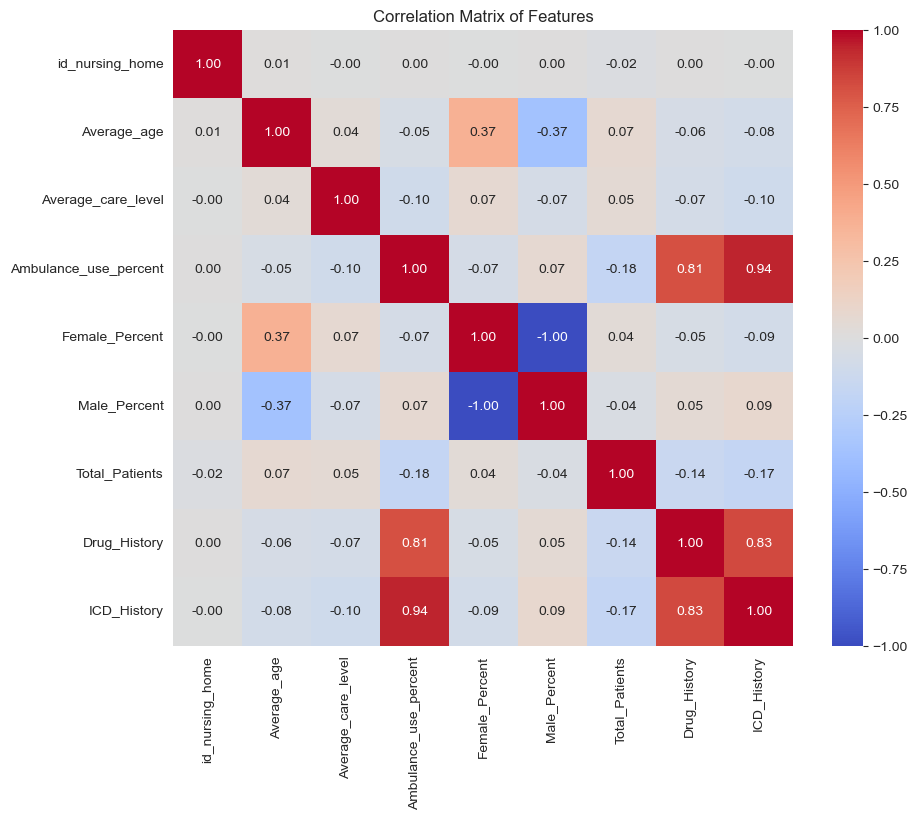

In [68]:
#correlation matrix 
correlation_matrix = cluster_features.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## 2. Clustering 3 groups based on 6 criteria: age, gender, care level, total cases, icd_history, drug_history

### final the cluster criteria for running model

In [69]:
# Assuming you already have the cluster_features DataFrame defined
# Dropping the 'Male_Percent' column
cluster_features1 = cluster_features.drop(columns=['Male_Percent','Ambulance_use_percent'])

# Alternatively, you can also use the following if you want to specify to drop it in-place without assigning back:
# cluster_features1.drop(columns=['Male_Percent'], inplace=True)

# Print the updated DataFrame to verify the column has been dropped
print(cluster_features1)

          id_nursing_home  Average_age  Average_care_level  Female_Percent  \
0    -9210274116072207264     0.439940           -0.002839        0.202565   
1    -9205283150249745664     0.140120            0.387460        0.084395   
2    -9201979875083794768    -0.437550            0.577279        0.923837   
3    -9198618969881118180     2.251735            0.783565        0.923837   
4    -9198491151774942993    -0.437550           -0.660436       -2.088536   
...                   ...          ...                 ...             ...   
3589  9182894034301911841     0.376313            0.042564        0.686018   
3590  9185586483970272253    -0.437550           -1.984104       -0.833380   
3591  9198747583826049468     0.907093            0.205965        0.923837   
3592  9214037759593362286     0.288130            0.366409       -0.089850   
3593  9216583944345314986    -1.165897           -0.479936       -1.586474   

      Total_Patients  Drug_History  ICD_History  
0           1

### Find optimal K by Elbow method:

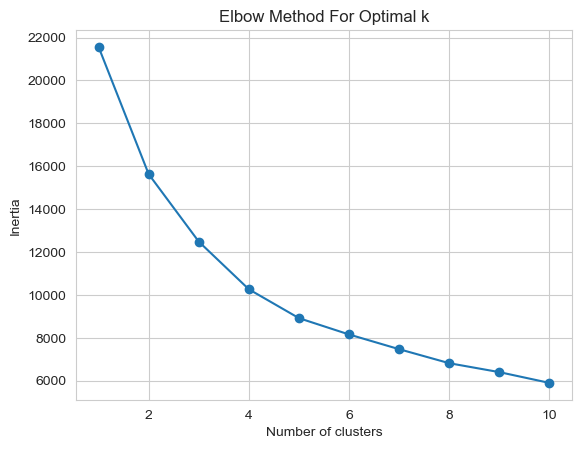

In [70]:
#determine the optimal number of clusters.
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_features1.drop(columns='id_nursing_home'))
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Clustering Nursing homes to 3 groups with 6 cluster features

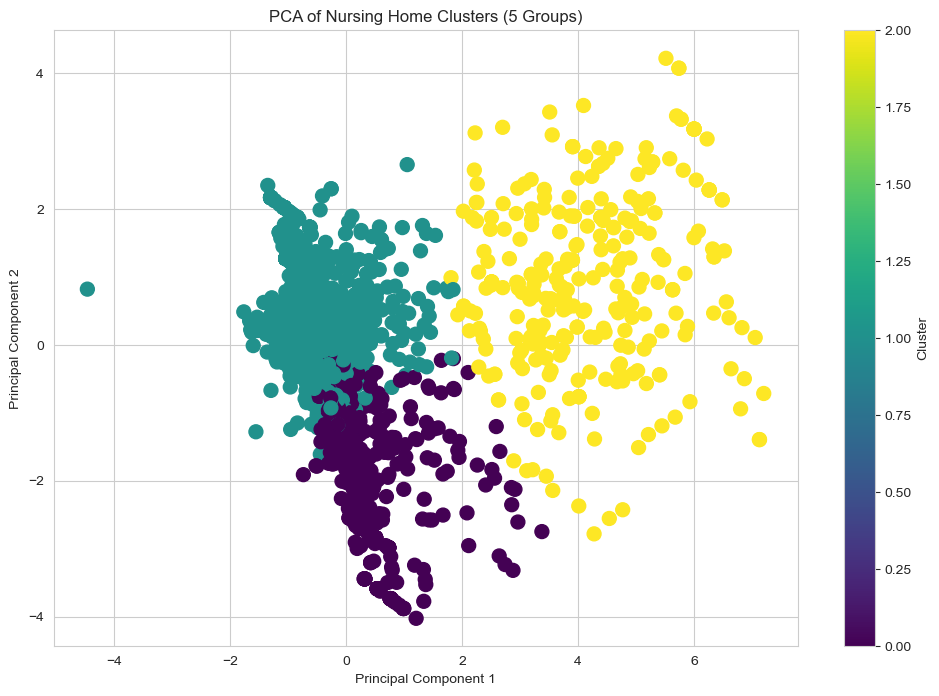

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming cluster_features1 is already defined and has the necessary columns
# Selecting features for clustering (excluding Male_Percent)
features = cluster_features1[['Average_age', 'Average_care_level', 'Drug_History','ICD_History', 'Female_Percent', 'Total_Patients']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering with K-Means (5 groups)
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility
cluster_labels = kmeans.fit_predict(scaled_features)

# Perform PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results including the cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# 2D Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
                      c=pca_df['Cluster'], cmap='viridis', s=100)

# Labeling axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Nursing Home Clusters (5 Groups)')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [72]:
#assign clusters to original data 
# Assuming 'cluster_features1' holds your data
cluster_features1['Cluster'] = cluster_labels  # Assign cluster labels to the original DataFrame

# Display nursing homes with clusters
print(cluster_features1[['id_nursing_home', 'Average_age', 'Average_care_level', 'Drug_History','ICD_History', 'Female_Percent','Total_Patients', 'Cluster']])
cluster_features1.info()

          id_nursing_home  Average_age  Average_care_level  Drug_History  \
0    -9210274116072207264     0.439940           -0.002839     -0.313027   
1    -9205283150249745664     0.140120            0.387460     -0.221177   
2    -9201979875083794768    -0.437550            0.577279     -0.360996   
3    -9198618969881118180     2.251735            0.783565     -0.360996   
4    -9198491151774942993    -0.437550           -0.660436     -0.360996   
...                   ...          ...                 ...           ...   
3589  9182894034301911841     0.376313            0.042564     -0.303379   
3590  9185586483970272253    -0.437550           -1.984104      0.125547   
3591  9198747583826049468     0.907093            0.205965     -0.360996   
3592  9214037759593362286     0.288130            0.366409     -0.124675   
3593  9216583944345314986    -1.165897           -0.479936     -0.360996   

      ICD_History  Female_Percent  Total_Patients  Cluster  
0       -0.306697        0

In [73]:
# Export the cluster features with assigned clusters to a CSV file
cluster_features1.to_csv('nursing_home_clusters_3grs.csv', index=False)


### Update clustering result to full dataset to get group definitions

In [74]:
import pandas as pd
#merge with the original data to get means of clustered groups:
#clus_groups_full = pd.merge(summary_clus_df, cluster_features1,on='id_case', how='left')

# Merge 'Cluster' into summary_clus_df by 'id_case'
clus_groups_full = summary_clus_df.merge(
    cluster_features1[['id_nursing_home', 'Cluster']],  # Select only id_case and Cluster columns
    on='id_nursing_home',  # Use id_case as the key for merging
    how='left'     # Use left join to preserve all rows in summary_clus_df
)
print(clus_groups_full.info())
print(clus_groups_full.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594 entries, 0 to 3593
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_nursing_home      3594 non-null   int64  
 1   Female_Count         3594 non-null   int64  
 2   Male_Count           3594 non-null   int64  
 3   Average_Age          3594 non-null   Float64
 4   Average_Care_Level   3594 non-null   Float64
 5   Total_Ambulance_Use  3594 non-null   int64  
 6   Mean_Drug_History    3594 non-null   float64
 7   Mean_ICD_History     3594 non-null   float64
 8   Total_Patients       3594 non-null   int64  
 9   Female_Percent       3594 non-null   float64
 10  Male_Percent         3594 non-null   float64
 11  Cluster              3594 non-null   int32  
dtypes: Float64(2), float64(4), int32(1), int64(5)
memory usage: 358.0 KB
None
       id_nursing_home  Female_Count  Male_Count  Average_Age  \
0 -9210274116072207264           162          51 

In [75]:
# show data by clustered groups
clus_group_diff = clus_groups_full.groupby('Cluster').agg({
    'Average_Age': 'mean',
    'Average_Care_Level': 'mean',
    'Mean_Drug_History': 'mean',
    'Mean_ICD_History': 'mean',
    'Female_Percent': 'mean',
    'id_nursing_home': 'count',  # Count how many nursing homes are in each cluster
    'Total_Patients': 'mean'
}).reset_index()

print(clus_group_diff)

   Cluster  Average_Age  Average_Care_Level  Mean_Drug_History  \
0        0    76.268561            3.371557           0.074734   
1        1    85.227762            3.503773           0.075317   
2        2     81.64502            3.238209           2.193714   

   Mean_ICD_History  Female_Percent  id_nursing_home  Total_Patients  
0          0.158459       17.364083              675       24.573333  
1          0.111300       83.502227             2627      108.046060  
2          3.288306       61.978818              292        4.099315  


In [76]:
# Analyze features by cluster
cluster_summary = cluster_features1.groupby('Cluster').agg({
    'Average_age': 'mean',
    'Average_care_level': 'mean',
    'Drug_History': 'mean',
    'ICD_History': 'mean',
    'Female_Percent': 'mean',
    'id_nursing_home': 'count',  # Count how many nursing homes are in each cluster
    'Total_Patients': 'mean'
}).reset_index()

print(cluster_summary)


#in 4 cluster is due to nursing homes where is 1 to 10 people 

   Cluster  Average_age  Average_care_level  Drug_History  ICD_History  \
0        0    -0.939295           -0.123907     -0.251912    -0.237068   
1        1     0.265397            0.067013     -0.251060    -0.287928   
2        2    -0.216353           -0.316462      2.841013     3.138380   

   Female_Percent  id_nursing_home  Total_Patients  
0       -1.565465              675       -0.487899  
1        0.426862             2627        0.198304  
2       -0.221503              292       -0.656210  


### PCA of Nursing Home Clusters with Centroids

   Average_age  Average_care_level  ICD_History  Drug_History  Female_Percent  \
0    -0.939295           -0.123907    -0.251912     -0.237068       -1.565465   
1     0.265397            0.067013    -0.251060     -0.287928        0.426862   
2    -0.216353           -0.316462     2.841013      3.138380       -0.221503   

   Total_Patients  Cluster  
0       -0.487899        0  
1        0.198304        1  
2       -0.656210        2  


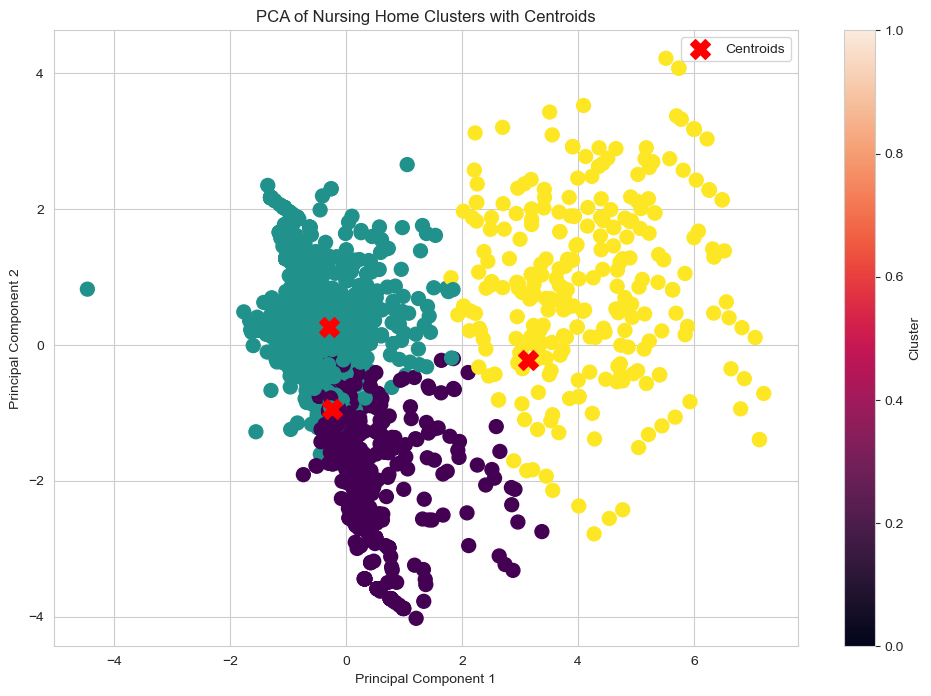

In [77]:
# Get the cluster centers
centers = kmeans.cluster_centers_

# Inverse transform the centers to original feature space for interpretability
original_centers = scaler.inverse_transform(centers)

# Create a DataFrame for the centers
centers_df = pd.DataFrame(original_centers, columns=['Average_age', 'Average_care_level', 'ICD_History', 'Drug_History', 'Female_Percent', 'Total_Patients'])
centers_df['Cluster'] = range(len(centers))

# Display the cluster centers
print(centers_df)

# Plot centroids in the 2D PCA space
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', s=100)
plt.scatter(centers_df['Drug_History'], centers_df['Average_age'], c='red', s=200, marker='X', label='Centroids')

# Labeling axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Nursing Home Clusters with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

## 3. Clustering 4 groups based on 4 criteria: age, gender, total cases, icd_history

In [80]:
cluster_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_nursing_home        3594 non-null   int64  
 1   Average_age            3594 non-null   float64
 2   Average_care_level     3594 non-null   float64
 3   Ambulance_use_percent  3594 non-null   float64
 4   Female_Percent         3594 non-null   float64
 5   Male_Percent           3594 non-null   float64
 6   Total_Patients         3594 non-null   float64
 7   Drug_History           3594 non-null   float64
 8   ICD_History            3594 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 252.8 KB


In [81]:
# Assuming you already have the cluster_features DataFrame defined
# Dropping the 'Male_Percent' column
cluster_features2 = cluster_features.drop(columns=['Male_Percent','Ambulance_use_percent','Drug_History', 'Average_care_level'])

# Alternatively, you can also use the following if you want to specify to drop it in-place without assigning back:
# cluster_features2.drop(columns=['Male_Percent'], inplace=True)

# Print the updated DataFrame to verify the column has been dropped
print(cluster_features2)

          id_nursing_home  Average_age  Female_Percent  Total_Patients  \
0    -9210274116072207264     0.439940        0.202565        1.061098   
1    -9205283150249745664     0.140120        0.084395        4.974148   
2    -9201979875083794768    -0.437550        0.923837       -0.632364   
3    -9198618969881118180     2.251735        0.923837       -0.681688   
4    -9198491151774942993    -0.437550       -2.088536       -0.665247   
...                   ...          ...             ...             ...   
3589  9182894034301911841     0.376313        0.686018       -0.065137   
3590  9185586483970272253    -0.437550       -0.833380       -0.591261   
3591  9198747583826049468     0.907093        0.923837       -0.648806   
3592  9214037759593362286     0.288130       -0.089850        1.899609   
3593  9216583944345314986    -1.165897       -1.586474       -0.492613   

      ICD_History  
0       -0.306697  
1       -0.268653  
2       -0.407962  
3       -0.407962  
4       -0.

### Find optimal K by Elbow method:

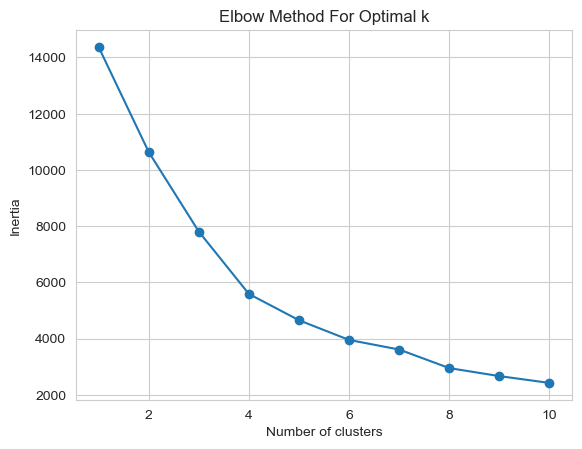

In [82]:
#determine the optimal number of clusters.
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_features2.drop(columns='id_nursing_home'))
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Clustering Nursing homes to 4 groups with 4 cluster features

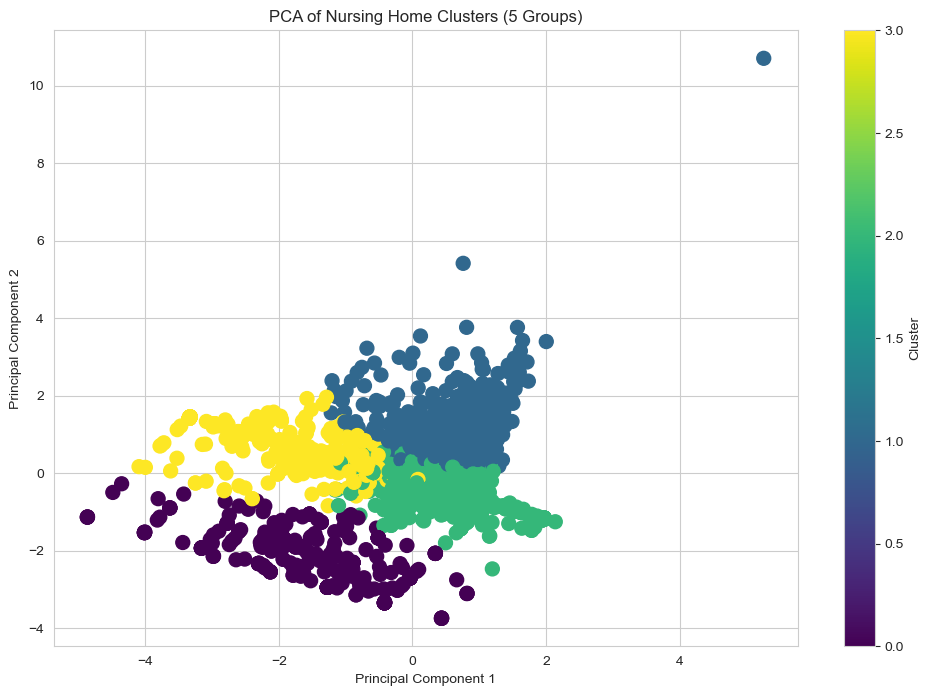

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming cluster_features2 is already defined and has the necessary columns
# Selecting features for clustering (excluding Male_Percent)
features = cluster_features2[['Average_age', 'ICD_History', 'Female_Percent', 'Total_Patients']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering with K-Means (5 groups)
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility
cluster_labels = kmeans.fit_predict(scaled_features)

# Perform PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results including the cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# 2D Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
                      c=pca_df['Cluster'], cmap='viridis', s=100)

# Labeling axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Nursing Home Clusters (5 Groups)')
plt.colorbar(scatter, label='Cluster')
plt.show()

   Average_age  ICD_History  Female_Percent  Total_Patients  Cluster
0    -0.225533     3.130890       -0.212552       -0.656836        0
1     0.128656    -0.266301        0.061627        1.392783        1
2     0.315213    -0.306270        0.617113       -0.440382        2
3    -0.905340    -0.267526       -1.604545       -0.550069        3


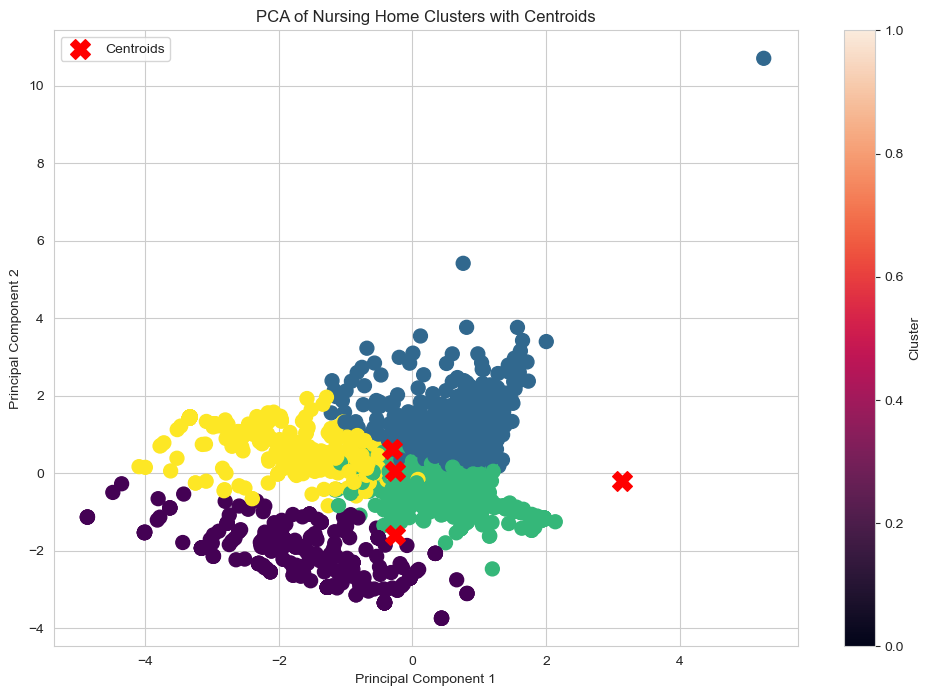

In [84]:
# Get the cluster centers
centers = kmeans.cluster_centers_

# Inverse transform the centers to original feature space for interpretability
original_centers = scaler.inverse_transform(centers)

# Create a DataFrame for the centers
centers_df = pd.DataFrame(original_centers, columns=['Average_age', 'ICD_History', 'Female_Percent', 'Total_Patients'])
centers_df['Cluster'] = range(len(centers))

# Display the cluster centers
print(centers_df)

# Plot centroids in the 2D PCA space
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', s=100)
plt.scatter(centers_df['ICD_History'], centers_df['Female_Percent'], c='red', s=200, marker='X', label='Centroids')

# Labeling axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Nursing Home Clusters with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [85]:
#assign clusters to original data 
# Assuming 'cluster_features2' holds your data
cluster_features2['Cluster'] = cluster_labels  # Assign cluster labels to the original DataFrame

# Display nursing homes with clusters
print(cluster_features2[['id_nursing_home', 'Average_age', 'ICD_History', 'Female_Percent','Total_Patients', 'Cluster']])
cluster_features2.info()

          id_nursing_home  Average_age  ICD_History  Female_Percent  \
0    -9210274116072207264     0.439940    -0.306697        0.202565   
1    -9205283150249745664     0.140120    -0.268653        0.084395   
2    -9201979875083794768    -0.437550    -0.407962        0.923837   
3    -9198618969881118180     2.251735    -0.407962        0.923837   
4    -9198491151774942993    -0.437550    -0.407962       -2.088536   
...                   ...          ...          ...             ...   
3589  9182894034301911841     0.376313    -0.365391        0.686018   
3590  9185586483970272253    -0.437550    -0.048472       -0.833380   
3591  9198747583826049468     0.907093    -0.407962        0.923837   
3592  9214037759593362286     0.288130    -0.188844       -0.089850   
3593  9216583944345314986    -1.165897    -0.407962       -1.586474   

      Total_Patients  Cluster  
0           1.061098        1  
1           4.974148        1  
2          -0.632364        2  
3          -0.68168

In [86]:
# Export the cluster features with assigned clusters to a CSV file
cluster_features2.to_csv('nursing_home_clusters_3grs_2.csv', index=False)


### ***Form nursing home groups' definitions based on differents data among 4 groups***

In [87]:
import pandas as pd
#merge with the original data to get means of clustered groups:
#clus_groups_full = pd.merge(summary_clus_df, cluster_features2,on='id_case', how='left')

# Merge 'Cluster' into summary_clus_df by 'id_case'
clus_groups_full2 = summary_clus_df.merge(
    cluster_features2[['id_nursing_home', 'Cluster']],  # Select only id_case and Cluster columns
    on='id_nursing_home',  # Use id_case as the key for merging
    how='left'     # Use left join to preserve all rows in summary_clus_df
)
# Merge 'Cluster' into summary_clus_df by 'id_case'
clus_groups_full2 = clus_groups_full2.merge(
    cluster_features[['id_nursing_home', 'Ambulance_use_percent' ]],  # Select only id_case and Cluster columns
    on='id_nursing_home',  # Use id_case as the key for merging
    how='left'     # Use left join to preserve all rows in summary_clus_df
)
clus_groups_full2['Ambulance_use_percent'] = clus_groups_full2['Total_Ambulance_Use']/clus_groups_full2['Total_Patients']

print(clus_groups_full2.info())
print(clus_groups_full2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594 entries, 0 to 3593
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_nursing_home        3594 non-null   int64  
 1   Female_Count           3594 non-null   int64  
 2   Male_Count             3594 non-null   int64  
 3   Average_Age            3594 non-null   Float64
 4   Average_Care_Level     3594 non-null   Float64
 5   Total_Ambulance_Use    3594 non-null   int64  
 6   Mean_Drug_History      3594 non-null   float64
 7   Mean_ICD_History       3594 non-null   float64
 8   Total_Patients         3594 non-null   int64  
 9   Female_Percent         3594 non-null   float64
 10  Male_Percent           3594 non-null   float64
 11  Cluster                3594 non-null   int32  
 12  Ambulance_use_percent  3594 non-null   float64
dtypes: Float64(2), float64(5), int32(1), int64(5)
memory usage: 386.1 KB
None
       id_nursing_home  Female_Cou

In [88]:
# show data by clustered groups
clus_group_diff2 = clus_groups_full2.groupby('Cluster').agg({
    'Average_Age': 'mean',
    'Mean_ICD_History': 'mean',
    'Female_Percent': 'mean',
    'id_nursing_home': 'count',  # Count how many nursing homes are in each cluster
    'Total_Patients': 'mean',
    'Ambulance_use_percent' : 'mean',
    'Total_Ambulance_Use': 'mean'
}).reset_index()

print(clus_group_diff2)

   Cluster  Average_Age  Mean_ICD_History  Female_Percent  id_nursing_home  \
0        0    81.576752          3.281361       62.275955              302   
1        1    84.210827          0.131353       71.377715              938   
2        2    85.598238          0.094292       89.817862             1703   
3        3    76.521076          0.130217       16.066768              651   

   Total_Patients  Ambulance_use_percent  Total_Ambulance_Use  
0        4.023179               0.886385             3.228477  
1      253.347548               0.031280             7.911514  
2       30.353494               0.025742             0.982971  
3       17.010753               0.031168             0.554531  


In [89]:
# Create a mapping dictionary
group_mapping = {
    0: "Long_ICD",
    1: "Highest_cases",
    2: "Elder_female",
    3: "Young_male"
}
# Replace the values in the 'nursing_home_group' column
clus_group_diff2['nursing_home_group'] = clus_group_diff2['Cluster'].astype(int).replace(group_mapping)

# Verify the changes
print(clus_group_diff2['nursing_home_group'].value_counts())


Long_ICD         1
Highest_cases    1
Elder_female     1
Young_male       1
Name: nursing_home_group, dtype: int64


### Plot the differents among 4 nursing home groups

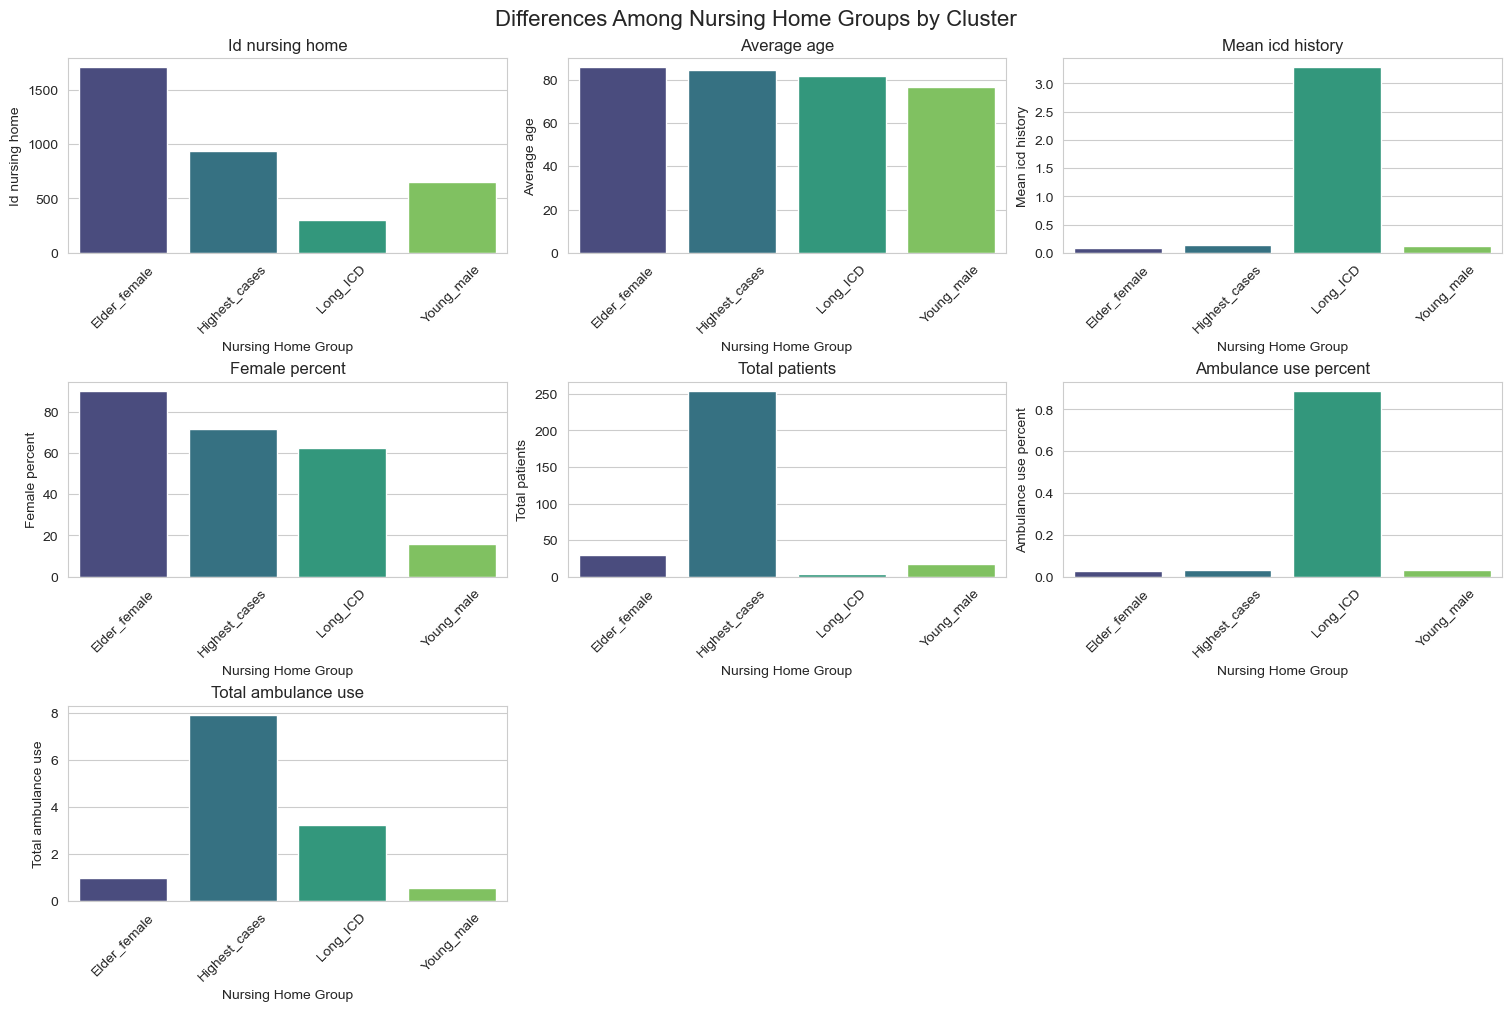

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
clus_group_diff2 = clus_group_diff2.sort_values(by='nursing_home_group')  # Optional: Sort by group names for consistency
metrics = [
    'id_nursing_home',
    'Average_Age', 
    'Mean_ICD_History', 
    'Female_Percent',      
    'Total_Patients', 
    'Ambulance_use_percent', 
    'Total_Ambulance_Use'
]

# Set up a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(
        data=clus_group_diff2,
        x='nursing_home_group',
        y=metric,
        palette='viridis',
        ax=ax
    )
    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_xlabel('Nursing Home Group')
    ax.set_ylabel(metric.replace('_', ' ').capitalize())
    ax.tick_params(axis='x', rotation=45)

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a main title
fig.suptitle('Differences Among Nursing Home Groups by Cluster', fontsize=16)

# Show the plot
plt.show()


### Merging the nursing homes clustering groups into summary_df

In [91]:
import pandas as pd

# Import the CSV file containing cluster information
nursing_home_clusters = pd.read_csv('nursing_home_clusters_3grs_2.csv')

# Rename the Cluster column to nursing_home_group
nursing_home_clusters.rename(columns={'Cluster': 'nursing_home_group'}, inplace=True)

# Merge the cluster information with summary_df using 'id_nursing_home'
merged_drug_icd_df = merged_drug_icd_df.merge(
    nursing_home_clusters[['id_nursing_home', 'nursing_home_group']],
    on='id_nursing_home',
    how='left'  # Ensures all rows in summary_df are retained
)

# Display the first few rows of the updated summary_df to verify the merge
print(merged_drug_icd_df.head())


               id_case  E03  E11  E14  E66  E78  F00  F01  F03  F06  ...  \
0 -9223268341593767710    0    3    0    0    0    3    0    1    0  ...   
1 -9222561620628027899    0    4    4    0    4    0    4    0    4  ...   
2 -9220996301635083507    0    3    1    0    0    0    0    0    0  ...   
3 -9220011210998780923    3    0    0    0    0    0    1    0    0  ...   
4 -9219611111880485689    0    4    0    4    4    0    0    0    0  ...   

   Quetiapin  Ramipril  Risperidon  Simvastatin  Tilidin und Naloxon  \
0          0         0           0            0                    0   
1          0         0           0            4                    0   
2          0         0           0            0                    1   
3          1         0           2            0                    0   
4          0         4           0            4                    0   

   Torasemid  rare_drugs  icd_history  drug_history  nursing_home_group  
0          0           0            

# 2. Find variable importance

In [92]:
merged_drug_icd_df.info()
print(merged_drug_icd_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 301620
Data columns (total 86 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               301621 non-null  int64 
 1   E03                   301621 non-null  int64 
 2   E11                   301621 non-null  int64 
 3   E14                   301621 non-null  int64 
 4   E66                   301621 non-null  int64 
 5   E78                   301621 non-null  int64 
 6   F00                   301621 non-null  int64 
 7   F01                   301621 non-null  int64 
 8   F03                   301621 non-null  int64 
 9   F06                   301621 non-null  int64 
 10  F32                   301621 non-null  int64 
 11  F33                   301621 non-null  int64 
 12  F45                   301621 non-null  int64 
 13  G30                   301621 non-null  int64 
 14  I10                   301621 non-null  int64 
 15  I11              

In [93]:
# Create a mapping dictionary
group_mapping = {
    0: "Long_ICD",
    1: "Highest_cases",
    2: "Elder_female",
    3: "Young_male"
}
# Replace the values in the 'nursing_home_group' column
merged_drug_icd_df['nursing_home_group'] = merged_drug_icd_df['nursing_home_group'].astype(int).replace(group_mapping)

# Verify the changes
print(merged_drug_icd_df['nursing_home_group'].value_counts())

Highest_cases    237640
Elder_female      51692
Young_male        11074
Long_ICD           1215
Name: nursing_home_group, dtype: int64


In [94]:
# List of columns to convert
columns_to_convert2 = [
    "E03", "E11", "E14", "E66", "E78", "F00", "F01", "F03", "F06", "F32", "F33", "F45", 
    "G30", "I10", "I11", "I25", "I48", "I50", "I69", "I70", "I83", "M16", "M17", "M47", 
    "M54", "M81", "N18", "N39", "R26", "R29", "R32", "R52", "R54", "Z01", "Z25", "Z74", 
    "Z92", "Z96", "rare_icd", "Q1_icd", "Q2_icd", "Q3_icd", "Q4_icd", 'Chapter IV', 'Chapter IX', 
    'Chapter XIV', 'Chapter XVIII', 'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI',
    'gender']

# Convert columns to int64 and fill missing values with 0
for col in columns_to_convert2:
    expanded_icd_df[col] = pd.to_numeric(expanded_icd_df[col], errors='coerce').fillna(0).astype('int64')

# Verify the data types

In [95]:
merged_drug_icd_df = merged_drug_icd_df.drop(columns = ['icd_chapter'])
merged_drug_icd_df.head()

id_case  E03  E11  E14  E66  E78  F00  F01  F03  F06  ...  \
0 -9223268341593767710    0    3    0    0    0    3    0    1    0  ...   
1 -9222561620628027899    0    4    4    0    4    0    4    0    4  ...   
2 -9220996301635083507    0    3    1    0    0    0    0    0    0  ...   
3 -9220011210998780923    3    0    0    0    0    0    1    0    0  ...   
4 -9219611111880485689    0    4    0    4    4    0    0    0    0  ...   

   Quetiapin  Ramipril  Risperidon  Simvastatin  Tilidin und Naloxon  \
0          0         0           0            0                    0   
1          0         0           0            4                    0   
2          0         0           0            0                    1   
3          1         0           2            0                    0   
4          0         4           0            4                    0   

   Torasemid  rare_drugs  icd_history  drug_history  nursing_home_group  
0          0           0            3             0          Young_male  
1          0           4            4             4       Highest_cases  
2          2           1            3             2            Long_ICD  
3          1           3            3             3       Highest_cases  
4          0           4            4             4        Elder_female  

[5 rows x 85 columns]

In [96]:
# Export the variable importance data to a CSV file
merged_drug_icd_df.to_csv('full_cleaned_data_4grsNH_for_best_subsets.csv', index=False)

In [97]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_best = merged_drug_icd_df.copy()  # Assuming `combined_df` is the dataset

# Step 1: Split into train+validation and test sets
train_val_data_best, test_data_best = train_test_split(data_best, test_size=0.1, random_state=42)

# Step 2: Split train+validation into training and validation sets
train_data_best, val_data_best = train_test_split(train_val_data_best, test_size=0.333, random_state=42)  # 30% of the total for validation

# Verify sizes
print(f"Training Data: {train_data_best.shape}")
print(f"Validation Data: {val_data_best.shape}")
print(f"Testing Data: {test_data_best.shape}")

Training Data: (181062, 85)
Validation Data: (90396, 85)
Testing Data: (30163, 85)


In [98]:
# Save each dataset to a CSV file
train_data_best.to_csv('train_data_for_best_subsets.csv', index=False)  # index=False prevents adding an extra index column
val_data_best.to_csv('validate_data_for_best_subsets.csv', index=False)
test_data_best.to_csv('test_data_for_best_subsets.csv', index=False)

# 3. Train statistical model with icd history

## 3.1 Split the Dataset
We'll split the dataset into three parts:

Testing Data: 10%
Training Data: 60%
Validation Data: 30%

In [99]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load the dataset
#file_path4 = 'C:/Users/ad.huyen/OneDrive/IBE_Hohenheim_Uni/Winter_2425/D_AppliedDSLab/AOK/ADSL_AOK/merged_summary_drugs_icd.csv'
#expanded_drugs_df = pd.read_csv(file_path4)

# Load the dataset
data = expanded_icd_df.copy()  # Assuming `combined_df` is the dataset

# Step 1: Split into train+validation and test sets
train_val_data2, test_data2 = train_test_split(data, test_size=0.1, random_state=42)

# Step 2: Split train+validation into training and validation sets
train_data2, val_data2 = train_test_split(train_val_data2, test_size=0.333, random_state=42)  # 30% of the total for validation

# Verify sizes
print(f"Training Data: {train_data2.shape}")
print(f"Validation Data: {val_data2.shape}")
print(f"Testing Data: {test_data2.shape}")


Training Data: (181062, 59)
Validation Data: (90396, 59)
Testing Data: (30163, 59)


## 3.2 Preprocess the Data
Handle missing values.
Convert categorical variables (e.g., gender, hospital_icd) into numerical form using one-hot encoding or label encoding.
Ensure numerical variables are normalized/scaled if required.

In [100]:
X_train2 = train_data2
print(X_train2.dtypes)


id_case             int64
E03                 int64
E11                 int64
E14                 int64
E66                 int64
E78                 int64
F00                 int64
F01                 int64
F03                 int64
F06                 int64
F32                 int64
F33                 int64
F45                 int64
G30                 int64
I10                 int64
I11                 int64
I25                 int64
I48                 int64
I50                 int64
I69                 int64
I70                 int64
I83                 int64
M16                 int64
M17                 int64
M47                 int64
M54                 int64
M81                 int64
N18                 int64
N39                 int64
R26                 int64
R29                 int64
R32                 int64
R52                 int64
R54                 int64
Z01                 int64
Z25                 int64
Z74                 int64
Z92                 int64
Z96         

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X_train2 = train_data2.drop(columns=['ambulance', 'id_case'])
y_train2 = train_data2['ambulance']

X_val2 = val_data2.drop(columns=['ambulance', 'id_case'])
y_val2 = val_data2['ambulance']

X_test2 = test_data2.drop(columns=['ambulance', 'id_case'])
y_test2 = test_data2['ambulance']

# Categorical and numerical columns
categorical_cols2 = X_train2.select_dtypes(include=['object']).columns
numerical_cols2 = X_train2.select_dtypes(include=['int64', 'Int64']).columns

# Preprocessing pipeline
categorical_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

# Combine preprocessors
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor2, numerical_cols2),
        ('cat', categorical_preprocessor2, categorical_cols2)])

# Fit and transform training data
X_train_preprocessed2 = preprocessor2.fit_transform(X_train2)
X_val_preprocessed2 = preprocessor2.transform(X_val2)
X_test_preprocessed2 = preprocessor2.transform(X_test2)


## 3.3 Train Logistic Regression
Logistic regression identifies which variables significantly contribute to predicting the dependent variable (ambulance).

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the logistic regression model
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_preprocessed2, y_train2)

# Evaluate the model
val_predictions2 = model2.predict(X_val_preprocessed2)
print("Validation Performance:")
print(classification_report(y_val2, val_predictions2))


Validation Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87247
           1       0.96      0.97      0.97      3149

    accuracy                           1.00     90396
   macro avg       0.98      0.98      0.98     90396
weighted avg       1.00      1.00      1.00     90396



AUC: 0.9978


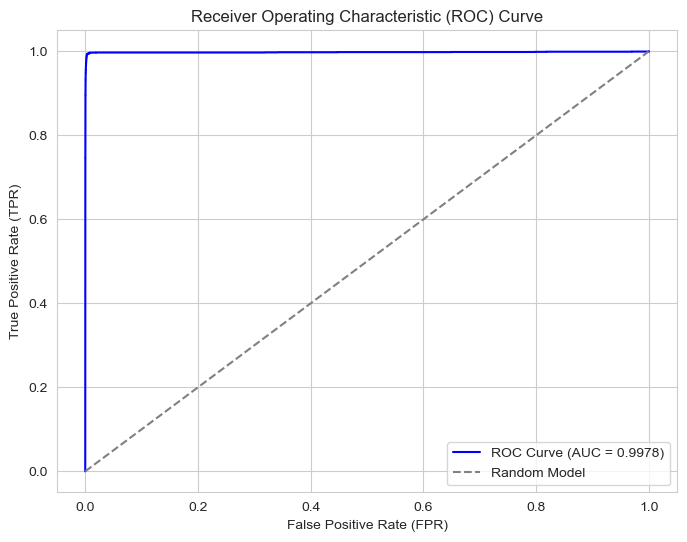

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_val_prob2 = model2.predict_proba(X_val_preprocessed2)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val2, y_val_prob2)

# Calculate AUC
auc_score2 = roc_auc_score(y_val2, y_val_prob2)
print(f"AUC: {auc_score2:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score2:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 3.4 Identify Significant Variables
Logistic regression provides coefficients for each feature. You can analyze the significance using the magnitude of the coefficients.

In [104]:
# Get feature names
feature_names2 = preprocessor2.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols2)
numerical_feature_names2 = numerical_cols2.tolist()
all_feature_names2 = list(feature_names2) + numerical_feature_names2

# Pair feature names with coefficients
coefficients2 = model2.coef_[0]
significance_df2 = pd.DataFrame({
    'Feature': all_feature_names2,
    'Coefficient': coefficients2
}).sort_values(by='Coefficient', ascending=False)

print(significance_df2)


            Feature  Coefficient
51    Chapter XVIII     9.115232
34              M81     5.232522
60           Q4_icd     2.265528
64  id_nursing_home     2.211910
33              M54     1.867093
..              ...          ...
50      Chapter XIV    -0.879957
44              Z74    -0.966002
38              R29    -0.966002
35              N18    -1.537286
59           Q3_icd    -9.004828

[65 rows x 2 columns]


# 4. Train statistical model with drug history

## 4.1 Split the Dataset
We'll split the dataset into three parts:

Testing Data: 10%
Training Data: 60%
Validation Data: 30%

In [105]:
expanded_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301621 entries, 0 to 301620
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id_case               301621 non-null  int64
 1   Q1_drug               301621 non-null  int64
 2   Q2_drug               301621 non-null  int64
 3   Q3_drug               301621 non-null  int64
 4   Q4_drug               301621 non-null  int64
 5   Acetylsalicylsäure    301621 non-null  int64
 6   Amlodipin             301621 non-null  int64
 7   Apixaban              301621 non-null  int64
 8   Atorvastatin          301621 non-null  int64
 9   Bisoprolol            301621 non-null  int64
 10  Candesartan           301621 non-null  int64
 11  Levothyroxin-Natrium  301621 non-null  int64
 12  Melperon              301621 non-null  int64
 13  Metamizol-Natrium     301621 non-null  int64
 14  Metoprolol            301621 non-null  int64
 15  Mirtazapin            301621 non-n

In [106]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load the dataset
#file_path4 = 'C:/Users/ad.huyen/OneDrive/IBE_Hohenheim_Uni/Winter_2425/D_AppliedDSLab/AOK/ADSL_AOK/merged_summary_drugs_icd.csv'
#expanded_drugs_df = pd.read_csv(file_path4)

# Load the dataset
data = expanded_drugs_df.copy()  # Assuming `combined_df` is the dataset

# Step 1: Split into train+validation and test sets
train_val_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Step 2: Split train+validation into training and validation sets
train_data, val_data = train_test_split(train_val_data, test_size=0.333, random_state=42)  # 30% of the total for validation

# Verify sizes
print(f"Training Data: {train_data.shape}")
print(f"Validation Data: {val_data.shape}")
print(f"Testing Data: {test_data.shape}")


Training Data: (181062, 29)
Validation Data: (90396, 29)
Testing Data: (30163, 29)


In [107]:
print(train_data.describe())
print(val_data.describe())
print(test_data.describe())

            id_case        Q1_drug        Q2_drug        Q3_drug  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.576517e+16       0.031851       0.029150       0.021396   
std    5.324125e+18       0.175604       0.168228       0.144701   
min   -9.223290e+18       0.000000       0.000000       0.000000   
25%   -4.581487e+18       0.000000       0.000000       0.000000   
50%    2.374118e+16       0.000000       0.000000       0.000000   
75%    4.616006e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       1.000000       1.000000       1.000000   

             Q4_drug  Acetylsalicylsäure      Amlodipin       Apixaban  \
count  181062.000000       181062.000000  181062.000000  181062.000000   
mean        0.025930            0.015409       0.019021       0.014973   
std         0.158928            0.199925       0.232939       0.203666   
min         0.000000            0.000000       0.000000       0.000000   
25%         0.000

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181062 entries, 226797 to 199152
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id_case               181062 non-null  int64
 1   Q1_drug               181062 non-null  int64
 2   Q2_drug               181062 non-null  int64
 3   Q3_drug               181062 non-null  int64
 4   Q4_drug               181062 non-null  int64
 5   Acetylsalicylsäure    181062 non-null  int64
 6   Amlodipin             181062 non-null  int64
 7   Apixaban              181062 non-null  int64
 8   Atorvastatin          181062 non-null  int64
 9   Bisoprolol            181062 non-null  int64
 10  Candesartan           181062 non-null  int64
 11  Levothyroxin-Natrium  181062 non-null  int64
 12  Melperon              181062 non-null  int64
 13  Metamizol-Natrium     181062 non-null  int64
 14  Metoprolol            181062 non-null  int64
 15  Mirtazapin            181062 

In [109]:
# Identify columns with missing values
missing_values = train_data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Display results
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Series([], dtype: int64)


## 4.2 Preprocess the Data
Handle missing values.
Convert categorical variables (e.g., gender, hospital_icd) into numerical form using one-hot encoding or label encoding.
Ensure numerical variables are normalized/scaled if required.
### Summary of Purpose
#### Handles Missing Values:
Categorical: Imputed with the most frequent value.
Numerical: Imputed with the mean.
#### Transforms Features:
Categorical: One-hot encoding converts categories into numerical format.
Numerical: Normalization scales features to a uniform range.
#### Prepares Data for Modeling:
After preprocessing, the datasets (X_train_preprocessed, X_val_preprocessed, X_test_preprocessed) are ready for input into machine learning models. The preprocessing ensures consistency and compatibility between training, validation, and test datasets.

In [110]:
X_train = train_data
print(X_train.dtypes)


id_case                 int64
Q1_drug                 int64
Q2_drug                 int64
Q3_drug                 int64
Q4_drug                 int64
Acetylsalicylsäure      int64
Amlodipin               int64
Apixaban                int64
Atorvastatin            int64
Bisoprolol              int64
Candesartan             int64
Levothyroxin-Natrium    int64
Melperon                int64
Metamizol-Natrium       int64
Metoprolol              int64
Mirtazapin              int64
Pantoprazol             int64
Pipamperon              int64
Quetiapin               int64
Ramipril                int64
Risperidon              int64
Simvastatin             int64
Tilidin und Naloxon     int64
Torasemid               int64
rare_drugs              int64
gender                  int64
age                     Int64
care_level              Int64
ambulance               int64
dtype: object


In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X_train = train_data.drop(columns=['ambulance', 'id_case'])
y_train = train_data['ambulance']

X_val = val_data.drop(columns=['ambulance', 'id_case'])
y_val = val_data['ambulance']

X_test = test_data.drop(columns=['ambulance', 'id_case'])
y_test = test_data['ambulance']

# Categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'Int64']).columns

# Preprocessing pipeline
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)])

# Fit and transform training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)


## 4.3 Train Logistic Regression
Logistic regression identifies which variables significantly contribute to predicting the dependent variable (ambulance).

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Evaluate the model
val_predictions = model.predict(X_val_preprocessed)
print("Validation Performance:")
print(classification_report(y_val, val_predictions))

Validation Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     87235
           1       0.93      0.75      0.83      3161

    accuracy                           0.99     90396
   macro avg       0.96      0.87      0.91     90396
weighted avg       0.99      0.99      0.99     90396



AUC: 0.9350


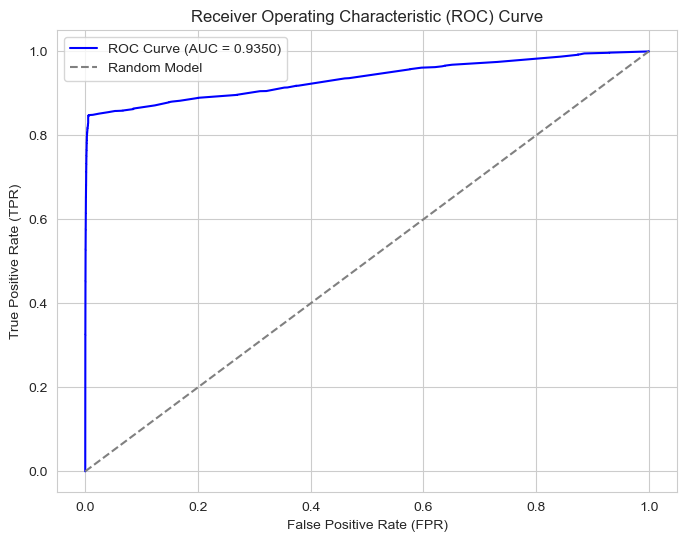

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_val_prob = model.predict_proba(X_val_preprocessed)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate AUC
auc_score = roc_auc_score(y_val, y_val_prob)
print(f"AUC: {auc_score:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 4.4 Identify Significant Variables
***Logistic regression*** provides coefficients for each feature. 
We can analyze the significance using the magnitude of the coefficients.

In [114]:
# Fit the preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Get feature names for categorical features
#feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

# Get feature names for numerical features
numerical_feature_names = numerical_cols.tolist()

# Combine all feature names
all_feature_names = numerical_feature_names

#print(all_feature_names)

# Pair feature names with coefficients
coefficients = model.coef_[0]
significance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(significance_df)


                 Feature  Coefficient
9            Candesartan     5.800644
22             Torasemid     4.423667
0                Q1_drug     3.584156
12     Metamizol-Natrium     3.410174
13            Metoprolol     3.007920
8             Bisoprolol     2.484301
20           Simvastatin     2.417440
7           Atorvastatin     2.209523
15           Pantoprazol     2.200332
4     Acetylsalicylsäure     2.090803
6               Apixaban     1.953895
14            Mirtazapin     1.902035
19            Risperidon     1.624633
10  Levothyroxin-Natrium     1.477263
5              Amlodipin     1.408608
16            Pipamperon     1.342003
11              Melperon     1.341849
18              Ramipril     1.161049
23            rare_drugs     0.593974
17             Quetiapin     0.393789
2                Q3_drug     0.391166
25                   age    -0.117206
21   Tilidin und Naloxon    -0.169256
1                Q2_drug    -0.393677
24                gender    -0.418286
26          

## ***II. Descriptive Analysis***
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### data_merged_parquet

In [118]:
import pandas as pd

# Read the Parquet file into a Pandas DataFrame
merged_df = merged_summary_df

# Print the DataFrame to see its contents
print("DataFrame:")
merged_df.info()
print(merged_df.head(10))

DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155373 entries, 0 to 5155372
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id_case          int64 
 1   hospital_icd     object
 2   gender           object
 3   age              Int64 
 4   care_level       Int64 
 5   id_nursing_home  int64 
 6   ambulance        int64 
 7   icd_name         object
 8   icd_chapter      object
 9   icd_chap_name    object
 10  q_before:drug    object
 11  q_before:icd     object
dtypes: Int64(2), int64(3), object(7)
memory usage: 521.2+ MB
               id_case hospital_icd gender  age  care_level  \
0  7923304136941695484                   f   80           4   
1 -4386311604643402502                   f  100           3   
2  7166251325851230449                   f   90           5   
3  1946181716444567454                   f   90           2   
4 -5438876074327774034                   f   90           3   
5  5877187459672448449        

In [119]:
# Get counts of unique values in the 'icd_name' column
group_counts = merged_df['icd_name'].value_counts()

# Print the unique groups with their counts
print("Counts of unique groups in 'icd_name':")
print(group_counts)

Counts of unique groups in 'icd_name':
Heart failure                                                             1625769
Rare Diseases                                                              764906
Other chronic obstructive pulmonary disease                                397346
Type 2 diabetes mellitus                                                   397311
Atherosclerosis                                                            346092
Cystitis                                                                   189492
Essential (primary) hypertension                                           171076
Other gastroenteritis and colitis of infectious and unspecified origin     155039
Iron deficiency anaemia                                                    142435
Recurrent depressive disorder                                              110814
Acute bronchitis                                                           100846
Diverticular disease of intestine                          

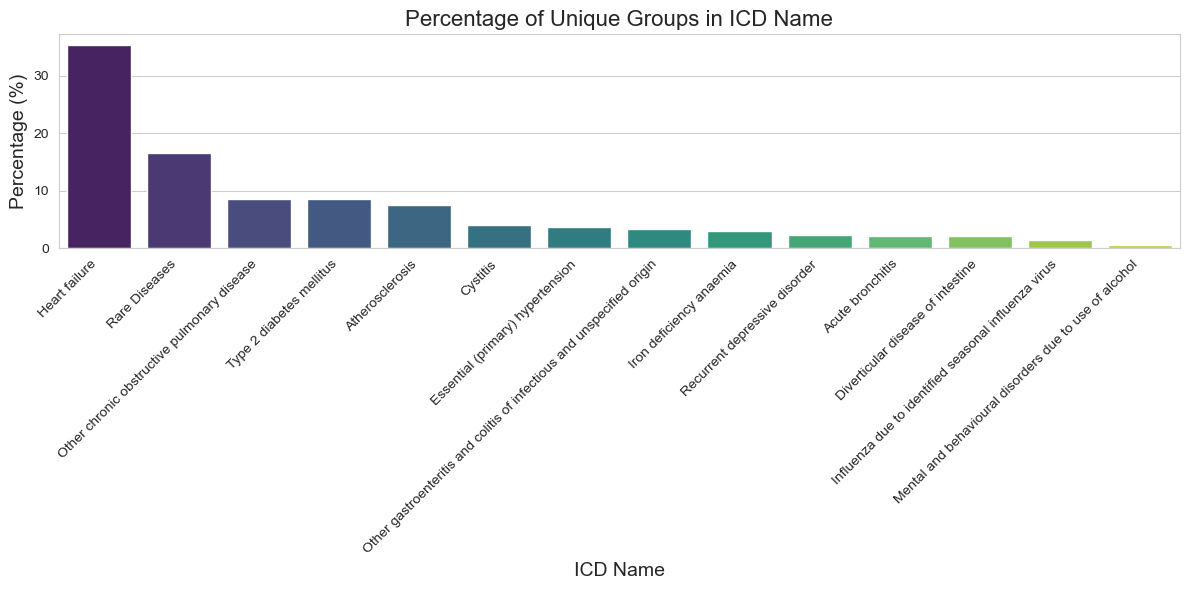

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get counts of unique values in the 'icd_name' column
group_counts = merged_df['icd_name'].value_counts()

# Calculate the total count
total_counts = group_counts.sum()

# Calculate percentages
percentage_counts = (group_counts / total_counts) * 100

# Create a new DataFrame for easier plotting
percentage_df = pd.DataFrame(percentage_counts).reset_index()
percentage_df.columns = ['icd_name', 'percentage']


# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='icd_name', y='percentage', data=percentage_df, palette='viridis')

# Customize the plot
plt.title('Percentage of Unique Groups in ICD Name', fontsize=16)
plt.xlabel('ICD Name', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Show the plot
plt.show()

In [121]:
#####reduced dataset for analyse 
import pandas as pd

# Assuming merged_df is already defined

# List of columns to keep
columns_to_keep = ['id_case', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance']

# Creating the new DataFrame with only the specified columns
reduced_df = merged_df[columns_to_keep]

# Display the new DataFrame (optional)
print(reduced_df)

                     id_case gender  age  care_level      id_nursing_home  \
0        7923304136941695484      f   80           4 -1139442538691087144   
1       -4386311604643402502      f  100           3 -5801912611659177983   
2        7166251325851230449      f   90           5 -4712751983897181569   
3        1946181716444567454      f   90           2 -1262854703124578860   
4       -5438876074327774034      f   90           3 -8055365392138262512   
...                      ...    ...  ...         ...                  ...   
5155368   399877703314280870      m   70           2  5444444626487017022   
5155369   399877703314280870      m   70           2  5444444626487017022   
5155370   399877703314280870      m   70           2  5444444626487017022   
5155371   399877703314280870      m   70           2  5444444626487017022   
5155372   399877703314280870      m   70           2  5444444626487017022   

         ambulance  
0                0  
1                0  
2           

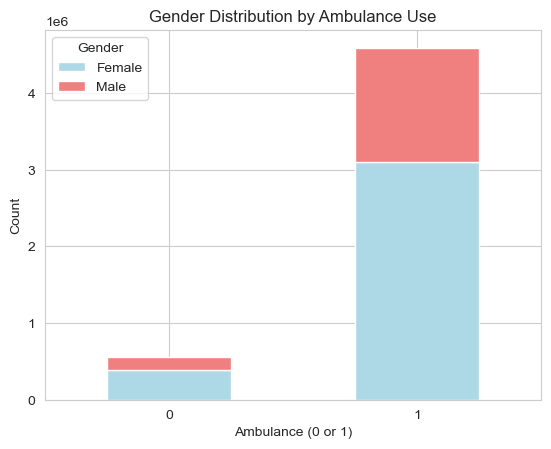

In [122]:
# Count the number of males and females for each value of 'ambulance'
count_df = reduced_df.groupby(['ambulance', 'gender']).size().unstack(fill_value=0)

# Plotting
count_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

plt.title('Gender Distribution by Ambulance Use')
plt.xlabel('Ambulance (0 or 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To rotate x-axis labels if necessary
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

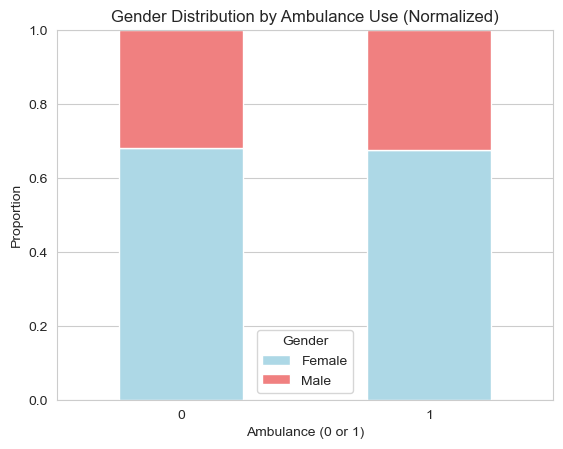

In [123]:
# Create the reduced DataFrame as before
columns_to_keep = ['id_case', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance']
reduced_df = merged_df[columns_to_keep]

# Count the number of males and females for each value of 'ambulance'
count_df = reduced_df.groupby(['ambulance', 'gender']).size().unstack(fill_value=0)

# Normalize the counts to proportions
count_df_normalized = count_df.div(count_df.sum(axis=1), axis=0)

# Plotting the normalized stacked bar plot
count_df_normalized.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

plt.title('Gender Distribution by Ambulance Use (Normalized)')
plt.xlabel('Ambulance (0 or 1)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # To rotate x-axis labels if necessary
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for proportions
plt.show()

C:\Users\ad.huyen\AppData\Local\Temp\ipykernel_6212\582279819.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['age_group'] = pd.cut(reduced_df['age'], bins=bins, labels=labels)


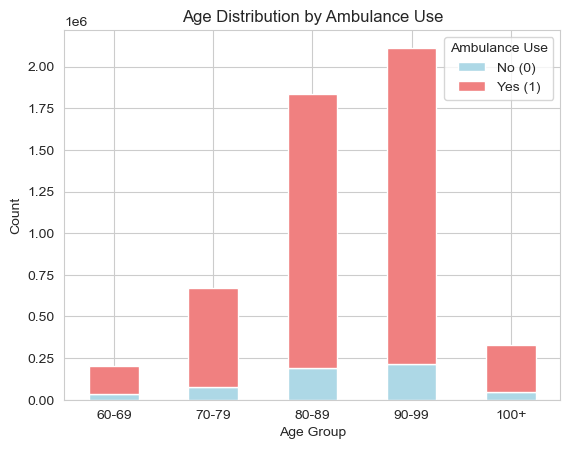

In [124]:
# Create reduced_df as you did earlier
columns_to_keep = ['id_case', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance']
reduced_df = merged_df[columns_to_keep]

# Create age bins and labels
bins = [59, 69, 79, 89, 99, 109]  # Creating bins for ages: 60-69, 70-79, 80-89, 90-99, 100+
labels = ['60-69', '70-79', '80-89', '90-99', '100+']

# Categorize ages into bins
reduced_df['age_group'] = pd.cut(reduced_df['age'], bins=bins, labels=labels)

# Count the number of occurrences for each age group and ambulance status
count_df = reduced_df.groupby(['age_group', 'ambulance']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
count_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

plt.title('Age Distribution by Ambulance Use')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Ambulance Use', labels=['No (0)', 'Yes (1)'])
plt.show()

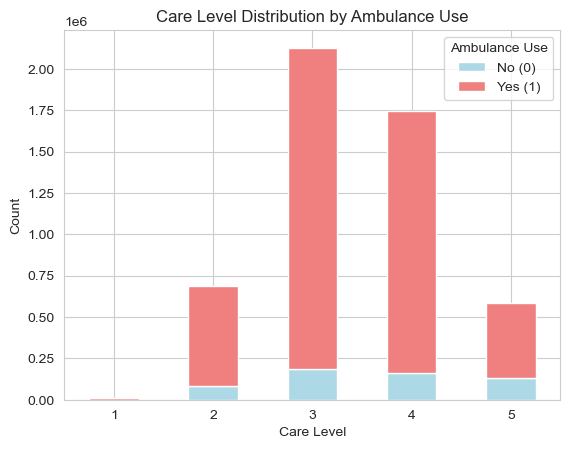

In [125]:
# Create reduced_df as you did earlier
columns_to_keep = ['id_case', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance']
reduced_df = merged_df[columns_to_keep]

# Count the number of occurrences for each care level and ambulance status
count_df = reduced_df.groupby(['care_level', 'ambulance']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
count_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

plt.title('Care Level Distribution by Ambulance Use')
plt.xlabel('Care Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Ambulance Use', labels=['No (0)', 'Yes (1)'])
plt.show()

In [126]:
import pandas as pd

# Your DataFrame is named 'reduced_df'
# Assuming reduced_df is already defined

# 1. Gender counts
gender_counts = reduced_df.groupby('id_nursing_home')['gender'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
gender_counts.columns = ['Female_Count', 'Male_Count']

# 2. Average age and care level
average_metrics = reduced_df.groupby('id_nursing_home').agg({
    'age': 'mean',
    'care_level': 'mean',
    'ambulance': 'sum'  # Total ambulance use
}).rename(columns={'age': 'Average_Age', 'care_level': 'Average_Care_Level', 'ambulance': 'Total_Ambulance_Use'})

# 3. Combine all metrics
summary_df = pd.concat([gender_counts, average_metrics], axis=1).reset_index()

# 4. Calculate percentages
summary_df['Total_Patients'] = summary_df['Female_Count'] + summary_df['Male_Count']
summary_df['Female_Percent'] = (summary_df['Female_Count'] / summary_df['Total_Patients']) * 100
summary_df['Male_Percent'] = (summary_df['Male_Count'] / summary_df['Total_Patients']) * 100

import pandas as pd

# Assuming summary_df is your DataFrame with the columns Total_Ambulance_Use and Total_Patients
# Calculate the new column
summary_df['ambulance_perc'] = summary_df['Total_Ambulance_Use'] / summary_df['Total_Patients']

# Replace infinite values with 0
summary_df['ambulance_perc'] = summary_df['ambulance_perc'].replace([float('inf'), -float('inf')], 0)
# 5. Display the summary DataFrame
print(summary_df)

# Optionally, save to CSV for external analysis
#summary_df.to_csv('nursing_home_summary.csv', index=False)

          id_nursing_home  Female_Count  Male_Count  Average_Age  \
0    -9210274116072207264          1145          99    81.559486   
1    -9205283150249745664          7494        1856    84.568984   
2    -9201979875083794768             7           0         80.0   
3    -9198618969881118180             1           0        100.0   
4    -9198491151774942993             0           3         80.0   
...                   ...           ...         ...          ...   
3589  9182894034301911841           829           6    89.640719   
3590  9185586483970272253           878           7         80.0   
3591  9198747583826049468             5           0         90.0   
3592  9214037759593362286          4103        8560    79.078417   
3593  9216583944345314986             4          20    74.583333   

      Average_Care_Level  Total_Ambulance_Use  Total_Patients  Female_Percent  \
0               2.685691                 1036            1244       92.041801   
1                2.99

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc'],
      dtype='object')


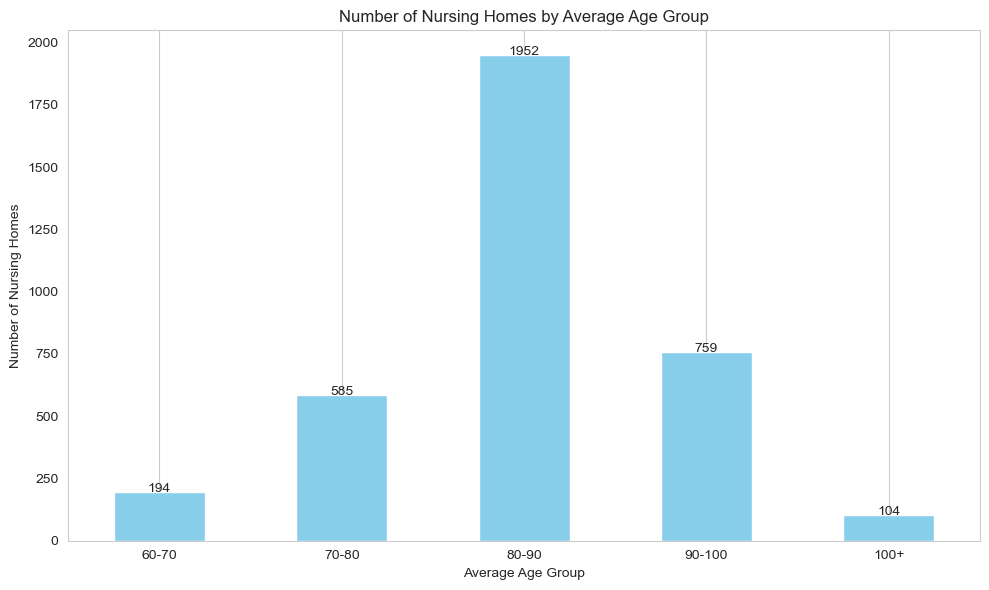

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the age bins and labels
bins = [60, 70, 80, 90, 100, 110]  # Age groups from 60 to 110
labels = ['60-70', '70-80', '80-90', '90-100', '100+']  # 5 labels for the 5 bins

# Create a new column to categorize the average age into bins
summary_df['Age_Group'] = pd.cut(summary_df['Average_Age'], bins=bins, labels=labels, right=False)

# Count the number of nursing homes in each age group
age_group_counts = summary_df['Age_Group'].value_counts().sort_index()

# Plotting the age distribution of nursing homes
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Nursing Homes by Average Age Group')
plt.xlabel('Average Age Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(age_group_counts)):
    plt.text(i, age_group_counts[i] + 0.5, str(age_group_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group'],
      dtype='object')


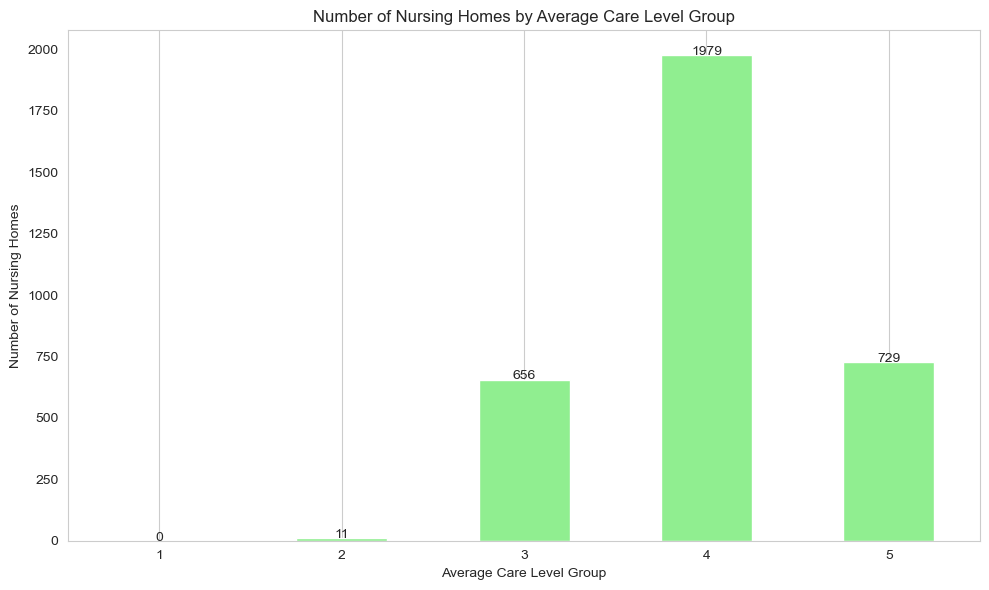

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the care level bins and labels
# Adjust these bins based on the actual range of your care levels.
bins = [0, 1, 2, 3, 4, 5]  # Example bins for care levels (1-5)
labels = ['1', '2', '3', '4', '5']  # Labels for each care level

# Check if Any NaN values exist in 'Average_Care_Level' (which can cause issues with pd.cut)
if summary_df['Average_Care_Level'].isna().any():
    print("Warning: NaN values found in 'Average_Care_Level' column. Please handle them before proceeding.")

# Create a new column to categorize the average care level into bins
summary_df['Care_Level_Group'] = pd.cut(summary_df['Average_Care_Level'], bins=bins, labels=labels, right=False)

# Count the number of nursing homes in each care level group
care_level_counts = summary_df['Care_Level_Group'].value_counts().sort_index()

# Plotting the care level distribution of nursing homes
plt.figure(figsize=(10, 6))
care_level_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Nursing Homes by Average Care Level Group')
plt.xlabel('Average Care Level Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(care_level_counts)):
    plt.text(i, care_level_counts[i] + 0.5, str(care_level_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group',
       'Care_Level_Group'],
      dtype='object')


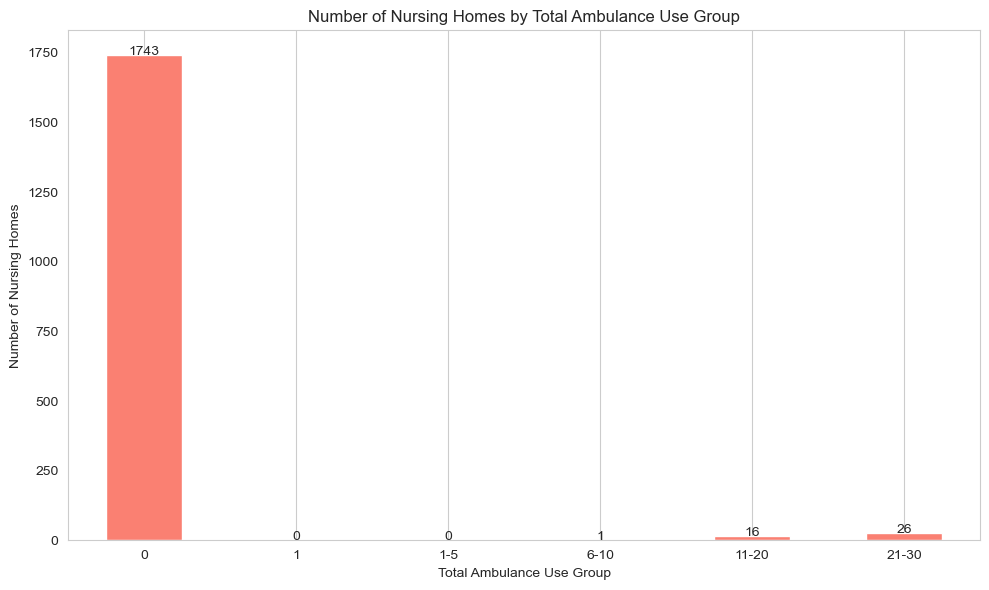

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the ambulance usage bins and labels
bins = [-1, 0, 1, 5, 10, 20, 30]  # Example bins for ambulance usage
labels = ['0', '1', '1-5', '6-10', '11-20', '21-30']  # Labels corresponding to the bins

# Create a new column to categorize the total ambulance use into bins
summary_df['Ambulance_Use_Group'] = pd.cut(summary_df['Total_Ambulance_Use'], bins=bins, labels=labels, right=True)

# Count the number of nursing homes in each ambulance use group
ambulance_use_counts = summary_df['Ambulance_Use_Group'].value_counts().sort_index()

# Plotting the ambulance use distribution of nursing homes
plt.figure(figsize=(10, 6))
ambulance_use_counts.plot(kind='bar', color='salmon')
plt.title('Number of Nursing Homes by Total Ambulance Use Group')
plt.xlabel('Total Ambulance Use Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(ambulance_use_counts)):
    plt.text(i, ambulance_use_counts[i] + 0.5, str(ambulance_use_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group',
       'Care_Level_Group', 'Ambulance_Use_Group'],
      dtype='object')


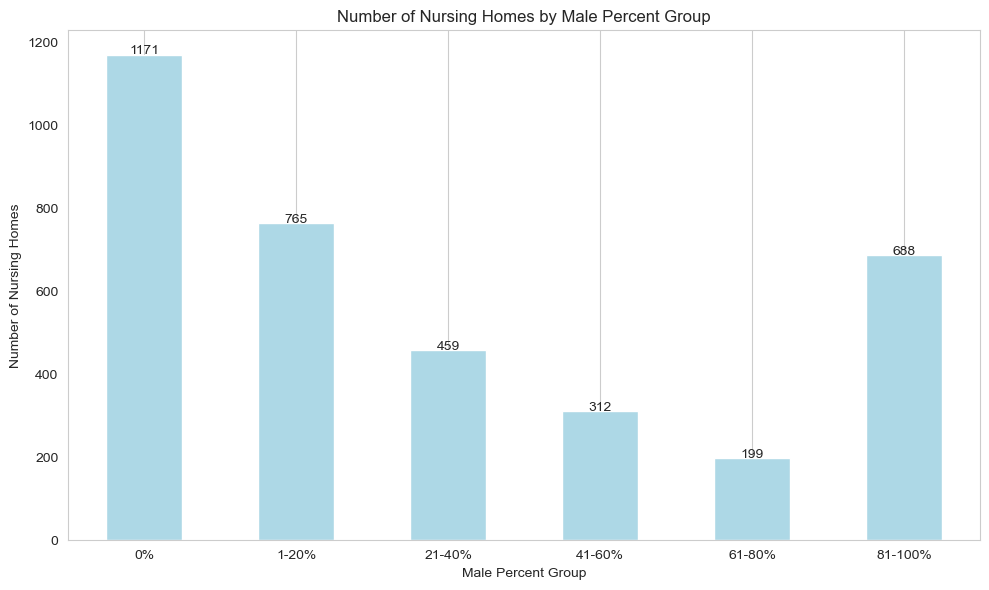

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the bins for Male_Percent and the corresponding labels
bins = [-1, 0, 20, 40, 60, 80, 100]  # Example bins for Male Percent
labels = ['0%', '1-20%', '21-40%', '41-60%', '61-80%', '81-100%']  # Labels corresponding to the bins

# Create a new column to categorize the Male_Percent into bins
summary_df['Male_Percent_Group'] = pd.cut(summary_df['Male_Percent'], bins=bins, labels=labels, right=True)

# Count the number of nursing homes in each Male_Percent group
male_percent_counts = summary_df['Male_Percent_Group'].value_counts().sort_index()

# Plotting the Male Percentage distribution of nursing homes
plt.figure(figsize=(10, 6))
male_percent_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Nursing Homes by Male Percent Group')
plt.xlabel('Male Percent Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(male_percent_counts)):
    plt.text(i, male_percent_counts[i] + 0.5, str(male_percent_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group',
       'Care_Level_Group', 'Ambulance_Use_Group', 'Male_Percent_Group'],
      dtype='object')


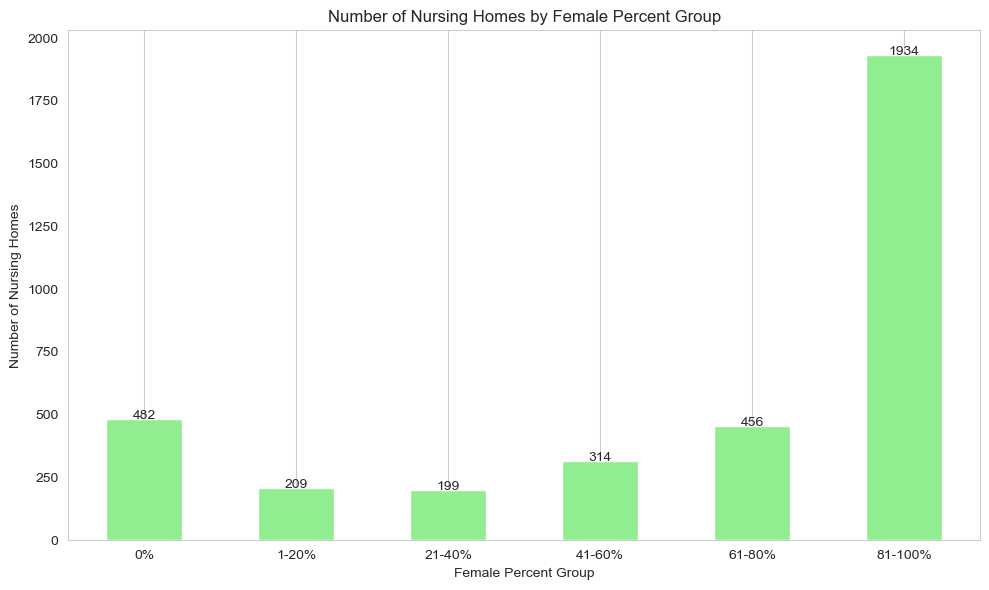

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the bins for Female_Percent and the corresponding labels
bins = [-1, 0, 20, 40, 60, 80, 100]  # Example bins for Female Percent
labels = ['0%', '1-20%', '21-40%', '41-60%', '61-80%', '81-100%']  # Labels corresponding to the bins

# Create a new column to categorize the Female_Percent into bins
summary_df['Female_Percent_Group'] = pd.cut(summary_df['Female_Percent'], bins=bins, labels=labels, right=True)

# Count the number of nursing homes in each Female_Percent group
female_percent_counts = summary_df['Female_Percent_Group'].value_counts().sort_index()

# Plotting the Female Percentage distribution of nursing homes
plt.figure(figsize=(10, 6))
female_percent_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Nursing Homes by Female Percent Group')
plt.xlabel('Female Percent Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(female_percent_counts)):
    plt.text(i, female_percent_counts[i] + 0.5, str(female_percent_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group',
       'Care_Level_Group', 'Ambulance_Use_Group', 'Male_Percent_Group',
       'Female_Percent_Group'],
      dtype='object')


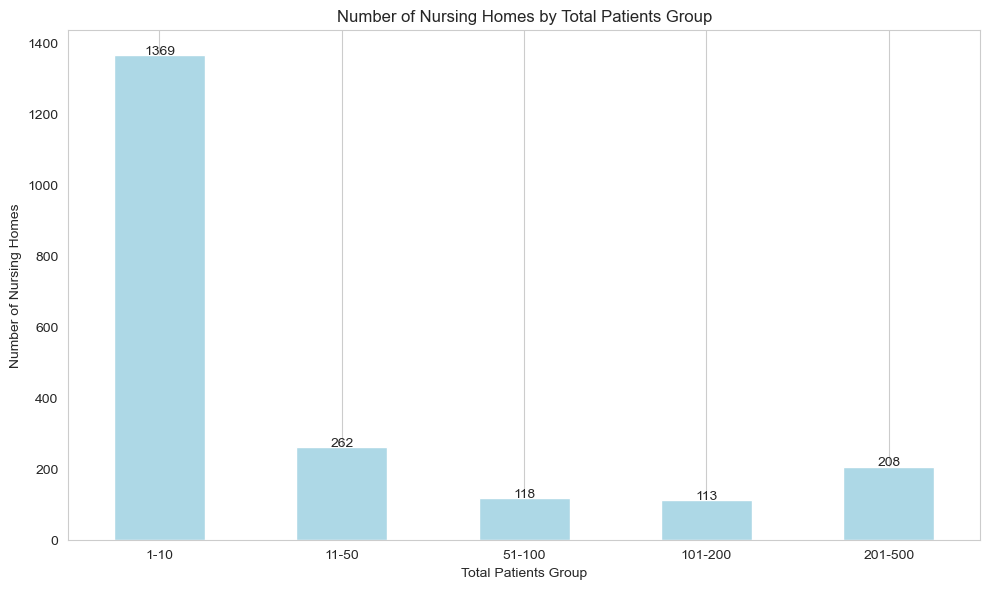

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined and contains the Total_Patients column
print("Columns in summary_df:", summary_df.columns)

# Define the new bins and corresponding labels for Total Patients
bins = [0, 10, 50, 100, 200, 500]  # Define bins up to 500
labels = ['1-10', '11-50', '51-100', '101-200', '201-500']  # Labels for each range

# Create a new column to categorize Total_Patients into bins
summary_df['Total_Patients_Group'] = pd.cut(summary_df['Total_Patients'], bins=bins, labels=labels, right=True)

# Count the number of nursing homes in each Total Patients group
total_patients_counts = summary_df['Total_Patients_Group'].value_counts().sort_index()

# Plotting the Total Patients distribution of nursing homes
plt.figure(figsize=(10, 6))
total_patients_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Nursing Homes by Total Patients Group')
plt.xlabel('Total Patients Group')
plt.ylabel('Number of Nursing Homes')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show counts on bars
for i in range(len(total_patients_counts)):
    plt.text(i, total_patients_counts[i] + 0.5, str(total_patients_counts[i]), ha='center')

plt.tight_layout()
plt.show()

Columns in summary_df: Index(['id_nursing_home', 'Female_Count', 'Male_Count', 'Average_Age',
       'Average_Care_Level', 'Total_Ambulance_Use', 'Total_Patients',
       'Female_Percent', 'Male_Percent', 'ambulance_perc', 'Age_Group',
       'Care_Level_Group', 'Ambulance_Use_Group', 'Male_Percent_Group',
       'Female_Percent_Group', 'Total_Patients_Group'],
      dtype='object')


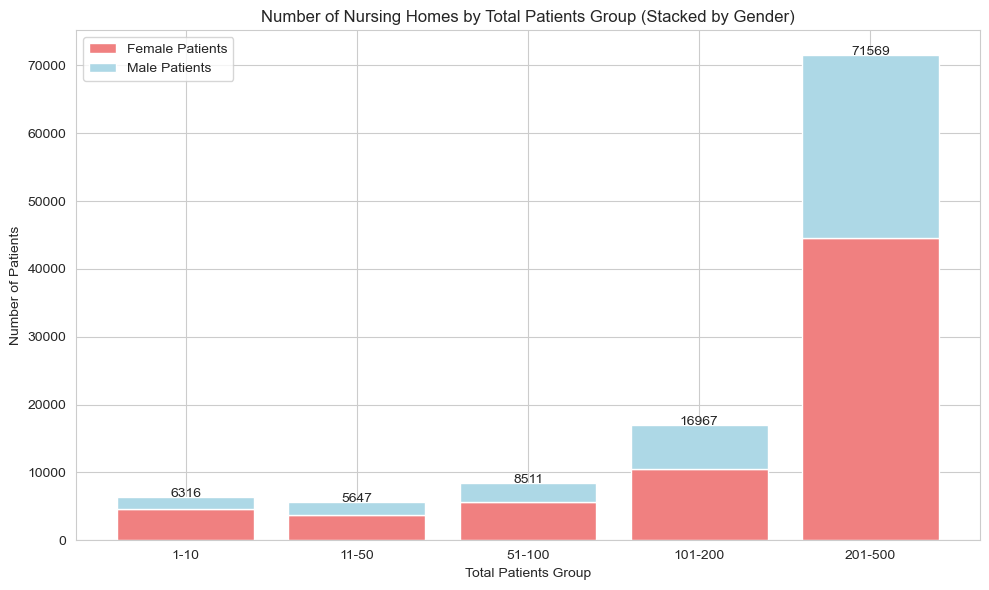

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming summary_df is already defined
print("Columns in summary_df:", summary_df.columns)

# Define the bins for Total Patients and the corresponding labels
bins = [0, 10, 50, 100, 200, 500]  # Define bins
labels = ['1-10', '11-50', '51-100', '101-200', '201-500']  # Labels for each category

# Create a new column to categorize the Total_Patients into bins
summary_df['Total_Patients_Group'] = pd.cut(summary_df['Total_Patients'], bins=bins, labels=labels, right=True)

# Create a new DataFrame to count males and females in each group
total_patients_gender_counts = summary_df.groupby('Total_Patients_Group').agg({
    'Female_Count': 'sum',  # Sum of female counts
    'Male_Count': 'sum'     # Sum of male counts
}).reset_index()

# Plotting the Total Patients distribution of nursing homes
plt.figure(figsize=(10, 6))

# Creating a stacked bar plot
plt.bar(total_patients_gender_counts['Total_Patients_Group'], total_patients_gender_counts['Female_Count'], 
        color='lightcoral', label='Female Patients')
plt.bar(total_patients_gender_counts['Total_Patients_Group'], total_patients_gender_counts['Male_Count'], 
        bottom=total_patients_gender_counts['Female_Count'], color='lightblue', label='Male Patients')

# Adding labels and title
plt.title('Number of Nursing Homes by Total Patients Group (Stacked by Gender)')
plt.xlabel('Total Patients Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend()

# Show the value counts on bars
for i in range(len(total_patients_gender_counts)):
    plt.text(i, total_patients_gender_counts['Female_Count'][i] + total_patients_gender_counts['Male_Count'][i] + 0.5, 
             str(total_patients_gender_counts['Female_Count'][i] + total_patients_gender_counts['Male_Count'][i]), ha='center')

plt.tight_layout()
plt.show()

## ***III. Variable Selection***
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

## This is the model XGBoost with Full SUbset data 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Setup path for loading data
current_path = os.getcwd()
os.chdir(current_path)
print("Working directory set to:", current_path)

# Step 1: Load the data from a Parquet file
train_data_full = pd.read_csv('full_cleaned_data_4grsNH_for_best_subsets.csv')

# Step 2: Split the data into 60% training and the remaining 40% (for validation and test)
train_data, temp_data = train_test_split(train_data_full, train_size=0.6, random_state=42, stratify=train_data_full['ambulance'])

# Step 3: Split the temporary data (40%) into 20% validation and 10% test
# For this splitting, we take 75% of temp_data for validation and 25% for testing
val_data, test_data = train_test_split(temp_data, train_size=0.67, random_state=42, stratify=temp_data['ambulance'])

# Step 4: Check the proportions in each dataset
print("Proportions in Training Set:")
print(train_data['ambulance'].value_counts(normalize=True))

print("\nProportions in Validation Set:")
print(val_data['ambulance'].value_counts(normalize=True))

print("\nProportions in Test Set:")
print(test_data['ambulance'].value_counts(normalize=True))

# List of columns to exclude
drugs = ["Acetylsalicylsäure", "Amlodipin", "Apixaban", "Atorvastatin", "Bisoprolol", 
         "Candesartan", "Levothyroxin-Natrium", "Melperon", "Metamizol-Natrium", 
         "Metoprolol", "Mirtazapin", "Pantoprazol", "Pipamperon", "Quetiapin", 
         "Ramipril", "Risperidon", "Simvastatin", "Tilidin und Naloxon", "Torasemid", "rare_drugs"]

chapters_icd = ['Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
                'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI']

long_history = ['icd_history', 'drug_history']

drug_history = ['drug_history']

icd_history = ['icd_history']

nursing_home = ['nursing_home_group']

quarter_drug_his = ['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']

quarter_icd_his = ['Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd']

id_case = ['id_case']

icd = ['E03', 'E11', 'E14', 'E66', 'E78', 'F00', 'F01', 'F03', 'F06', 'F32',
       'F33', 'F45', 'G30', 'I10', 'I11', 'I25', 'I48', 'I50', 'I69', 'I70',
       'I83', 'M16', 'M17', 'M47', 'M54', 'M81', 'N18', 'N39', 'R26', 'R29',
       'R32', 'R52', 'R54', 'Z01', 'Z25', 'Z74', 'Z92', 'Z96', 'rare_icd']

# Train Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
train_data1 = train_data_full.drop(columns=drugs + long_history + id_case)
train_data2 = train_data_full.drop(columns=chapters_icd + long_history+ id_case)
train_data3 = train_data_full.drop(columns=nursing_home + long_history+ id_case)
train_data4 = train_data_full.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
train_data5 = train_data_full.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his+ nursing_home + id_case) 
train_data6 = train_data_full.drop(columns= quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)

# Validation Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
val_data1 = val_data.drop(columns=drugs + long_history + id_case)
val_data2 = val_data.drop(columns=chapters_icd + long_history + id_case)
val_data3 = val_data.drop(columns=nursing_home + long_history + id_case)
val_data4 = val_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
val_data5 = val_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + nursing_home + id_case)
val_data6 = val_data.drop(columns=quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)

# Validation Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
test_data1 = test_data.drop(columns=drugs + long_history + id_case)
test_data2 = test_data.drop(columns=chapters_icd + long_history + id_case)
test_data3 = test_data.drop(columns=nursing_home + long_history + id_case)
test_data4 = test_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
test_data5 = test_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + nursing_home + id_case)
test_data6 = test_data.drop(columns=quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)


Proportions in Training Set:
0    0.965415
1    0.034585
Name: ambulance, dtype: float64

Proportions in Validation Set:
0    0.965423
1    0.034577
Name: ambulance, dtype: float64

Proportions in Test Set:
0    0.965415
1    0.034585
Name: ambulance, dtype: float64


## chapters_icd+quarter_icd_his

In [5]:
import cuml
import cupy as cp
import xgboost as xgb
from cuml.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import gc

AUC Score: 0.9947015208509686


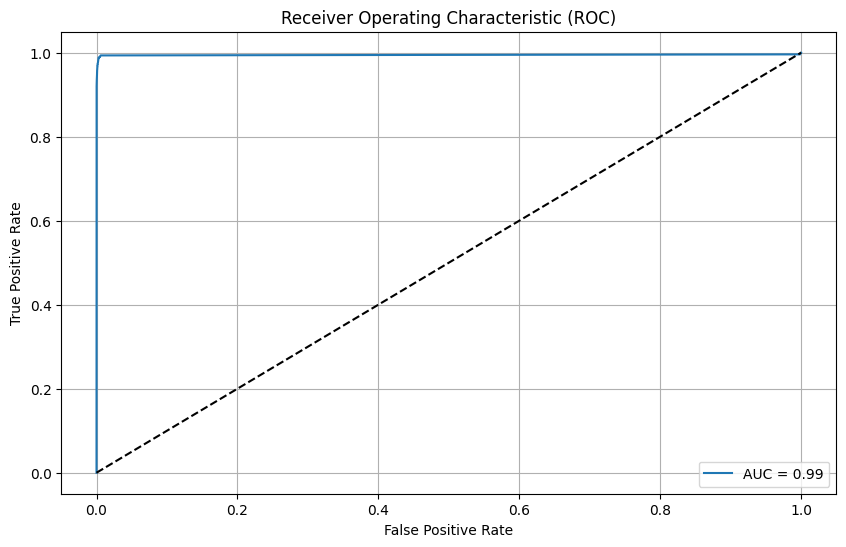

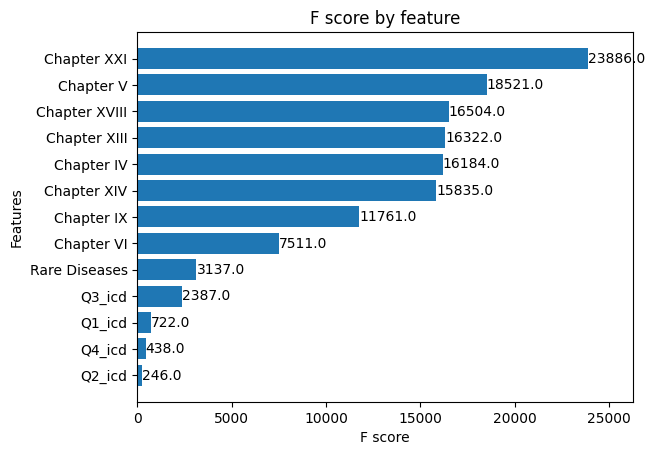

Feature: Chapter XXI, Importance: 23886.0
Feature: Chapter V, Importance: 18521.0
Feature: Chapter XVIII, Importance: 16504.0
Feature: Chapter XIII, Importance: 16322.0
Feature: Chapter IV, Importance: 16184.0
Feature: Chapter XIV, Importance: 15835.0
Feature: Chapter IX, Importance: 11761.0
Feature: Chapter VI, Importance: 7511.0
Feature: Rare Diseases, Importance: 3137.0
Feature: Q3_icd, Importance: 2387.0
Feature: Q1_icd, Importance: 722.0
Feature: Q4_icd, Importance: 438.0
Feature: Q2_icd, Importance: 246.0


In [6]:


# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = chapters_icd+quarter_icd_his
# Define features and target variable for training
X_train = train_data[feature_columns]
y_train = train_data['ambulance']

# Define features and target variable for validation
X_valid = val_data[feature_columns]
y_valid = val_data['ambulance']

# Create DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# GPU parameters for XGBoost
params = {
    'max_depth': 8,
    'max_leaves': 2**8,
    'tree_method': 'gpu_hist',  # Specify that we want to use GPU
    'objective': 'binary:logistic',  # Adjust as per your requirement
    'eval_metric': 'logloss',
    'subsample': 0.8
}

# Training the Model
model = xgb.train(params, dtrain, num_boost_round=3000)

# Predict on the validation set
y_pred_prob = model.predict(dvalid)

# Calculate AUC
auc_score = roc_auc_score(y_valid.values, y_pred_prob)  # Corrected line
print(f"AUC Score: {auc_score}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid.values, y_pred_prob)  # Corrected line

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


# Inspecting Feature Importance
ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

# Get feature importances
importances = model.get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

## chapters_icd+quarter_icd_his

AUC Score: 0.9947015208509686


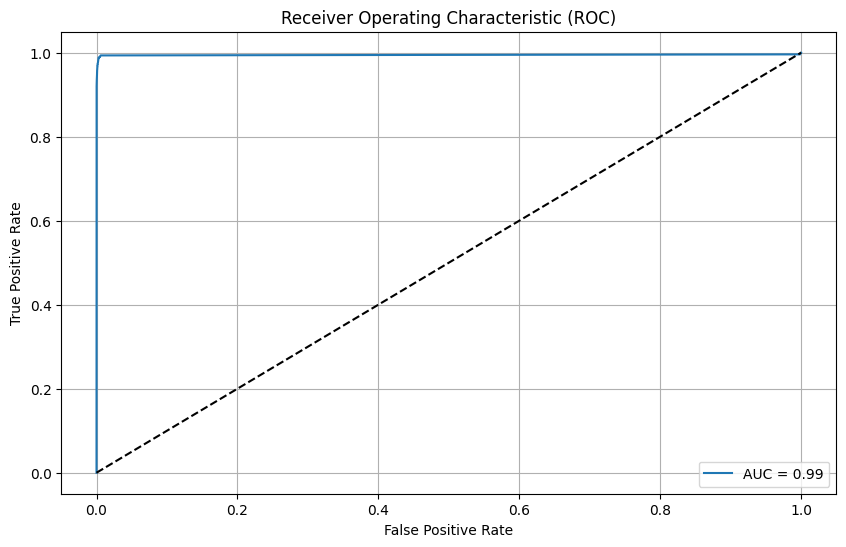

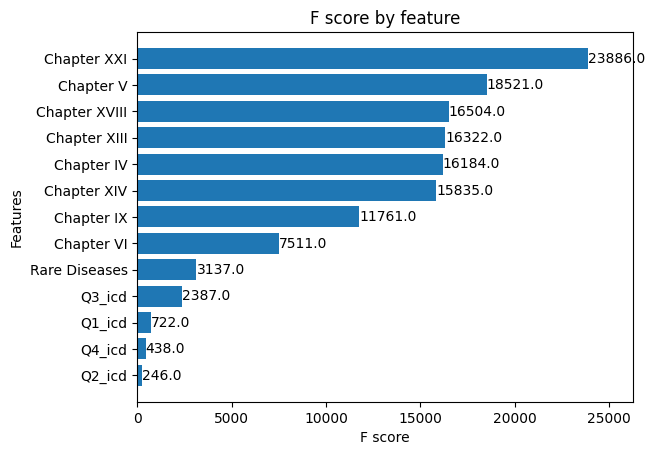

Feature: Chapter XXI, Importance: 23886.0
Feature: Chapter V, Importance: 18521.0
Feature: Chapter XVIII, Importance: 16504.0
Feature: Chapter XIII, Importance: 16322.0
Feature: Chapter IV, Importance: 16184.0
Feature: Chapter XIV, Importance: 15835.0
Feature: Chapter IX, Importance: 11761.0
Feature: Chapter VI, Importance: 7511.0
Feature: Rare Diseases, Importance: 3137.0
Feature: Q3_icd, Importance: 2387.0
Feature: Q1_icd, Importance: 722.0
Feature: Q4_icd, Importance: 438.0
Feature: Q2_icd, Importance: 246.0


In [7]:

import cupy as cp
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import gc

# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = chapters_icd+quarter_icd_his
# Define features and target variable for training
X_train = train_data[feature_columns]
y_train = train_data['ambulance']

# Define features and target variable for validation
X_valid = val_data[feature_columns]
y_valid = val_data['ambulance']

# Create DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# GPU parameters for XGBoost
params = {
    'max_depth': 8,
    'max_leaves': 2**8,
    'tree_method': 'gpu_hist',  # Specify that we want to use GPU
    'objective': 'binary:logistic',  # Adjust as per your requirement
    'eval_metric': 'logloss',
    'subsample': 0.8
}

# Training the Model
model = xgb.train(params, dtrain, num_boost_round=3000)

# Predict on the validation set
y_pred_prob = model.predict(dvalid)

# Calculate AUC
auc_score = roc_auc_score(y_valid.values, y_pred_prob)  # Corrected line
print(f"AUC Score: {auc_score}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid.values, y_pred_prob)  # Corrected line

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


# Inspecting Feature Importance
ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

# Get feature importances
importances = model.get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

## drugs + quarter_drug_his

D:\Application\Anaconda3\Anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:59:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
D:\Application\Anaconda3\Anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [02:00:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


AUC Score: 0.9255250018218266


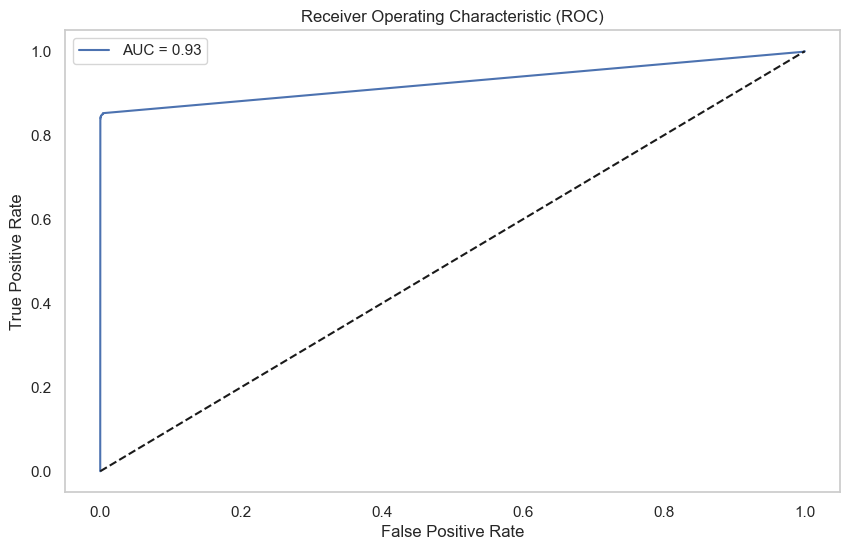

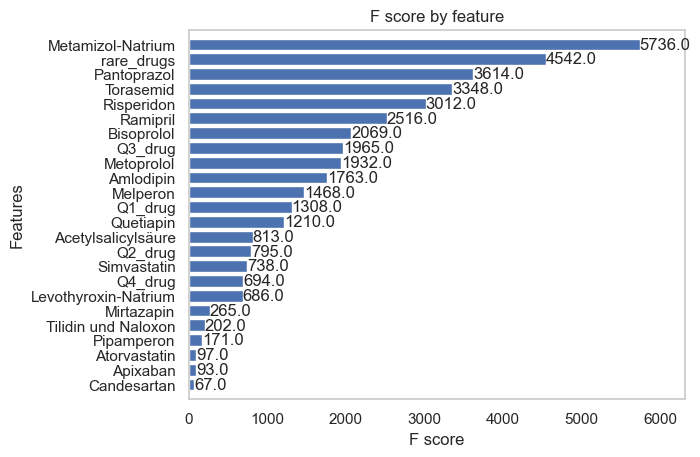

Feature: Metamizol-Natrium, Importance: 5736.0
Feature: rare_drugs, Importance: 4542.0
Feature: Pantoprazol, Importance: 3614.0
Feature: Torasemid, Importance: 3348.0
Feature: Risperidon, Importance: 3012.0
Feature: Ramipril, Importance: 2516.0
Feature: Bisoprolol, Importance: 2069.0
Feature: Q3_drug, Importance: 1965.0
Feature: Metoprolol, Importance: 1932.0
Feature: Amlodipin, Importance: 1763.0
Feature: Melperon, Importance: 1468.0
Feature: Q1_drug, Importance: 1308.0
Feature: Quetiapin, Importance: 1210.0
Feature: Acetylsalicylsäure, Importance: 813.0
Feature: Q2_drug, Importance: 795.0
Feature: Simvastatin, Importance: 738.0
Feature: Q4_drug, Importance: 694.0
Feature: Levothyroxin-Natrium, Importance: 686.0
Feature: Mirtazapin, Importance: 265.0
Feature: Tilidin und Naloxon, Importance: 202.0
Feature: Pipamperon, Importance: 171.0
Feature: Atorvastatin, Importance: 97.0
Feature: Apixaban, Importance: 93.0
Feature: Candesartan, Importance: 67.0


In [57]:

# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = drugs+quarter_drug_his
# Define features and target variable for training
X_train = train_data[feature_columns]
y_train = train_data['ambulance']

# Define features and target variable for validation
X_valid = val_data[feature_columns]
y_valid = val_data['ambulance']

# Create DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# GPU parameters for XGBoost
params = {
    'max_depth': 8,
    'max_leaves': 2**8,
    'tree_method': 'gpu_hist',  # Specify that we want to use GPU
    'objective': 'binary:logistic',  # Adjust as per your requirement
    'eval_metric': 'logloss',
    'subsample': 0.8
}

# Training the Model
model = xgb.train(params, dtrain, num_boost_round=3000)

# Predict on the validation set
y_pred_prob = model.predict(dvalid)

# Calculate AUC
auc_score = roc_auc_score(y_valid.values, y_pred_prob)  # Corrected line
print(f"AUC Score: {auc_score}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid.values, y_pred_prob)  # Corrected line

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


# Inspecting Feature Importance
ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

# Get feature importances
importances = model.get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

## icd+quarter_icd_his

AUC Score: 0.9976338260849851


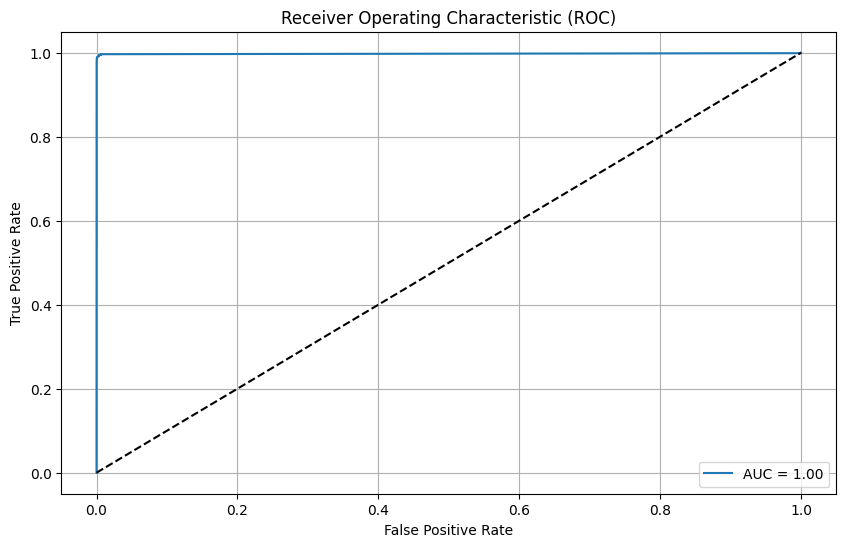

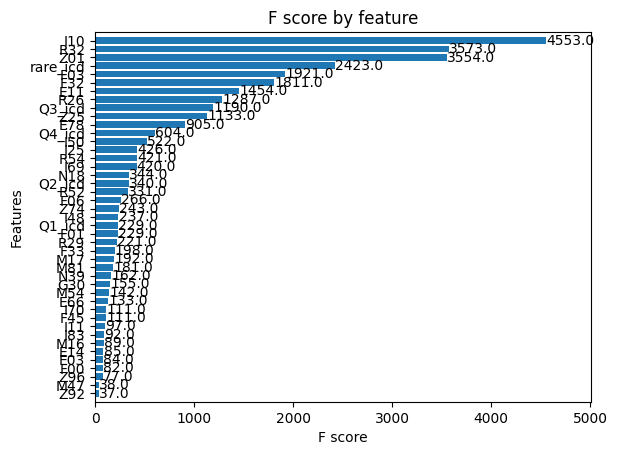

Feature: I10, Importance: 4553.0
Feature: R32, Importance: 3573.0
Feature: Z01, Importance: 3554.0
Feature: rare_icd, Importance: 2423.0
Feature: F03, Importance: 1921.0
Feature: F32, Importance: 1811.0
Feature: E11, Importance: 1454.0
Feature: R26, Importance: 1287.0
Feature: Q3_icd, Importance: 1190.0
Feature: Z25, Importance: 1133.0
Feature: E78, Importance: 905.0
Feature: Q4_icd, Importance: 604.0
Feature: I50, Importance: 522.0
Feature: I25, Importance: 426.0
Feature: R54, Importance: 421.0
Feature: I69, Importance: 420.0
Feature: N18, Importance: 344.0
Feature: Q2_icd, Importance: 340.0
Feature: R52, Importance: 331.0
Feature: F06, Importance: 266.0
Feature: Z74, Importance: 243.0
Feature: I48, Importance: 237.0
Feature: F01, Importance: 229.0
Feature: Q1_icd, Importance: 229.0
Feature: R29, Importance: 221.0
Feature: F33, Importance: 198.0
Feature: M17, Importance: 192.0
Feature: M81, Importance: 181.0
Feature: N39, Importance: 162.0
Feature: G30, Importance: 155.0
Feature: M54,

In [8]:

# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = icd+quarter_icd_his
# Define features and target variable for training
X_train = train_data[feature_columns]
y_train = train_data['ambulance']

# Define features and target variable for validation
X_valid = val_data[feature_columns]
y_valid = val_data['ambulance']

# Create DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# GPU parameters for XGBoost
params = {
    'max_depth': 8,
    'max_leaves': 2**8,
    'tree_method': 'gpu_hist',  # Specify that we want to use GPU
    'objective': 'binary:logistic',  # Adjust as per your requirement
    'eval_metric': 'logloss',
    'subsample': 0.8
}

# Training the Model
model = xgb.train(params, dtrain, num_boost_round=3000)

# Predict on the validation set
y_pred_prob = model.predict(dvalid)

# Calculate AUC
auc_score = roc_auc_score(y_valid.values, y_pred_prob)  # Corrected line
print(f"AUC Score: {auc_score}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid.values, y_pred_prob)  # Corrected line

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


# Inspecting Feature Importance
ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

# Get feature importances
importances = model.get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

## Model Selektion

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = ['nursing_home_group', 'age', 'gender', 'icd_history', 'drug_history', 'care_level', 'Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
                        'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 
                        'Chapter VI', 'Q3_icd', "Amlodipin", "Bisoprolol", "Metamizol-Natrium", "Metoprolol", 
                    "Pantoprazol", "Ramipril", "Risperidon", "Torasemid", "rare_drugs", 'Q3_drug']

# Define features and target variable for training
X_train = train_data[feature_columns].copy()  # Create a copy of the DataFrame
y_train = train_data['ambulance']

# Convert nursing_home_group to a categorical type using .loc
X_train.loc[:, 'nursing_home_group'] = X_train['nursing_home_group'].astype('category')

# Define features and target variable for validation
X_valid = val_data[feature_columns].copy()  # Create a copy of the DataFrame
y_valid = val_data['ambulance']

# Convert nursing_home_group to a categorical type using .loc
X_valid.loc[:, 'nursing_home_group'] = X_valid['nursing_home_group'].astype('category')

# Create DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dvalid = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)
# GPU parameters for XGBoost
params = {
    'max_depth': 8,
    'max_leaves': 2**8,
    'tree_method': 'hist', 
    'device': 'cuda',# Specify that we want to use GPU
    'objective': 'binary:logistic',  # Adjust as per your requirement
    'eval_metric': 'logloss',
    'subsample': 0.8
}

# Training the Model
model = xgb.train(params, dtrain, num_boost_round=3000)

# Predict on the validation set
y_pred_prob = model.predict(dvalid)

# Calculate AUC
auc_score = roc_auc_score(y_valid.values, y_pred_prob)  # Corrected line
print(f"AUC Score: {auc_score}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid.values, y_pred_prob)  # Corrected line

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


# Inspecting Feature Importance
ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

# Get feature importances
importances = model.get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

# If you want to visualize a specific tree, e.g., tree number 0
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # Change num_trees as needed

# Get the current figure to set the size
fig = plt.gcf()
fig.set_size_inches(20, 20)  # Set the figure size (width, height) in inches

plt.title('Visualization of Tree Number 0')  # You can add a title
plt.show()  # Display the plot

## Final Model Test

In [ ]:
# Step 1: Load the test dataset
# Assuming test_data_icd is already loaded similarly to your train and validation datasets.
# If you haven't loaded the test dataset yet, you can do it as follows:
# test_data_icd = pd.read_parquet('/path/to/test_data_icd.parquet')


# Define features and target variable for validation
X_test = test_data[feature_columns].copy()  # Create a copy of the DataFrame
y_test = test_data['ambulance']

# Convert nursing_home_group to a categorical type using .loc
X_test.loc[:, 'nursing_home_group'] = X_test['nursing_home_group'].astype('category')

dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Step 4: Predict on the test set
y_test_pred_prob = model.predict(dtest)

# Step 5: Calculate AUC for the test dataset
test_auc_score = roc_auc_score(y_test.values, y_test_pred_prob)
print(f"Test AUC Score: {test_auc_score}")

# Step 6: Calculate ROC Curve for the test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.values, y_test_pred_prob)

# Plot ROC Curve for the test dataset
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Dataset')
plt.legend()
plt.grid()
plt.show()

# Clean up and free memory if necessary
del X_test, y_test, dtest
gc.collect()

## ***IV. Model Selection and Tool use case***
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

## Fitting logistic regression models

In [14]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1. Loading training datasets

In [16]:
print(train_data0[['id_case','ambulance']].head(20))
print(train_data0['ambulance'].sum(axis=0))
train_data0.describe()

                id_case  ambulance
0  -2738377229582057009          0
1  -5481279406943778433          0
2  -3447648946558974513          0
3  -1499190735126108030          0
4  -8490213443152017852          1
5  -4638226608142235388          0
6  -8726350728183950787          0
7   6143176304806544242          0
8    170610219317903401          0
9  -1360261672274778819          0
10  9126515495644256264          0
11  3869733633074469014          0
12 -5434966142673381624          0
13  7582521509862633668          0
14  9042264807801572832          0
15  6842240874346723215          0
16  2817245391333792751          0
17   914771456447038310          0
18 -2601892791760211198          0
19 -2626413823963366964          1
6285


id_case     Chapter IV     Chapter IX    Chapter XIV  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.200190e+16       0.090477       0.120014       0.054296   
std    5.323278e+18       0.555748       0.642650       0.413934   
min   -9.223345e+18       0.000000       0.000000       0.000000   
25%   -4.605531e+18       0.000000       0.000000       0.000000   
50%    3.282340e+16       0.000000       0.000000       0.000000   
75%    4.603862e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

       Chapter XVIII    Chapter XXI  Rare Diseases   Chapter XIII  \
count  181062.000000  181062.000000  181062.000000  181062.000000   
mean        0.102131       0.078747       0.145834       0.067005   
std         0.581761       0.480821       0.713490       0.469546   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

           Chapter V     Chapter VI  ...     Pipamperon      Quetiapin  \
count  181062.000000  181062.000000  ...  181062.000000  181062.000000   
mean        0.086042       0.013912  ...       0.007627       0.010444   
std         0.536147       0.210541  ...       0.141446       0.178318   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  181062.000000  181062.000000  181062.000000        181062.000000   
mean        0.025892       0.011051       0.014189             0.012802   
std         0.270810       0.175345       0.197556             0.186361   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  181062.000000  181062.000000  181062.000000  181062.000000  
mean        0.046343       0.104290       0.146646       0.107223  
std         0.362497       0.584386       0.716425       0.595205  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 45 columns]

In [17]:
# Convert id_nursing_group from int64 to object
train_data0['nursing_home_group'] = train_data0['nursing_home_group'].astype('object')
val_data['nursing_home_group'] = val_data['nursing_home_group'].astype('object')
test_data['nursing_home_group'] = test_data['nursing_home_group'].astype('object')

train_data0.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181062 entries, 0 to 181061
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               181062 non-null  int64 
 1   Chapter IV            181062 non-null  int64 
 2   Chapter IX            181062 non-null  int64 
 3   Chapter XIV           181062 non-null  int64 
 4   Chapter XVIII         181062 non-null  int64 
 5   Chapter XXI           181062 non-null  int64 
 6   Rare Diseases         181062 non-null  int64 
 7   Chapter XIII          181062 non-null  int64 
 8   Chapter V             181062 non-null  int64 
 9   Chapter VI            181062 non-null  int64 
 10  Q1_icd                181062 non-null  int64 
 11  Q2_icd                181062 non-null  int64 
 12  Q3_icd                181062 non-null  int64 
 13  Q4_icd                181062 non-null  int64 
 14  gender                181062 non-null  int64 
 15  age              

In [18]:
train_data0['Q1_icd']
train_data0.describe()

id_case     Chapter IV     Chapter IX    Chapter XIV  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.200190e+16       0.090477       0.120014       0.054296   
std    5.323278e+18       0.555748       0.642650       0.413934   
min   -9.223345e+18       0.000000       0.000000       0.000000   
25%   -4.605531e+18       0.000000       0.000000       0.000000   
50%    3.282340e+16       0.000000       0.000000       0.000000   
75%    4.603862e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

       Chapter XVIII    Chapter XXI  Rare Diseases   Chapter XIII  \
count  181062.000000  181062.000000  181062.000000  181062.000000   
mean        0.102131       0.078747       0.145834       0.067005   
std         0.581761       0.480821       0.713490       0.469546   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

           Chapter V     Chapter VI  ...     Pipamperon      Quetiapin  \
count  181062.000000  181062.000000  ...  181062.000000  181062.000000   
mean        0.086042       0.013912  ...       0.007627       0.010444   
std         0.536147       0.210541  ...       0.141446       0.178318   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  181062.000000  181062.000000  181062.000000        181062.000000   
mean        0.025892       0.011051       0.014189             0.012802   
std         0.270810       0.175345       0.197556             0.186361   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  181062.000000  181062.000000  181062.000000  181062.000000  
mean        0.046343       0.104290       0.146646       0.107223  
std         0.362497       0.584386       0.716425       0.595205  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 44 columns]

In [15]:
import pandas as pd
# Import the subsets data to a CSV file
train_data0 = pd.read_csv('train_data_drugs_chapter_4grsNH.csv')
val_data = pd.read_csv('validate_data_drugs_chapter_4grsNH.csv')
test_data = pd.read_csv('test_data_drugs_chapter_4grsNH.csv')

train_data0.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181062 entries, 0 to 181061
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id_case               181062 non-null  int64
 1   Chapter IV            181062 non-null  int64
 2   Chapter IX            181062 non-null  int64
 3   Chapter XIV           181062 non-null  int64
 4   Chapter XVIII         181062 non-null  int64
 5   Chapter XXI           181062 non-null  int64
 6   Rare Diseases         181062 non-null  int64
 7   Chapter XIII          181062 non-null  int64
 8   Chapter V             181062 non-null  int64
 9   Chapter VI            181062 non-null  int64
 10  Q1_icd                181062 non-null  int64
 11  Q2_icd                181062 non-null  int64
 12  Q3_icd                181062 non-null  int64
 13  Q4_icd                181062 non-null  int64
 14  gender                181062 non-null  int64
 15  age                   181062 non-n

In [19]:
train_data0['icd_history'] = train_data0[['Q1_icd', 'Q2_icd', 'Q3_icd','Q4_icd']].sum(axis=1)
val_data['icd_history'] = val_data[['Q1_icd', 'Q2_icd','Q3_icd','Q4_icd']].sum(axis=1)
test_data['icd_history'] = test_data[['Q1_icd', 'Q2_icd','Q3_icd','Q4_icd']].sum(axis=1)

train_data0['drug_history'] = train_data0[['Q1_drug', 'Q2_drug', 'Q3_drug','Q4_drug']].sum(axis=1)
val_data['drug_history'] = val_data[['Q1_drug', 'Q2_drug','Q3_drug','Q4_drug']].sum(axis=1)
test_data['drug_history'] = test_data[['Q1_drug', 'Q2_drug','Q3_drug','Q4_drug']].sum(axis=1)
train_data0.describe()

id_case     Chapter IV     Chapter IX    Chapter XIV  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.200190e+16       0.090477       0.120014       0.054296   
std    5.323278e+18       0.555748       0.642650       0.413934   
min   -9.223345e+18       0.000000       0.000000       0.000000   
25%   -4.605531e+18       0.000000       0.000000       0.000000   
50%    3.282340e+16       0.000000       0.000000       0.000000   
75%    4.603862e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

       Chapter XVIII    Chapter XXI  Rare Diseases   Chapter XIII  \
count  181062.000000  181062.000000  181062.000000  181062.000000   
mean        0.102131       0.078747       0.145834       0.067005   
std         0.581761       0.480821       0.713490       0.469546   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

           Chapter V     Chapter VI  ...     Pipamperon      Quetiapin  \
count  181062.000000  181062.000000  ...  181062.000000  181062.000000   
mean        0.086042       0.013912  ...       0.007627       0.010444   
std         0.536147       0.210541  ...       0.141446       0.178318   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  181062.000000  181062.000000  181062.000000        181062.000000   
mean        0.025892       0.011051       0.014189             0.012802   
std         0.270810       0.175345       0.197556             0.186361   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  181062.000000  181062.000000  181062.000000  181062.000000  
mean        0.046343       0.104290       0.146646       0.107223  
std         0.362497       0.584386       0.716425       0.595205  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 44 columns]

In [21]:
print(train_data0['ambulance'].sum(axis=0))
print(val_data['ambulance'].sum(axis=0))
print(test_data['ambulance'].sum(axis=0))

6285
3149
997


In [22]:
# Ensure 'ambulance' is binary
assert set(train_data0['ambulance'].unique()).issubset({0, 1}), "ambulance contains non-binary values."

# Aggregate data by nursing_home_group
NH_groups = train_data0.groupby('nursing_home_group').agg({
    'age': 'mean',              # Mean age in each group
    'gender': 'mean',           # Mean gender (assuming 0/1 encoding)
    'icd_history': 'mean',      # Mean ICD history value
    'id_case': 'count',         # Count of cases per nursing home group
    'ambulance': 'sum'          # Sum of ambulance (number of cases with ambulance = 1)
}).reset_index()

# Rename columns for clarity
NH_groups.rename(columns={'id_case': 'case_count', 'ambulance': 'ambulance_sum'}, inplace=True)

print(NH_groups)


   nursing_home_group        age    gender  icd_history  case_count  \
0                   0  80.636492  0.615276     3.182461         707   
1                   1  84.043658  0.713584     0.134252      142747   
2                   2  85.507902  0.713228     0.123202       30941   
3                   3  74.471276  0.663567     0.198890        6667   

   ambulance_sum  
0            579  
1           4491  
2            994  
3            221  


In [23]:
# show data by clustered groups
NH_groups = train_data0.groupby('nursing_home_group').agg({
    'age': 'mean',
    'gender': 'mean',
    'icd_history': 'mean',
    'id_case': 'count',  # Count how many nursing homes are in each cluster
    'icd_history': 'mean',
    'ambulance': 'mean'
}).reset_index()

print(NH_groups)

   nursing_home_group        age    gender  icd_history  id_case  ambulance
0                   0  80.636492  0.615276     3.182461      707   0.818953
1                   1  84.043658  0.713584     0.134252   142747   0.031461
2                   2  85.507902  0.713228     0.123202    30941   0.032126
3                   3  74.471276  0.663567     0.198890     6667   0.033148


In [24]:
# show data by clustered groups
NH_groups2 = val_data.groupby('nursing_home_group').agg({
    'age': 'mean',
    'gender': 'mean',
    'icd_history': 'mean',
    'id_case': 'count',  # Count how many nursing homes are in each cluster
    'icd_history': 'mean',
    'ambulance' : 'sum'    
}).reset_index()

print(NH_groups2)

   nursing_home_group        age    gender  icd_history  id_case  ambulance
0                   0  81.331658  0.625628     3.057789      398        305
1                   1  84.108216  0.712568     0.133736    71043       2220
2                   2  85.619023  0.717646     0.125271    15686        516
3                   3  74.435607  0.658305     0.198226     3269        108


In [25]:
# show data by clustered groups
NH_groups3 = test_data.groupby('nursing_home_group').agg({
    'age': 'mean',
    'gender': 'mean',
    'icd_history': 'mean',
    'id_case': 'count',  # Count how many nursing homes are in each cluster
    'icd_history': 'mean',
    'ambulance' : 'mean'
}).reset_index()

print(NH_groups3)

   nursing_home_group        age    gender  icd_history  id_case  ambulance
0                   0  80.818182  0.654545     3.163636      110   0.827273
1                   1  84.140881  0.709476     0.126960    23850   0.029769
2                   2  85.573544  0.716288     0.120237     5065   0.032379
3                   3  73.936731  0.638840     0.197715     1138   0.028120


In [26]:
# Create a mapping dictionary
group_mapping = {
    0: "Long_ICD",
    1: "Most_cases",
    2: "Elder_female",
    3: "Young_male"
}
train_data_full = train_data0
# Replace the values in the 'nursing_home_group' column
#train_data_full['nursing_home_group'] = train_data_full['nursing_home_group'].astype(int).replace(group_mapping)
train_data_full['nursing_home_group'] = train_data_full['nursing_home_group'].astype(int).replace(group_mapping)
test_data['nursing_home_group'] = test_data['nursing_home_group'].astype(int).replace(group_mapping)
val_data['nursing_home_group'] = val_data['nursing_home_group'].astype(int).replace(group_mapping)

# Verify the changes
print(train_data_full['nursing_home_group'].value_counts())
print(val_data['nursing_home_group'].value_counts())
print(test_data['nursing_home_group'].value_counts())


Most_cases      142747
Elder_female     30941
Young_male        6667
Long_ICD           707
Name: nursing_home_group, dtype: int64
Most_cases      71043
Elder_female    15686
Young_male       3269
Long_ICD          398
Name: nursing_home_group, dtype: int64
Most_cases      23850
Elder_female     5065
Young_male       1138
Long_ICD          110
Name: nursing_home_group, dtype: int64


In [27]:
train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181062 entries, 0 to 181061
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               181062 non-null  int64 
 1   Chapter IV            181062 non-null  int64 
 2   Chapter IX            181062 non-null  int64 
 3   Chapter XIV           181062 non-null  int64 
 4   Chapter XVIII         181062 non-null  int64 
 5   Chapter XXI           181062 non-null  int64 
 6   Rare Diseases         181062 non-null  int64 
 7   Chapter XIII          181062 non-null  int64 
 8   Chapter V             181062 non-null  int64 
 9   Chapter VI            181062 non-null  int64 
 10  Q1_icd                181062 non-null  int64 
 11  Q2_icd                181062 non-null  int64 
 12  Q3_icd                181062 non-null  int64 
 13  Q4_icd                181062 non-null  int64 
 14  gender                181062 non-null  int64 
 15  age              

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# List of columns to exclude
drugs = ["Acetylsalicylsäure", "Amlodipin", "Apixaban", "Atorvastatin", "Bisoprolol", 
         "Candesartan", "Levothyroxin-Natrium", "Melperon", "Metamizol-Natrium", 
         "Metoprolol", "Mirtazapin", "Pantoprazol", "Pipamperon", "Quetiapin", 
         "Ramipril", "Risperidon", "Simvastatin", "Tilidin und Naloxon", "Torasemid", "rare_drugs"]

chapters_icd = ['Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
                'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI']

long_history = ['icd_history', 'drug_history']

icd_history = ['icd_history']

nursing_home = ['nursing_home_group']

quarter_drug_his = ['Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug']

quarter_icd_his = ['Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd']

id_case = ['id_case']

# Train Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
train_data1 = train_data_full.drop(columns=drugs + long_history + id_case)
train_data2 = train_data_full.drop(columns=chapters_icd + long_history+ id_case)
train_data3 = train_data_full.drop(columns=nursing_home + long_history+ id_case)
train_data4 = train_data_full.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
train_data5 = train_data_full.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his+ nursing_home + id_case) 
train_data6 = train_data_full.drop(columns= quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)

# Validation Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
val_data1 = val_data.drop(columns=drugs + long_history + id_case)
val_data2 = val_data.drop(columns=chapters_icd + long_history + id_case)
val_data3 = val_data.drop(columns=nursing_home + long_history + id_case)
val_data4 = val_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
val_data5 = val_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + nursing_home + id_case)
val_data6 = val_data.drop(columns=quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)

# Validation Datasets: Excluded (1) drugs, (2) chapters_icd, (3) nursing homes, (4) only keeping icd_history and drug_history
test_data1 = test_data.drop(columns=drugs + long_history + id_case)
test_data2 = test_data.drop(columns=chapters_icd + long_history + id_case)
test_data3 = test_data.drop(columns=nursing_home + long_history + id_case)
test_data4 = test_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + id_case)
test_data5 = test_data.drop(columns=drugs + chapters_icd + quarter_drug_his + quarter_icd_his + nursing_home + id_case)
test_data6 = test_data.drop(columns=quarter_icd_his + nursing_home + icd_history + chapters_icd + id_case)

In [29]:
train_data1.info()
train_data2.info()
train_data3.info()
train_data4.info()
train_data5.info()
train_data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181062 entries, 0 to 181061
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Chapter IV          181062 non-null  int64 
 1   Chapter IX          181062 non-null  int64 
 2   Chapter XIV         181062 non-null  int64 
 3   Chapter XVIII       181062 non-null  int64 
 4   Chapter XXI         181062 non-null  int64 
 5   Rare Diseases       181062 non-null  int64 
 6   Chapter XIII        181062 non-null  int64 
 7   Chapter V           181062 non-null  int64 
 8   Chapter VI          181062 non-null  int64 
 9   Q1_icd              181062 non-null  int64 
 10  Q2_icd              181062 non-null  int64 
 11  Q3_icd              181062 non-null  int64 
 12  Q4_icd              181062 non-null  int64 
 13  gender              181062 non-null  int64 
 14  age                 181062 non-null  int64 
 15  care_level          181062 non-null  int64 
 16  am

### ***Fitting 6 Logistic regression models for 6 subsets of indepent variables >> variable important***

#### Importance base on absolute value of coefficients

Training Model 1...
Model 1 AUC: 0.9917

Top Features for Model 1:
                            Feature  Coefficient
12                           Q4_icd     2.430685
23    nursing_home_group_Young_male    -2.037827
5                     Rare Diseases    -1.778194
22    nursing_home_group_Most_cases    -1.744581
20  nursing_home_group_Elder_female    -1.372868
21      nursing_home_group_Long_ICD    -0.525892
1                        Chapter IX     0.300887
11                           Q3_icd     0.287603
10                           Q2_icd     0.269766
15                       care_level    -0.251644


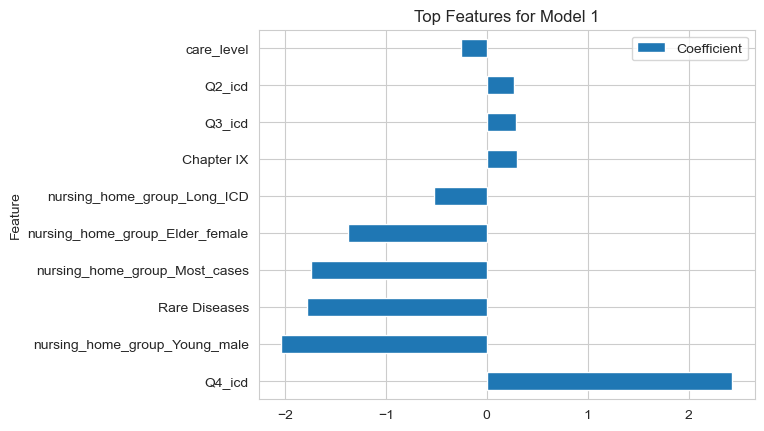

Training Model 2...
Model 2 AUC: 0.9932

Top Features for Model 2:
                            Feature  Coefficient
34    nursing_home_group_Young_male    -2.370754
3                            Q4_icd     2.060321
33    nursing_home_group_Most_cases    -1.522868
31  nursing_home_group_Elder_female    -1.328395
32      nursing_home_group_Long_ICD    -0.604897
10                          Q4_drug    -0.296621
0                            Q1_icd    -0.224651
29                        Torasemid     0.212151
5                               age     0.200173
9                           Q3_drug    -0.189714


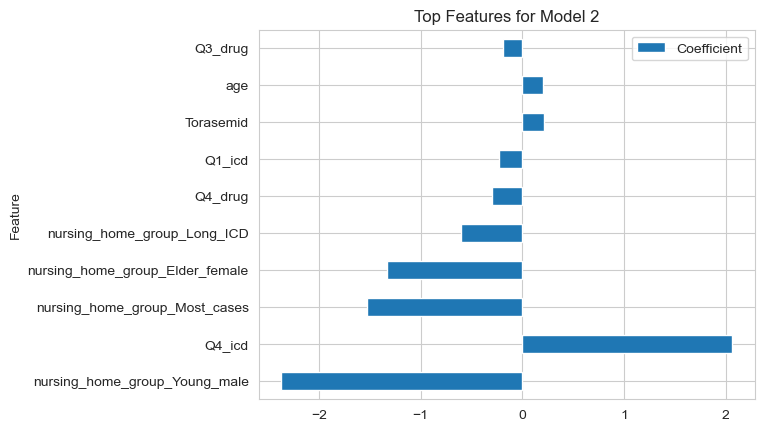

Training Model 3...
Model 3 AUC: 0.9951

Top Features for Model 3:
          Feature  Coefficient
12         Q4_icd     2.272052
5   Rare Diseases    -1.624834
11         Q3_icd     0.286421
10         Q2_icd     0.264145
4     Chapter XXI     0.231049
19        Q4_drug    -0.230507
1      Chapter IX     0.220111
38      Torasemid     0.198623
18        Q3_drug    -0.189258
9          Q1_icd     0.182295


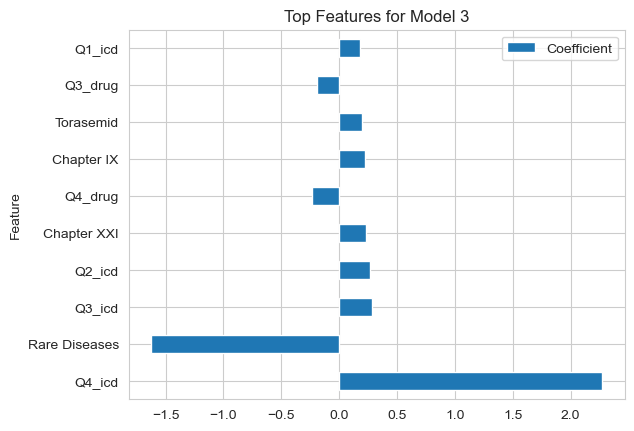

Training Model 4...
Model 4 AUC: 0.9947

Top Features for Model 4:
                           Feature  Coefficient
8    nursing_home_group_Young_male    -2.400092
3                      icd_history     1.582634
7    nursing_home_group_Most_cases    -1.420842
5  nursing_home_group_Elder_female    -0.974979
1                              age     0.469616
6      nursing_home_group_Long_ICD     0.326903
2                       care_level    -0.165048
0                           gender    -0.068668
4                     drug_history     0.035089


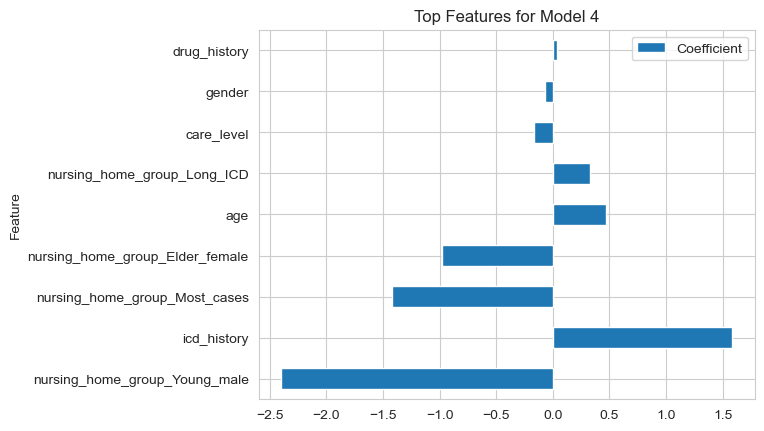

Training Model 5...
Model 5 AUC: 0.9946

Top Features for Model 5:
        Feature  Coefficient
3   icd_history     1.591716
1           age     0.505557
2    care_level    -0.163356
0        gender    -0.072565
4  drug_history     0.026766


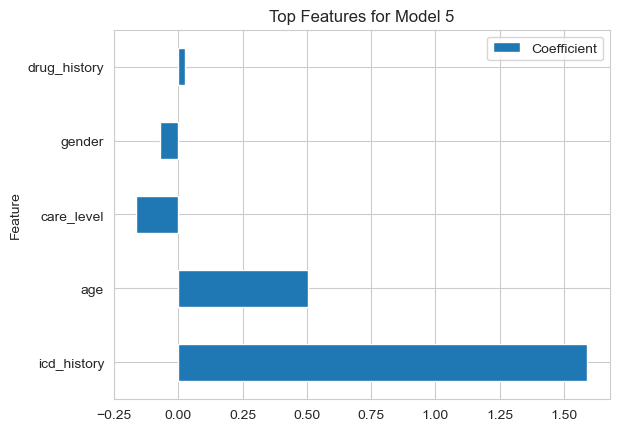

Training Model 6...
Model 6 AUC: 0.9372

Top Features for Model 6:
              Feature  Coefficient
3             Q1_drug     0.605734
25          Torasemid     0.452334
12        Candesartan     0.308733
16         Metoprolol     0.262483
15  Metamizol-Natrium     0.249879
6             Q4_drug    -0.229974
2          care_level    -0.214647
18        Pantoprazol     0.211476
9            Apixaban     0.186371
0              gender    -0.174082


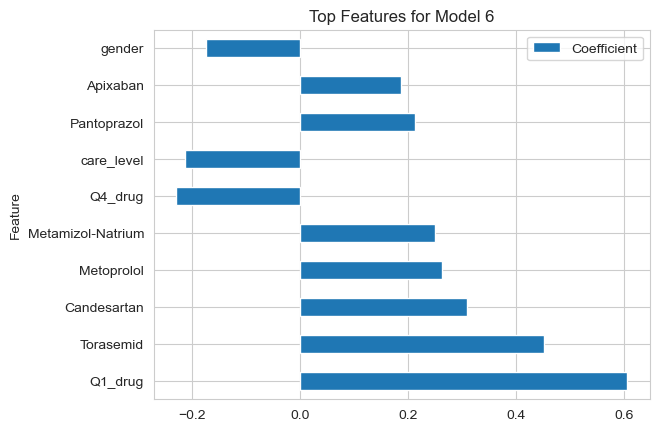

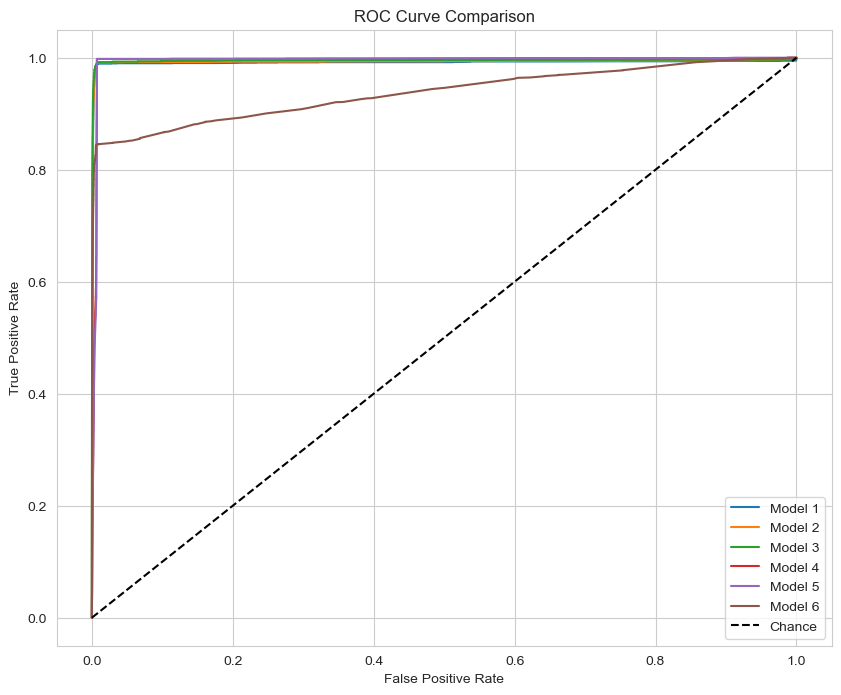


AUC Scores:
     Model       AUC
0  Model 1  0.991650
1  Model 2  0.993216
2  Model 3  0.995146
3  Model 4  0.994702
4  Model 5  0.994552
5  Model 6  0.937186


In [30]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Placeholder: Replace with actual datasets
datasets = [train_data1, train_data2, train_data3, train_data4, train_data5, train_data6]
val_datasets = [val_data1, val_data2, val_data3, val_data4, val_data5, val_data6]

# Base target column
target_col = "ambulance"

# Store results
roc_curves = []
auc_scores = []

for i, (train_data, val_data) in enumerate(zip(datasets, val_datasets), 1):
    print(f"Training Model {i}...")

    # Dynamically determine numeric columns (columns with numeric types)
    numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)  # Remove the target column from numeric features
    
    # Dynamically determine categorical columns (non-numeric columns)
    categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Safely remove 'id_case' if it exists in the columns
    if 'id_case' in categorical_cols:
        categorical_cols.remove('id_case')

    # Define preprocessor based on available columns
    transformers = []
    if numeric_cols:
        transformers.append(("num", StandardScaler(), numeric_cols))
    if categorical_cols:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols))
    
    preprocessor = ColumnTransformer(transformers)
    
    # Prepare data
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(solver="liblinear", random_state=42))
    ])
    
    model.fit(X_train, y_train)
    
    # Validation predictions and AUC
    X_val = val_data.drop(columns=[target_col])
    y_val = val_data[target_col]
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
    print(f"Model {i} AUC: {auc:.4f}")
    
    # Save ROC and AUC
    roc_curves.append((fpr, tpr, f"Model {i}"))
    auc_scores.append((f"Model {i}", auc))
    
    # Variable importance
    all_features = []
    if numeric_cols:
        num_features = preprocessor.named_transformers_["num"].get_feature_names_out(numeric_cols)
        all_features.extend(num_features)
    if categorical_cols:
        cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
        all_features.extend(cat_features)
    
    coefficients = model.named_steps["classifier"].coef_[0]
    importance = pd.DataFrame({
        "Feature": all_features,
        "Coefficient": coefficients
    }).sort_values(by="Coefficient", key=abs, ascending=False)
    
    print(f"\nTop Features for Model {i}:")
    print(importance.head(10))
    
    # Plot top 10 features
    importance.head(10).plot(kind="barh", x="Feature", y="Coefficient", title=f"Top Features for Model {i}")
    plt.show()

# Compare ROC Curves
plt.figure(figsize=(10, 8))
for fpr, tpr, label in roc_curves:
    plt.plot(fpr, tpr, label=label)
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Print AUC scores
auc_df = pd.DataFrame(auc_scores, columns=["Model", "AUC"])
print("\nAUC Scores:")
print(auc_df)


#### Importance base on actual value of coefficients

Training Model 1...
Model 1 AUC: 0.9917

Top Features for Model 1:
         Feature  Coefficient
12        Q4_icd     2.430685
1     Chapter IX     0.300887
11        Q3_icd     0.287603
10        Q2_icd     0.269766
16       Q1_drug     0.248431
4    Chapter XXI     0.241032
0     Chapter IV     0.168219
6   Chapter XIII     0.084057
9         Q1_icd     0.080874
2    Chapter XIV     0.080873


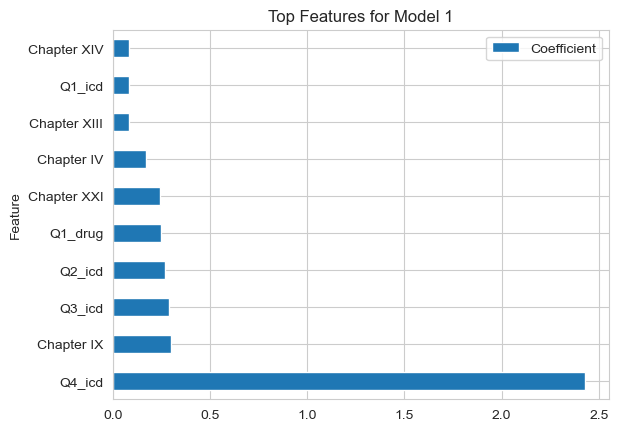

Training Model 2...
Model 2 AUC: 0.9932

Top Features for Model 2:
              Feature  Coefficient
3              Q4_icd     2.060321
29          Torasemid     0.212151
5                 age     0.200173
22        Pantoprazol     0.147421
16        Candesartan     0.131396
20         Metoprolol     0.130423
7             Q1_drug     0.106808
19  Metamizol-Natrium     0.106747
15         Bisoprolol     0.088218
27        Simvastatin     0.087825


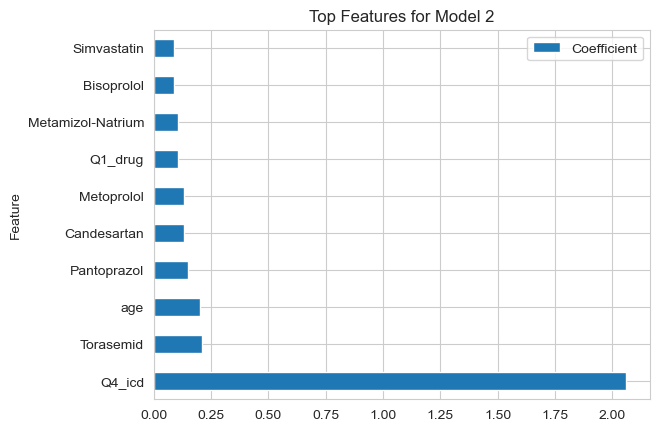

Training Model 3...
Model 3 AUC: 0.9951

Top Features for Model 3:
        Feature  Coefficient
12       Q4_icd     2.272052
11       Q3_icd     0.286421
10       Q2_icd     0.264145
4   Chapter XXI     0.231049
1    Chapter IX     0.220111
38    Torasemid     0.198623
9        Q1_icd     0.182295
31  Pantoprazol     0.144737
0    Chapter IV     0.121723
25  Candesartan     0.109366


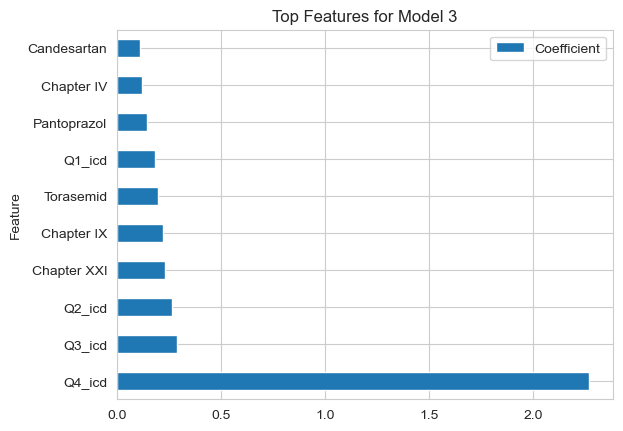

Training Model 4...
Model 4 AUC: 0.9947

Top Features for Model 4:
                           Feature  Coefficient
3                      icd_history     1.582634
1                              age     0.469616
6      nursing_home_group_Long_ICD     0.326903
4                     drug_history     0.035089
0                           gender    -0.068668
2                       care_level    -0.165048
5  nursing_home_group_Elder_female    -0.974979
7    nursing_home_group_Most_cases    -1.420842
8    nursing_home_group_Young_male    -2.400092


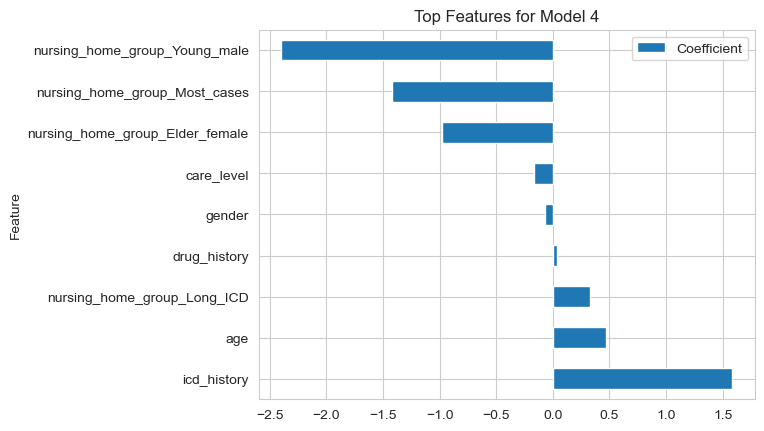

Training Model 5...
Model 5 AUC: 0.9946

Top Features for Model 5:
        Feature  Coefficient
3   icd_history     1.591716
1           age     0.505557
4  drug_history     0.026766
0        gender    -0.072565
2    care_level    -0.163356


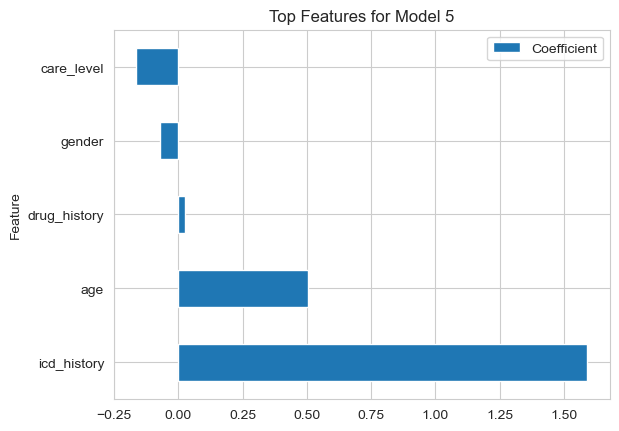

Training Model 6...
Model 6 AUC: 0.9372

Top Features for Model 6:
              Feature  Coefficient
3             Q1_drug     0.605734
25          Torasemid     0.452334
12        Candesartan     0.308733
16         Metoprolol     0.262483
15  Metamizol-Natrium     0.249879
18        Pantoprazol     0.211476
9            Apixaban     0.186371
23        Simvastatin     0.142256
11         Bisoprolol     0.139546
26         rare_drugs     0.135496


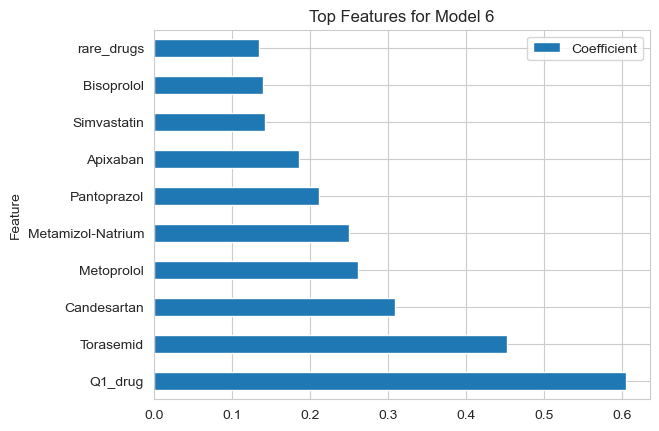

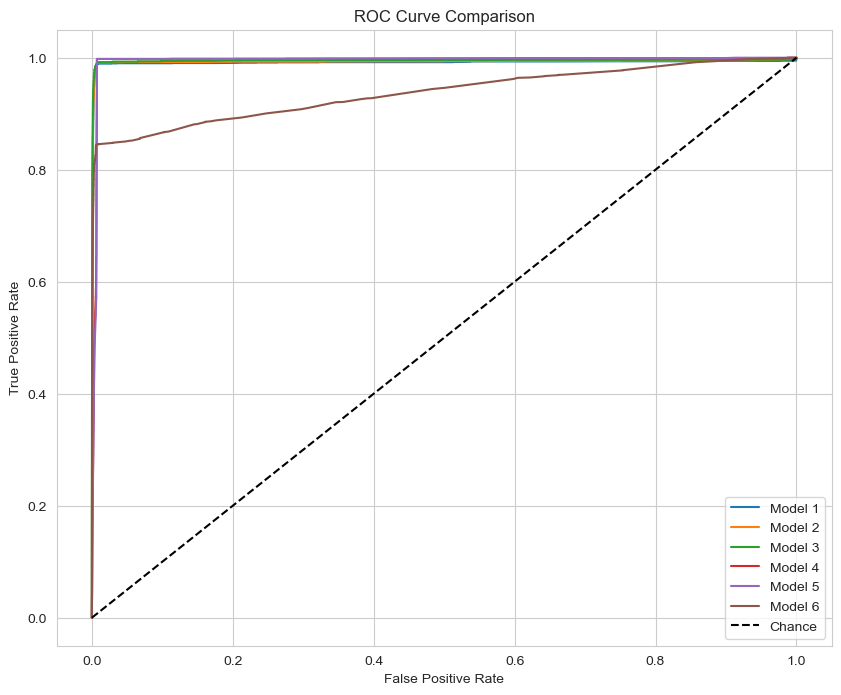


AUC Scores:
     Model       AUC
0  Model 1  0.991650
1  Model 2  0.993216
2  Model 3  0.995146
3  Model 4  0.994702
4  Model 5  0.994552
5  Model 6  0.937186

Performance Metrics Comparison:
Model 1:
  Fraction Correctly Predicted: 0.9953
  McFadden R2: 0.9873
Model 2:
  Fraction Correctly Predicted: 0.9954
  McFadden R2: 0.9877
Model 3:
  Fraction Correctly Predicted: 0.9962
  McFadden R2: 0.9894
Model 4:
  Fraction Correctly Predicted: 0.9884
  McFadden R2: 0.9733
Model 5:
  Fraction Correctly Predicted: 0.9883
  McFadden R2: 0.9729
Model 6:
  Fraction Correctly Predicted: 0.9893
  McFadden R2: 0.9596

Fraction Correctly Predicted at threshold = 0.5 for each model:
Model 1: 0.9953
Model 2: 0.9954
Model 3: 0.9962
Model 4: 0.9884
Model 5: 0.9883
Model 6: 0.9893


In [32]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Placeholder: Replace with actual datasets
datasets = [train_data1, train_data2, train_data3, train_data4, train_data5, train_data6]
val_datasets = [val_data1, val_data2, val_data3, val_data4, val_data5, val_data6]

# Base target column
target_col = "ambulance"

# Function to calculate Fraction Correctly Predicted
def fraction_correctly_predicted(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba > threshold).astype(int)  # Apply threshold to predicted probabilities
    return np.mean(y_true == y_pred)  # Fraction of correct predictions

# Function to calculate Pseudo-R2 (McFadden's R2)
def pseudo_r2(log_likelihood, null_log_likelihood):
    return 1 - (log_likelihood / null_log_likelihood)

# Function to evaluate each model for Fraction Correctly Predicted and McFadden's R2
def evaluate_logistic_model(model, X_val, y_val, threshold=0.5):
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate Fraction Correctly Predicted
    fraction_correct = fraction_correctly_predicted(y_val, y_pred_proba, threshold)
    
    # Calculate Log-Likelihood for the model and the null model (intercept only)
    log_likelihood = -log_loss(y_val, y_pred_proba)  # Negative log loss is equivalent to log-likelihood
    null_log_likelihood = -log_loss(y_val, np.full_like(y_val, y_val.mean()))  # Log loss for a model that predicts the mean value
    
    # Calculate McFadden's R2 (Pseudo-R2)
    mcfadden_r2 = pseudo_r2(log_likelihood, null_log_likelihood)
    
    return fraction_correct, mcfadden_r2

# Store results for AUC, ROC, and evaluation metrics
roc_curves = []
auc_scores = []
performance_metrics = {}
fraction_correct_results = {}

# Loop over the models to train, evaluate, and calculate metrics
for i, (train_data, val_data) in enumerate(zip(datasets, val_datasets), 1):
    print(f"Training Model {i}...")

    # Dynamically determine numeric and categorical columns
    numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)  # Remove the target column from numeric features
    
    categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    if 'id_case' in categorical_cols:
        categorical_cols.remove('id_case')

    # Define preprocessor based on available columns
    transformers = []
    if numeric_cols:
        transformers.append(("num", StandardScaler(), numeric_cols))
    if categorical_cols:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols))
    
    preprocessor = ColumnTransformer(transformers)
    
    # Prepare data
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    
    model = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(solver="liblinear", random_state=42))])
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Validation predictions
    X_val = val_data.drop(columns=[target_col])
    y_val = val_data[target_col]
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # ROC and AUC calculation
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
    print(f"Model {i} AUC: {auc:.4f}")
    
    # Save ROC and AUC
    roc_curves.append((fpr, tpr, f"Model {i}"))
    auc_scores.append((f"Model {i}", auc))
    
    # Variable importance calculation
    all_features = []
    if numeric_cols:
        num_features = preprocessor.named_transformers_["num"].get_feature_names_out(numeric_cols)
        all_features.extend(num_features)
    if categorical_cols:
        cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
        all_features.extend(cat_features)
    
    coefficients = model.named_steps["classifier"].coef_[0]
    importance = pd.DataFrame({
        "Feature": all_features,
        "Coefficient": coefficients
    }).sort_values(by="Coefficient", ascending=False)
    
    print(f"\nTop Features for Model {i}:")
    print(importance.head(10))
    
    # Plot top 10 features
    importance.head(10).plot(kind="barh", x="Feature", y="Coefficient", title=f"Top Features for Model {i}")
    plt.show()

    # Evaluate additional metrics: Fraction Correctly Predicted and McFadden's R2
    fraction_correct, mcfadden_r2 = evaluate_logistic_model(model, X_val, y_val, threshold=0.5)
    performance_metrics[f"Model {i}"] = {
        "Fraction Correctly Predicted": fraction_correct,
        "McFadden R2": mcfadden_r2
    }
    fraction_correct_results[f"Model {i}"] = fraction_correct

# Compare ROC Curves
plt.figure(figsize=(10, 8))
for fpr, tpr, label in roc_curves:
    plt.plot(fpr, tpr, label=label)
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Print AUC scores
auc_df = pd.DataFrame(auc_scores, columns=["Model", "AUC"])
print("\nAUC Scores:")
print(auc_df)

# Print performance metrics for each model
print("\nPerformance Metrics Comparison:")
for model_name, metrics in performance_metrics.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Print fraction of correct predictions at threshold = 0.6
print("\nFraction Correctly Predicted at threshold = 0.5 for each model:")
for model_name, fraction in fraction_correct_results.items():
    print(f"{model_name}: {fraction:.4f}")


### Cross-check nursing home clustering result why the perfomance of models were too high

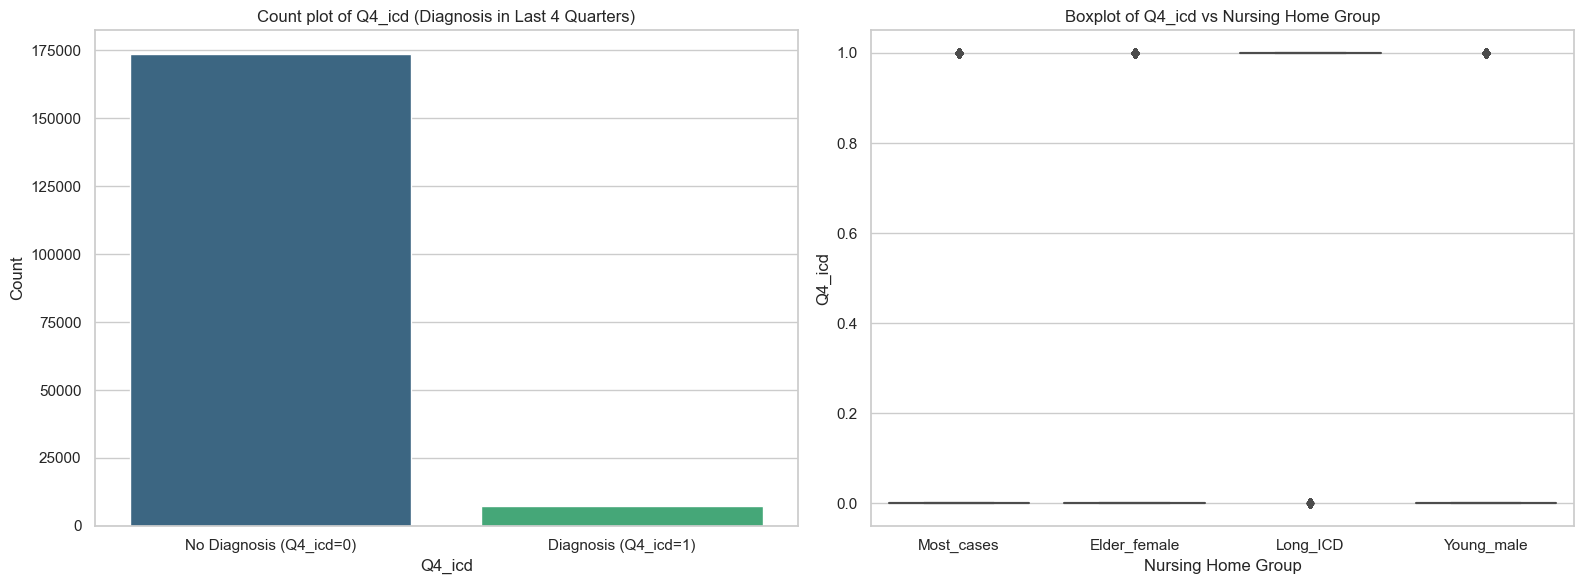


Correlation between Q4_icd and Ambulance:
             Q4_icd  ambulance
Q4_icd     1.000000   0.905959
ambulance  0.905959   1.000000

Average Q4_icd by Nursing Home Group:
nursing_home_group
Elder_female    0.035164
Long_ICD        0.885431
Most_cases      0.037507
Young_male      0.054897
Name: Q4_icd, dtype: float64

Count of cases with Q4_icd = 1 and Q4_icd = 0:
0    173628
1      7434
Name: Q4_icd, dtype: int64


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(16, 6))

# Subplot 1: Count plot for Q4_icd (showing how many have Q4_icd = 1 or 0)
plt.subplot(1, 2, 1)
sns.countplot(data=train_data_full, x="Q4_icd", palette="viridis")
plt.title("Count plot of Q4_icd (Diagnosis in Last 4 Quarters)")
plt.xlabel("Q4_icd")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Diagnosis (Q4_icd=0)', 'Diagnosis (Q4_icd=1)'])

# Subplot 2: Boxplot for Q4_icd vs nursing_home_group (categorical)
plt.subplot(1, 2, 2)
sns.boxplot(data=train_data_full, x="nursing_home_group", y="Q4_icd")
plt.title("Boxplot of Q4_icd vs Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Q4_icd")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Correlation between Q4_icd and Ambulance (binary)
corr_matrix = train_data_full[["Q4_icd", "ambulance"]].corr()
print("\nCorrelation between Q4_icd and Ambulance:")
print(corr_matrix)

# Average Q4_icd by nursing_home_group (since it's categorical, we use groupby)
grouped_corr = train_data_full.groupby('nursing_home_group')['Q4_icd'].mean()
print("\nAverage Q4_icd by Nursing Home Group:")
print(grouped_corr)

# Additional: Count of cases with Q4_icd = 1 vs Q4_icd = 0
count_q4_icd = train_data_full['Q4_icd'].value_counts()
print("\nCount of cases with Q4_icd = 1 and Q4_icd = 0:")
print(count_q4_icd)


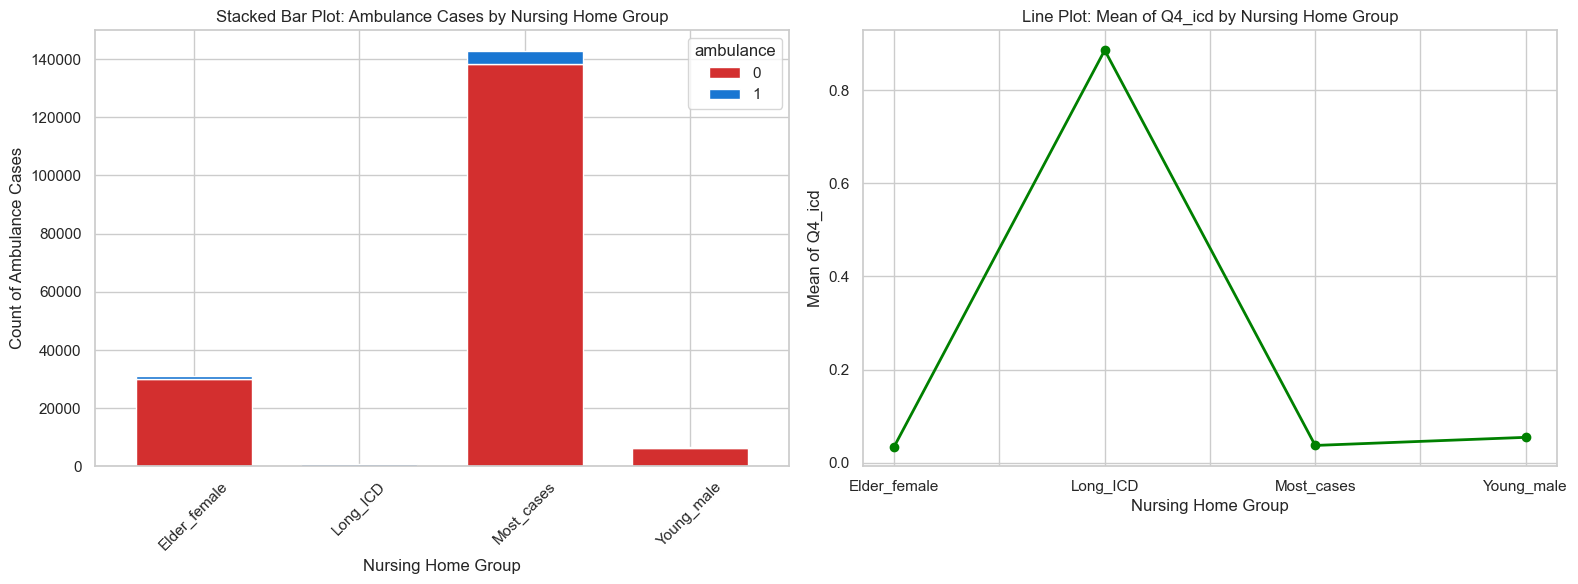

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(16, 6))

# Create a DataFrame for ambulance counts by nursing home group
ambulance_counts = train_data_full.groupby(['nursing_home_group', 'ambulance']).size().unstack(fill_value=0)

# Subplot 1: Stacked bar plot for ambulance counts by nursing home group
plt.subplot(1, 2, 1)
ambulance_counts.plot(kind='bar', stacked=True, color=['#d32f2f', '#1976d2'], ax=plt.gca(), width=0.7)
plt.title("Stacked Bar Plot: Ambulance Cases by Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Count of Ambulance Cases")
plt.xticks(rotation=45)

# Subplot 2: Line plot showing the mean of Q4_icd by nursing home group
plt.subplot(1, 2, 2)
mean_q4_icd = train_data_full.groupby('nursing_home_group')['Q4_icd'].mean()
mean_q4_icd.plot(kind='line', marker='o', color='green', ax=plt.gca(), linewidth=2)
plt.title("Line Plot: Mean of Q4_icd by Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Mean of Q4_icd")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [35]:
print(train_data_full[train_data_full['nursing_home_group'] == 'Long_ICD']['ambulance'].value_counts())
print(train_data_full['ambulance'].dtype)
print(train_data_full[['nursing_home_group', 'ambulance']].isnull().sum())
print(train_data_full['nursing_home_group'].unique())
# Inspect ambulance counts by nursing home group
ambulance_counts = train_data_full.groupby(['nursing_home_group', 'ambulance']).size().unstack(fill_value=0)
print(ambulance_counts)


1    579
0    128
Name: ambulance, dtype: int64
int64
nursing_home_group    0
ambulance             0
dtype: int64
['Most_cases' 'Elder_female' 'Long_ICD' 'Young_male']
ambulance                0     1
nursing_home_group              
Elder_female         29947   994
Long_ICD               128   579
Most_cases          138256  4491
Young_male            6446   221


In [36]:
# Ensure 'ambulance' is binary
assert set(train_data_full['ambulance'].unique()).issubset({0, 1}), "ambulance contains non-binary values."

# Aggregate data by nursing_home_group
NH_groups_full = train_data_full.groupby('nursing_home_group').agg({
    'age': 'mean',              # Mean age in each group
    'gender': 'mean',           # Mean gender (assuming 0/1 encoding)
    'icd_history': 'mean',      # Mean ICD history value
    'id_case': 'count',         # Count of cases per nursing home group
    'ambulance': 'sum'          # Sum of ambulance (number of cases with ambulance = 1)
}).reset_index()

# Rename columns for clarity
NH_groups.rename(columns={'id_case': 'case_count', 'ambulance': 'ambulance_sum'}, inplace=True)

print(NH_groups_full)

  nursing_home_group        age    gender  icd_history  id_case  ambulance
0       Elder_female  85.507902  0.713228     0.123202    30941        994
1           Long_ICD  80.636492  0.615276     3.182461      707        579
2         Most_cases  84.043658  0.713584     0.134252   142747       4491
3         Young_male  74.471276  0.663567     0.198890     6667        221


## LDA

In [342]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Setup path for loading data
current_path = os.getcwd()
os.chdir(current_path)
print("Working directory set to:", current_path)

# Load the dataset
full_cleaned_data = pd.read_csv("full_cleaned_data_4grsNH_for_best_subsets.csv")
full_data_lda = full_cleaned_data.copy()  

# Step 1: Split into train+validation and test sets
train_vali_data_lda, test_data_lda = train_test_split(full_data_lda, test_size=0.1, random_state=42)

# Step 2: Split train+validation into training and validation sets
train_data_lda, vali_data_lda = train_test_split(train_vali_data_lda, test_size=0.333, random_state=42)  # 30% of the total for validation

# Verify sizes
print(f"Training Data: {train_data_lda.shape}")
print(f"Validation Data: {vali_data_lda.shape}")
print(f"Testing Data: {test_data_lda.shape}")

print(train_data_lda.columns)

Working directory set to: D:\ADSL_data\Hackthon_AOK\data_processing\pythonproject
Training Data: (181062, 84)
Validation Data: (90396, 84)
Testing Data: (30163, 84)
Index(['id_case', 'E03', 'E11', 'E14', 'E66', 'E78', 'F00', 'F01', 'F03',
       'F06', 'F32', 'F33', 'F45', 'G30', 'I10', 'I11', 'I25', 'I48', 'I50',
       'I69', 'I70', 'I83', 'M16', 'M17', 'M47', 'M54', 'M81', 'N18', 'N39',
       'R26', 'R29', 'R32', 'R52', 'R54', 'Z01', 'Z25', 'Z74', 'Z92', 'Z96',
       'rare_icd', 'Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII',
       'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V',
       'Chapter VI', 'Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd', 'gender', 'age',
       'care_level', 'ambulance', 'nursing_home_group', 'Q1_drug', 'Q2_drug',
       'Q3_drug', 'Q4_drug', 'Acetylsalicylsäure', 'Amlodipin', 'Apixaban',
       'Atorvastatin', 'Bisoprolol', 'Candesartan', 'Levothyroxin-Natrium',
       'Melperon', 'Metamizol-Natrium', 'Metoprolol', 'Mirtazapin',
       

In [343]:
# Check the data type of each column
print(train_data_lda.dtypes)

id_case                float64
E03                      int64
E11                      int64
E14                      int64
E66                      int64
                        ...   
Tilidin und Naloxon      int64
Torasemid                int64
rare_drugs               int64
icd_history              int64
drug_history             int64
Length: 84, dtype: object


In [344]:
# Convert the columns into proper variable types
train_data_lda['nursing_home_group'] = train_data_lda['nursing_home_group'].astype('object')
vali_data_lda['nursing_home_group'] = vali_data_lda['nursing_home_group'].astype('object')

In [345]:
# Prepare your features (remove 'id_case' and target variable 'ambulance')
feature_columns = ['nursing_home_group', 'age', 'gender', 'icd_history', 'drug_history', 'care_level', 'Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
                        'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 
                        'Chapter VI', 'Q3_icd', "Amlodipin", "Bisoprolol", "Metamizol-Natrium", "Metoprolol", 
                    "Pantoprazol", "Ramipril", "Risperidon", "Torasemid", "rare_drugs", 'Q3_drug']
# Define features and target variable for training
X_train_lda = train_data_lda[feature_columns].copy()  # Create a copy of the DataFrame
y_train_lda = train_data_lda['ambulance']

# Define features and target variable for validation
X_valid_lda = vali_data_lda[feature_columns].copy()  # Create a copy of the DataFrame
y_valid_lda = vali_data_lda['ambulance']

In [346]:
from sklearn.preprocessing import OneHotEncoder

# Select non-numeric columns
non_numeric_columns_train = X_train_lda.select_dtypes(include=['object']).columns
non_numeric_columns_vali = X_valid_lda.select_dtypes(include=['object']).columns
# One-hot encode
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data_train = encoder.fit_transform(X_train_lda[non_numeric_columns_train])
encoded_data_vali = encoder.fit_transform(X_valid_lda[non_numeric_columns_vali])
# Convert encoded data back to DataFrame
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(non_numeric_columns_train))
encoded_df_vali = pd.DataFrame(encoded_data_vali, columns=encoder.get_feature_names_out(non_numeric_columns_vali))
# Drop original non-numeric columns and add encoded columns
X_train_lda = X_train_lda.drop(columns=non_numeric_columns_train).reset_index(drop=True)
X_train_lda = pd.concat([X_train_lda, encoded_df_train], axis=1)

X_valid_lda = X_valid_lda.drop(columns=non_numeric_columns_vali).reset_index(drop=True)
X_valid_lda = pd.concat([X_valid_lda, encoded_df_vali], axis=1)

Training Accuracy: 0.9939799626647225
Validation Accuracy: 0.9905748041948759
Confusion Matrix (Validation):
 [[86976   271]
 [  581  2568]]
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     87247
           1       0.90      0.82      0.86      3149

    accuracy                           0.99     90396
   macro avg       0.95      0.91      0.93     90396
weighted avg       0.99      0.99      0.99     90396

Validation ROC AUC: 0.9972708185613042


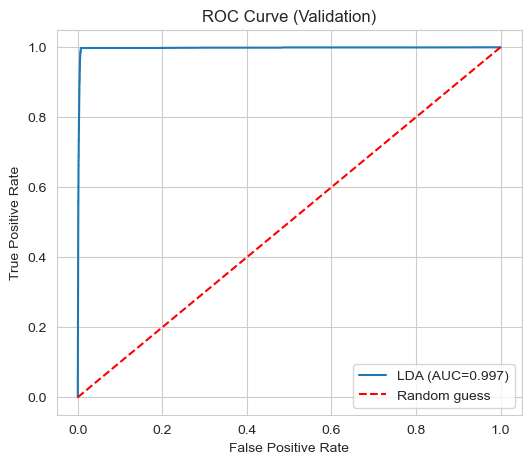

In [350]:
# Initialize LDA model
lda = LinearDiscriminantAnalysis()
# Standardize the features
scaler = StandardScaler()
X_train_lda_scaled = scaler.fit_transform(X_train_lda)
X_vali_lda_scaled = scaler.transform(X_valid_lda)
X_train_lda_scaled
# Put the columns' name back
X_train_lda = pd.DataFrame(X_train_lda_scaled, columns=X_train_lda.columns)
X_vali_lda = pd.DataFrame(X_vali_lda_scaled, columns=X_train_lda.columns)
X_train_lda
# Fit the model on training data
lda.fit(X_train_lda, y_train_lda)
# Predict on training and validation sets
y_train_pred = lda.predict(X_train_lda)
y_train_prob = lda.predict_proba(X_vali_lda)[:, 1]  # Predict the prob of y = 1

y_validate_pred = lda.predict(X_vali_lda)

# Evaluating the performances
print("Training Accuracy:", accuracy_score(y_train_lda, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_valid_lda, y_validate_pred))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_valid_lda, y_validate_pred))
print("Classification Report (Validation):\n", classification_report(y_valid_lda, y_validate_pred))

# Calculate Validation AUC
auc_score = roc_auc_score(y_valid_lda, y_validate_prob)
print("Validation ROC AUC:", auc_score)

# Plot ROC curve for validation set
fpr, tpr, thresholds = roc_curve(y_valid_lda, y_validate_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='LDA (AUC=%.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation)')
plt.legend()
plt.show()

## FINAL LOGISTIC REGRESSION MODEL FOR MOST IMPORTANT VARIABLES

### 1. Loading training datasets

In [138]:
# Setup path for loading data
current_path = os.getcwd()
os.chdir(current_path)
print("Working directory set to:", current_path)

# Load the dataset
full_cleaned_data = pd.read_csv("full_cleaned_data_4grsNH_for_best_subsets.csv")
full_data_vF = full_cleaned_data.copy()  

# Step 1: Split into train+validation and test sets
train_vali_data, test_data = train_test_split(full_data_vF, test_size=0.1, random_state=42)

# Step 2: Split train+validation into training and validation sets
train_data0, vali_data = train_test_split(train_vali_data, test_size=0.333, random_state=42)  # 30% of the total for validation

# Verify sizes
print(f"Training Data: {train_data0.shape}")
print(f"Validation Data: {vali_data.shape}")
print(f"Testing Data: {test_data.shape}")

Working directory set to: C:\Users\ad.huyen\OneDrive\IBE_Hohenheim_Uni\Winter_2425\D_AppliedDSLab\AOK\Summitted
Training Data: (181062, 85)
Validation Data: (90396, 85)
Testing Data: (30163, 85)


In [139]:
train_data0.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181062 entries, 226797 to 199152
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_case               181062 non-null  int64  
 1   E03                   181062 non-null  int64  
 2   E11                   181062 non-null  int64  
 3   E14                   181062 non-null  int64  
 4   E66                   181062 non-null  int64  
 5   E78                   181062 non-null  int64  
 6   F00                   181062 non-null  int64  
 7   F01                   181062 non-null  int64  
 8   F03                   181062 non-null  int64  
 9   F06                   181062 non-null  int64  
 10  F32                   181062 non-null  int64  
 11  F33                   181062 non-null  int64  
 12  F45                   181062 non-null  int64  
 13  G30                   181062 non-null  int64  
 14  I10                   181062 non-null  int64  


In [140]:
print(train_data0[['id_case','ambulance']].head(20))
print(train_data0['ambulance'].sum(axis=0))
train_data0.describe()

                    id_case  ambulance
226797 -2738377229582057009          0
214132 -5481279406943778433          0
200227 -3447648946558974513          0
209295 -1499190735126108030          0
484    -8490213443152017852          1
88218  -4638226608142235388          0
103106 -8726350728183950787          0
207225  6143176304806544242          0
217278   170610219317903401          0
171027 -1360261672274778819          0
229149  9126515495644256264          0
213876  3869733633074469014          0
22487  -5434966142673381624          0
278726  7582521509862633668          0
191832  9042264807801572832          0
85211   6842240874346723215          0
283880  2817245391333792751          0
102873   914771456447038310          0
52709  -2601892791760211198          0
4421   -2626413823963366964          1
6285


id_case            E03            E11            E14  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.200190e+16       0.017121       0.057218       0.026461   
std    5.323278e+18       0.236100       0.441590       0.286715   
min   -9.223345e+18       0.000000       0.000000       0.000000   
25%   -4.605531e+18       0.000000       0.000000       0.000000   
50%    3.282340e+16       0.000000       0.000000       0.000000   
75%    4.603862e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

                 E66            E78            F00            F01  \
count  181062.000000  181062.000000  181062.000000  181062.000000   
mean        0.021738       0.046288       0.013012       0.014426   
std         0.265015       0.391129       0.201772       0.211592   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

                 F03            F06  ...     Pipamperon      Quetiapin  \
count  181062.000000  181062.000000  ...  181062.000000  181062.000000   
mean        0.030730       0.014332  ...       0.007627       0.010444   
std         0.310045       0.213275  ...       0.141446       0.178318   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  181062.000000  181062.000000  181062.000000        181062.000000   
mean        0.025892       0.011051       0.014189             0.012802   
std         0.270810       0.175345       0.197556             0.186361   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  181062.000000  181062.000000  181062.000000  181062.000000  
mean        0.046343       0.104290       0.146646       0.107223  
std         0.362497       0.584386       0.716425       0.595205  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 84 columns]

In [141]:
# Convert id_nursing_group from int64 to object
train_data0['nursing_home_group'] = train_data0['nursing_home_group'].astype('object')
val_data['nursing_home_group'] = val_data['nursing_home_group'].astype('object')
test_data['nursing_home_group'] = test_data['nursing_home_group'].astype('object')

train_data0.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181062 entries, 226797 to 199152
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_case               181062 non-null  int64  
 1   E03                   181062 non-null  int64  
 2   E11                   181062 non-null  int64  
 3   E14                   181062 non-null  int64  
 4   E66                   181062 non-null  int64  
 5   E78                   181062 non-null  int64  
 6   F00                   181062 non-null  int64  
 7   F01                   181062 non-null  int64  
 8   F03                   181062 non-null  int64  
 9   F06                   181062 non-null  int64  
 10  F32                   181062 non-null  int64  
 11  F33                   181062 non-null  int64  
 12  F45                   181062 non-null  int64  
 13  G30                   181062 non-null  int64  
 14  I10                   181062 non-null  int64  


In [142]:
train_data0['icd_history'] = train_data0[['Q1_icd', 'Q2_icd', 'Q3_icd','Q4_icd']].sum(axis=1)
val_data['icd_history'] = val_data[['Q1_icd', 'Q2_icd','Q3_icd','Q4_icd']].sum(axis=1)
test_data['icd_history'] = test_data[['Q1_icd', 'Q2_icd','Q3_icd','Q4_icd']].sum(axis=1)

train_data0['drug_history'] = train_data0[['Q1_drug', 'Q2_drug', 'Q3_drug','Q4_drug']].sum(axis=1)
val_data['drug_history'] = val_data[['Q1_drug', 'Q2_drug','Q3_drug','Q4_drug']].sum(axis=1)
test_data['drug_history'] = test_data[['Q1_drug', 'Q2_drug','Q3_drug','Q4_drug']].sum(axis=1)
train_data0.describe()

id_case            E03            E11            E14  \
count  1.810620e+05  181062.000000  181062.000000  181062.000000   
mean   1.200190e+16       0.017121       0.057218       0.026461   
std    5.323278e+18       0.236100       0.441590       0.286715   
min   -9.223345e+18       0.000000       0.000000       0.000000   
25%   -4.605531e+18       0.000000       0.000000       0.000000   
50%    3.282340e+16       0.000000       0.000000       0.000000   
75%    4.603862e+18       0.000000       0.000000       0.000000   
max    9.223367e+18       4.000000       4.000000       4.000000   

                 E66            E78            F00            F01  \
count  181062.000000  181062.000000  181062.000000  181062.000000   
mean        0.021738       0.046288       0.013012       0.014426   
std         0.265015       0.391129       0.201772       0.211592   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         4.000000       4.000000       4.000000       4.000000   

                 F03            F06  ...     Pipamperon      Quetiapin  \
count  181062.000000  181062.000000  ...  181062.000000  181062.000000   
mean        0.030730       0.014332  ...       0.007627       0.010444   
std         0.310045       0.213275  ...       0.141446       0.178318   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         4.000000       4.000000  ...       4.000000       4.000000   

            Ramipril     Risperidon    Simvastatin  Tilidin und Naloxon  \
count  181062.000000  181062.000000  181062.000000        181062.000000   
mean        0.025892       0.011051       0.014189             0.012802   
std         0.270810       0.175345       0.197556             0.186361   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         4.000000       4.000000       4.000000             4.000000   

           Torasemid     rare_drugs    icd_history   drug_history  
count  181062.000000  181062.000000  181062.000000  181062.000000  
mean        0.046343       0.104290       0.146646       0.107223  
std         0.362497       0.584386       0.716425       0.595205  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         4.000000       4.000000       4.000000       4.000000  

[8 rows x 84 columns]

In [143]:
numeric_cols = train_data0.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

['id_case', 'E03', 'E11', 'E14', 'E66', 'E78', 'F00', 'F01', 'F03', 'F06', 'F32', 'F33', 'F45', 'G30', 'I10', 'I11', 'I25', 'I48', 'I50', 'I69', 'I70', 'I83', 'M16', 'M17', 'M47', 'M54', 'M81', 'N18', 'N39', 'R26', 'R29', 'R32', 'R52', 'R54', 'Z01', 'Z25', 'Z74', 'Z92', 'Z96', 'rare_icd', 'Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 'Chapter VI', 'Q1_icd', 'Q2_icd', 'Q3_icd', 'Q4_icd', 'gender', 'age', 'care_level', 'id_nursing_home', 'ambulance', 'Q1_drug', 'Q2_drug', 'Q3_drug', 'Q4_drug', 'Acetylsalicylsäure', 'Amlodipin', 'Apixaban', 'Atorvastatin', 'Bisoprolol', 'Candesartan', 'Levothyroxin-Natrium', 'Melperon', 'Metamizol-Natrium', 'Metoprolol', 'Mirtazapin', 'Pantoprazol', 'Pipamperon', 'Quetiapin', 'Ramipril', 'Risperidon', 'Simvastatin', 'Tilidin und Naloxon', 'Torasemid', 'rare_drugs', 'icd_history', 'drug_history']


In [144]:
print(train_data0['ambulance'].sum(axis=0))
print(val_data['ambulance'].sum(axis=0))
print(test_data['ambulance'].sum(axis=0))

6285
2795
997


In [145]:
# Ensure 'ambulance' is binary
assert set(train_data0['ambulance'].unique()).issubset({0, 1}), "ambulance contains non-binary values."

# Aggregate data by nursing_home_group
NH_groups = train_data0.groupby('nursing_home_group').agg({
    'age': 'mean',              # Mean age in each group
    'gender': 'mean',           # Mean gender (assuming 0/1 encoding)
    'icd_history': 'mean',      # Mean ICD history value
    'id_case': 'count',         # Count of cases per nursing home group
    'ambulance': 'sum'          # Sum of ambulance (number of cases with ambulance = 1)
}).reset_index()

# Rename columns for clarity
NH_groups.rename(columns={'id_case': 'case_count', 'ambulance': 'ambulance_sum'}, inplace=True)

print(NH_groups)


  nursing_home_group        age    gender  icd_history  case_count  \
0       Elder_female  85.507902  0.713228     0.123202       30941   
1      Highest_cases  84.043658  0.713584     0.134252      142747   
2           Long_ICD  80.636492  0.615276     3.182461         707   
3         Young_male  74.471276  0.663567     0.198890        6667   

   ambulance_sum  
0            994  
1           4491  
2            579  
3            221  


In [146]:
# show data by clustered groups
NH_groups2 = val_data.groupby('nursing_home_group').agg({
    'age': 'mean',
    'gender': 'mean',
    'icd_history': 'mean',
    'id_case': 'count',  # Count how many nursing homes are in each cluster
    'icd_history': 'mean',
    'ambulance' : 'sum'    
}).reset_index()

print(NH_groups2)

  nursing_home_group        age    gender  icd_history  id_case  ambulance
0       Elder_female  85.504229  0.717415     0.121593    13833        444
1      Highest_cases  84.073306  0.712899     0.133940    63678       1996
2           Long_ICD  81.740506  0.610759     3.034810      316        248
3         Young_male  74.216827  0.660459     0.213502     3007        107


In [150]:
# show data by clustered groups
NH_groups3 = test_data.groupby('nursing_home_group').agg({
    'age': 'mean',
    'gender': 'mean',
    'icd_history': 'mean',
    'id_case': 'count',  # Count how many nursing homes are in each cluster
    'icd_history': 'mean',
    'ambulance' : 'mean'
}).reset_index()

print(NH_groups3)

  nursing_home_group        age    gender  icd_history  id_case  ambulance
0       Elder_female  85.573544  0.716288     0.120237     5065   0.032379
1      Highest_cases  84.140881  0.709476     0.126960    23850   0.029769
2           Long_ICD  80.818182  0.654545     3.163636      110   0.827273
3         Young_male  73.936731  0.638840     0.197715     1138   0.028120


In [163]:
# List of columns to convert
columns_to_convert = [
    "Chapter IV", "Chapter IX", "Chapter XIV", "Chapter XVIII",
    "Chapter XXI", "Rare Diseases", "Chapter XIII", "Chapter V", "Chapter VI"
]

# Convert each column to Int64, handling potential NaN values
train_data_full[columns_to_convert] = train_data_full[columns_to_convert].astype("Int64")
val_data[columns_to_convert] = val_data[columns_to_convert].astype("Int64")
test_data[columns_to_convert] = test_data[columns_to_convert].astype("Int64")

train_data_full['nursing_home_group'] = train_data_full['nursing_home_group'].astype('object')
val_data['nursing_home_group'] = val_data['nursing_home_group'].astype('object')
test_data['nursing_home_group'] = test_data['nursing_home_group'].astype('object')

train_data_full.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181062 entries, 226797 to 199152
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_case               181062 non-null  int64 
 1   E03                   181062 non-null  int64 
 2   E11                   181062 non-null  int64 
 3   E14                   181062 non-null  int64 
 4   E66                   181062 non-null  int64 
 5   E78                   181062 non-null  int64 
 6   F00                   181062 non-null  int64 
 7   F01                   181062 non-null  int64 
 8   F03                   181062 non-null  int64 
 9   F06                   181062 non-null  int64 
 10  F32                   181062 non-null  int64 
 11  F33                   181062 non-null  int64 
 12  F45                   181062 non-null  int64 
 13  G30                   181062 non-null  int64 
 14  I10                   181062 non-null  int64 
 15  I11         

In [164]:
print(train_data_full.head(10))
train_data_full.describe()
train_data_full.info()

                    id_case  E03  E11  E14  E66  E78  F00  F01  F03  F06  ...  \
226797 -2738377229582057009    0    0    0    0    0    0    0    0    0  ...   
214132 -5481279406943778433    0    0    0    0    0    0    0    0    0  ...   
200227 -3447648946558974513    0    0    0    0    0    0    0    0    0  ...   
209295 -1499190735126108030    0    0    0    0    0    0    0    0    0  ...   
484    -8490213443152017852    0    0    0    0    0    0    0    0    0  ...   
88218  -4638226608142235388    0    0    0    0    0    0    0    0    0  ...   
103106 -8726350728183950787    0    0    0    0    0    0    0    0    0  ...   
207225  6143176304806544242    0    0    0    0    0    0    0    0    0  ...   
217278   170610219317903401    0    0    0    0    0    0    0    0    0  ...   
171027 -1360261672274778819    0    0    0    0    0    0    0    0    0  ...   

        Quetiapin  Ramipril  Risperidon  Simvastatin  Tilidin und Naloxon  \
226797          0         0    

### ***Training the final model: Logistic regression model***

Mean CV AUC: 0.9980
Validation AUC: 0.9978


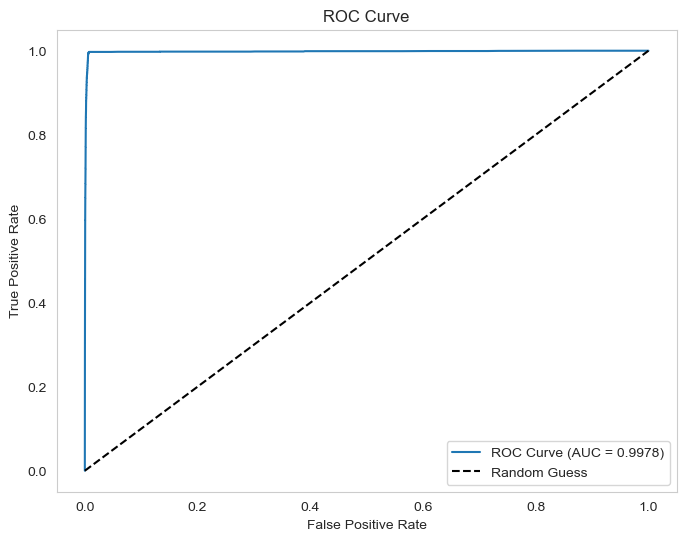

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming train_data_full and val_data are loaded as Pandas DataFrames
# Define variable groups
general_var = ['nursing_home_group', 'age', 'gender', 'icd_history', 'drug_history', 'care_level']
t10_chapters_quarter = ['Chapter IV', 'Chapter IX', 'Chapter XIV', 'Chapter XVIII', 
                        'Chapter XXI', 'Rare Diseases', 'Chapter XIII', 'Chapter V', 
                        'Chapter VI', 'Q3_icd']
t10_drug_quarter = ["Amlodipin", "Bisoprolol", "Metamizol-Natrium", "Metoprolol", 
                    "Pantoprazol", "Ramipril", "Risperidon", "Torasemid", "rare_drugs", 'Q3_drug']
dependent_Y = ['ambulance']

# Combine all predictors
predictor_vars = general_var + t10_chapters_quarter + t10_drug_quarter

# Preprocessing
# Encoding categorical variables
train_data_full['nursing_home_group'] = LabelEncoder().fit_transform(train_data_full['nursing_home_group'])
val_data['nursing_home_group'] = LabelEncoder().fit_transform(val_data['nursing_home_group'])

# Handle missing or invalid values in train_data_full
train_data_full.fillna(0, inplace=True)  # Replace NaN with 0 (or use column means if preferred)
val_data.fillna(0, inplace=True)         # Same for validation data

# Handle infinity or very large values
train_data_full.replace([np.inf, -np.inf], 0, inplace=True)
val_data.replace([np.inf, -np.inf], 0, inplace=True)

# Separate X and Y
X_train = train_data_full[predictor_vars]
y_train = train_data_full[dependent_Y].values.ravel()
X_val = val_data[predictor_vars]
y_val = val_data[dependent_Y].values.ravel()

# Normalize features
scaler = StandardScaler()

# Handle invalid values during scaling
try:
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
except ValueError as e:
    print("Error during scaling:", e)
    # Replace any remaining NaN/infinity in X_train and X_val
    X_train = X_train.fillna(0).replace([np.inf, -np.inf], 0)
    X_val = X_val.fillna(0).replace([np.inf, -np.inf], 0)
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

# Logistic regression with 5-fold CV
model = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
print(f"Mean CV AUC: {np.mean(cv_auc):.4f}")

# Train the model on full training data
model.fit(X_train_scaled, y_train)

# Evaluate on validation data
y_val_pred_prob = model.predict_proba(X_val_scaled)[:, 1]
val_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"Validation AUC: {val_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {val_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


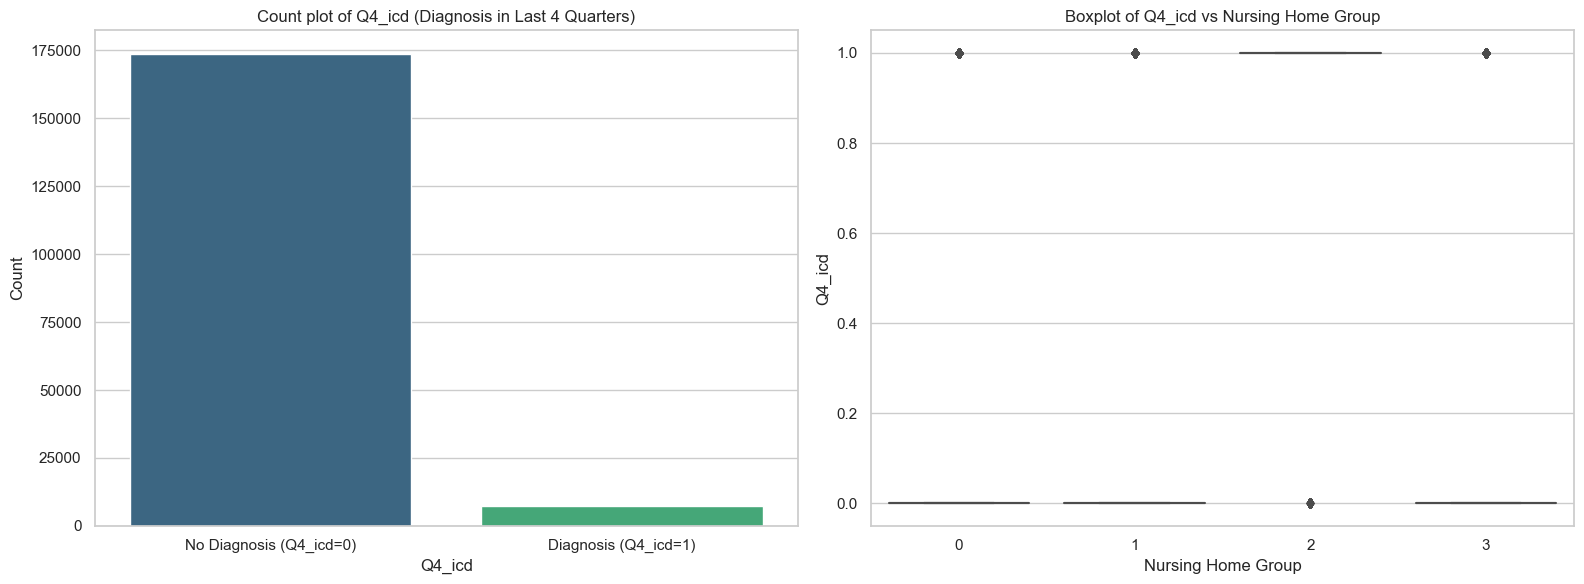


Correlation between Q4_icd and Ambulance:
             Q4_icd  ambulance
Q4_icd     1.000000   0.905959
ambulance  0.905959   1.000000

Average Q4_icd by Nursing Home Group:
nursing_home_group
0    0.035164
1    0.037507
2    0.885431
3    0.054897
Name: Q4_icd, dtype: float64

Count of cases with Q4_icd = 1 and Q4_icd = 0:
0    173628
1      7434
Name: Q4_icd, dtype: int64


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(16, 6))

# Subplot 1: Count plot for Q4_icd (showing how many have Q4_icd = 1 or 0)
plt.subplot(1, 2, 1)
sns.countplot(data=train_data_full, x="Q4_icd", palette="viridis")
plt.title("Count plot of Q4_icd (Diagnosis in Last 4 Quarters)")
plt.xlabel("Q4_icd")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Diagnosis (Q4_icd=0)', 'Diagnosis (Q4_icd=1)'])

# Subplot 2: Boxplot for Q4_icd vs nursing_home_group (categorical)
plt.subplot(1, 2, 2)
sns.boxplot(data=train_data_full, x="nursing_home_group", y="Q4_icd")
plt.title("Boxplot of Q4_icd vs Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Q4_icd")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Correlation between Q4_icd and Ambulance (binary)
corr_matrix = train_data_full[["Q4_icd", "ambulance"]].corr()
print("\nCorrelation between Q4_icd and Ambulance:")
print(corr_matrix)

# Average Q4_icd by nursing_home_group (since it's categorical, we use groupby)
grouped_corr = train_data_full.groupby('nursing_home_group')['Q4_icd'].mean()
print("\nAverage Q4_icd by Nursing Home Group:")
print(grouped_corr)

# Additional: Count of cases with Q4_icd = 1 vs Q4_icd = 0
count_q4_icd = train_data_full['Q4_icd'].value_counts()
print("\nCount of cases with Q4_icd = 1 and Q4_icd = 0:")
print(count_q4_icd)


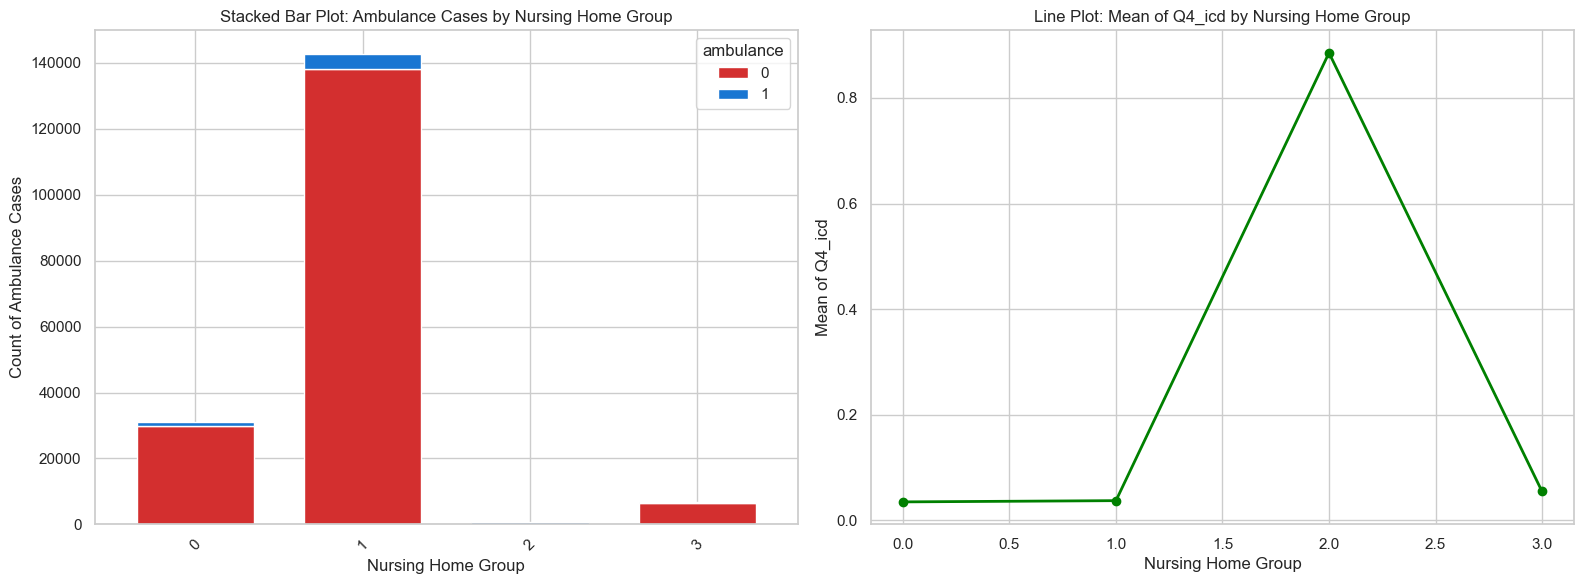

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(16, 6))

# Create a DataFrame for ambulance counts by nursing home group
ambulance_counts = train_data_full.groupby(['nursing_home_group', 'ambulance']).size().unstack(fill_value=0)

# Subplot 1: Stacked bar plot for ambulance counts by nursing home group
plt.subplot(1, 2, 1)
ambulance_counts.plot(kind='bar', stacked=True, color=['#d32f2f', '#1976d2'], ax=plt.gca(), width=0.7)
plt.title("Stacked Bar Plot: Ambulance Cases by Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Count of Ambulance Cases")
plt.xticks(rotation=45)

# Subplot 2: Line plot showing the mean of Q4_icd by nursing home group
plt.subplot(1, 2, 2)
mean_q4_icd = train_data_full.groupby('nursing_home_group')['Q4_icd'].mean()
mean_q4_icd.plot(kind='line', marker='o', color='green', ax=plt.gca(), linewidth=2)
plt.title("Line Plot: Mean of Q4_icd by Nursing Home Group")
plt.xlabel("Nursing Home Group")
plt.ylabel("Mean of Q4_icd")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [62]:
print(train_data_full[train_data_full['nursing_home_group'] == 'Long_ICD']['ambulance'].value_counts())
print(train_data_full['ambulance'].dtype)
print(train_data_full[['nursing_home_group', 'ambulance']].isnull().sum())
print(train_data_full['nursing_home_group'].unique())
# Inspect ambulance counts by nursing home group
ambulance_counts = train_data_full.groupby(['nursing_home_group', 'ambulance']).size().unstack(fill_value=0)
print(ambulance_counts)


1    579
0    128
Name: ambulance, dtype: int64
int64
nursing_home_group    0
ambulance             0
dtype: int64
['Most_cases' 'Elder_female' 'Long_ICD' 'Young_male']
ambulance                0     1
nursing_home_group              
Elder_female         29947   994
Long_ICD               128   579
Most_cases          138256  4491
Young_male            6446   221


In [170]:
# Ensure 'ambulance' is binary
assert set(train_data_full['ambulance'].unique()).issubset({0, 1}), "ambulance contains non-binary values."

# Aggregate data by nursing_home_group
NH_groups_full = train_data_full.groupby('nursing_home_group').agg({
    'age': 'mean',              # Mean age in each group
    'gender': 'mean',           # Mean gender (assuming 0/1 encoding)
    'icd_history': 'mean',      # Mean ICD history value
    'id_case': 'count',         # Count of cases per nursing home group
    'ambulance': 'sum'          # Sum of ambulance (number of cases with ambulance = 1)
}).reset_index()

# Rename columns for clarity
NH_groups.rename(columns={'id_case': 'case_count', 'ambulance': 'ambulance_sum'}, inplace=True)

print(NH_groups_full)

   nursing_home_group        age    gender  icd_history  id_case  ambulance
0                   0  85.507902  0.713228     0.123202    30941        994
1                   1  84.043658  0.713584     0.134252   142747       4491
2                   2  80.636492  0.615276     3.182461      707        579
3                   3  74.471276  0.663567     0.198890     6667        221


#### Take id_nursing_home to test_data for build used cases:

In [152]:
#Take id_nursing_home to test_data for build used cases:

# Setup path for loading data
file_path = 'C:/Users/ad.huyen/OneDrive/IBE_Hohenheim_Uni/Winter_2425/D_AppliedDSLab/AOK/ADSL_AOK/data/summary.parquet'

# Read Parquet file using PyArrow
summary_df = pd.read_parquet(file_path, engine='pyarrow')
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301621 entries, 0 to 3365646
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_case          301621 non-null  int64 
 1   hospital_icd     301621 non-null  object
 2   gender           301621 non-null  object
 3   age              301621 non-null  Int64 
 4   care_level       301621 non-null  Int64 
 5   id_nursing_home  301621 non-null  int64 
dtypes: Int64(2), int64(2), object(2)
memory usage: 16.7+ MB


In [154]:
# Export the variable importance data to a CSV file
test_data.to_csv('test_data.csv', index=False)